In [53]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score,recall_score,precision_score
from pycaret.classification import *
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


import warnings
warnings.filterwarnings('ignore')

In [54]:
#defining function to check the encoding of the file
def encoding(f):
    import chardet
    testStr=b''
    count=0
    with open(f,'rb') as x:
        line=x.readline()
        while line and count < 50:
            testStr=testStr + line
            count=count+1
            line = x.readline()
    return chardet.detect(testStr)

In [55]:
print("Encoding of the 60's file is",encoding('dataset-of-60s.csv')['encoding'])
print("Encoding of the 70's file is",encoding('dataset-of-70s.csv')['encoding'])
print("Encoding of the 80's file is",encoding('dataset-of-80s.csv')['encoding'])
print("Encoding of the 90's file is",encoding('dataset-of-90s.csv')['encoding'])
print("Encoding of the 2000's file is",encoding('dataset-of-00s.csv')['encoding'])
print("Encoding of the 2010's file is",encoding('dataset-of-10s.csv')['encoding'])

Encoding of the 60's file is utf-8
Encoding of the 70's file is utf-8
Encoding of the 80's file is utf-8
Encoding of the 90's file is utf-8
Encoding of the 2000's file is ascii
Encoding of the 2010's file is ascii


In [56]:
#Reading the file
missing_values=[' ','NULL','N/A','n/a','NA','na','NAN']
data_60s=pd.read_csv('dataset-of-60s.csv',encoding='utf-8',na_values=missing_values)
data_70s=pd.read_csv('dataset-of-70s.csv',encoding='utf-8',na_values=missing_values)
data_80s=pd.read_csv('dataset-of-80s.csv',encoding='utf-8',na_values=missing_values)
data_90s=pd.read_csv('dataset-of-90s.csv',encoding='utf-8',na_values=missing_values)
data_00s=pd.read_csv('dataset-of-00s.csv',na_values=missing_values)
data_10s=pd.read_csv('dataset-of-10s.csv',na_values=missing_values)

In [57]:
#shape of the dataset
print("The data from 60s has {} columns and {} rows".format(data_60s.shape[1],data_60s.shape[0]))
print("The data from 70s has {} columns and {} rows".format(data_70s.shape[1],data_70s.shape[0]))
print("The data from 80s has {} columns and {} rows".format(data_80s.shape[1],data_80s.shape[0]))
print("The data from 90s has {} columns and {} rows".format(data_90s.shape[1],data_90s.shape[0]))
print("The data from 2000s has {} columns and {} rows".format(data_00s.shape[1],data_00s.shape[0]))
print("The data from 2010s has {} columns and {} rows".format(data_10s.shape[1],data_10s.shape[0]))

The data from 60s has 19 columns and 8642 rows
The data from 70s has 19 columns and 7766 rows
The data from 80s has 19 columns and 6908 rows
The data from 90s has 19 columns and 5520 rows
The data from 2000s has 19 columns and 5872 rows
The data from 2010s has 19 columns and 6398 rows


In [58]:
data_60s.head()

track            artist  \
0  Jealous Kind Of Fella     Garland Green   
1          Initials B.B.  Serge Gainsbourg   
2           Melody Twist       Lord Melody   
3          Mi Bomba Sonó        Celia Cruz   
4            Uravu Solla       P. Susheela   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0403         0.490          0.000000    0.0779    0.845   
1     1       0.0337         0.018          0.107000    0.1760    0.797   
2     1       0.0380         0.846          0.000004    0.1190    0.908   
3     0       0.1040         0.706          0.024600    0.0610    0.967   
4     0       0.1240         0.857          0.000872    0.2130    0.906   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  185.655       173533               3    32.94975         9       1  
1  101.801       213613               4    48.82510        10       0  
2  115.940       223960               4    37.22663        12       0  
3  105.592       157907               4    24.75484         8       0  
4  114.617       245600               4    21.79874        14       0

In [59]:
#Checking null values in all the files
print(data_60s.isnull().any().sum()) # 60's data null values
print(data_70s.isnull().any().sum()) # 70's data null values
print(data_80s.isnull().any().sum()) # 80's data null values
print(data_90s.isnull().any().sum()) # 90's data null values
print(data_00s.isnull().any().sum()) # 00's data null values
print(data_10s.isnull().any().sum()) # 10's data null values

0
0
0
0
0
0


__There are no null values in any of the file__

In [60]:
#Artist_numbers in 60's
artist_score_60=pd.DataFrame(data_60s.groupby('artist')['artist'].count().sort_values(ascending=False))
artist_score_60.columns=['Count']
artist_score_60.reset_index(inplace=True)


In [61]:
#Artist_numbers in 70's
artist_score_70=pd.DataFrame(data_70s.groupby('artist')['artist'].count().sort_values(ascending=False))
artist_score_70.columns=['Count']
artist_score_70.reset_index(inplace=True)

artist_score_70_ud=pd.merge(artist_score_70, artist_score_60, on='artist', how='outer')
artist_score_70_ud.fillna(0,inplace=True)
artist_score_70_ud['count_ud']=artist_score_70_ud['Count_x']+artist_score_70_ud['Count_y']
artist_score_70_ud.drop(['Count_x','Count_y'],1,inplace=True)


In [62]:
#Artist_numbers in 80's
artist_score_80=pd.DataFrame(data_80s.groupby('artist')['artist'].count().sort_values(ascending=False))
artist_score_80.columns=['Count']
artist_score_80.reset_index(inplace=True)

artist_score_80_ud=pd.merge(artist_score_80, artist_score_70_ud, on='artist', how='outer')
artist_score_80_ud.fillna(0,inplace=True)
artist_score_80_ud['count_ud']=artist_score_80_ud['Count']+artist_score_80_ud['count_ud']
artist_score_80_ud.drop(['Count'],1,inplace=True)

In [63]:
#Artist_numbers in 90's
artist_score_90=pd.DataFrame(data_90s.groupby('artist')['artist'].count().sort_values(ascending=False))
artist_score_90.columns=['Count']
artist_score_90.reset_index(inplace=True)


artist_score_90_ud=pd.merge(artist_score_90, artist_score_80_ud, on='artist', how='outer')
artist_score_90_ud.fillna(0,inplace=True)
artist_score_90_ud['count_ud']=artist_score_90_ud['Count']+artist_score_90_ud['count_ud']
artist_score_90_ud.drop(['Count'],1,inplace=True)

In [64]:
#Artist_numbers in 2000's
artist_score_00=pd.DataFrame(data_00s.groupby('artist')['artist'].count().sort_values(ascending=False))
artist_score_00.columns=['Count']
artist_score_00.reset_index(inplace=True)


artist_score_00_ud=pd.merge(artist_score_00, artist_score_90_ud, on='artist', how='outer')
artist_score_00_ud.fillna(0,inplace=True)
artist_score_00_ud['count_ud']=artist_score_00_ud['Count']+artist_score_00_ud['count_ud']
artist_score_00_ud.drop(['Count'],1,inplace=True)

In [65]:
#Artist_numbers in 2010's
artist_score_10=pd.DataFrame(data_10s.groupby('artist')['artist'].count().sort_values(ascending=False))
artist_score_10.columns=['Count']
artist_score_10.reset_index(inplace=True)


artist_score_10_ud=pd.merge(artist_score_10, artist_score_00_ud, on='artist', how='outer')
artist_score_10_ud.fillna(0,inplace=True)
artist_score_10_ud['count_ud']=artist_score_10_ud['Count']+artist_score_10_ud['count_ud']
artist_score_10_ud.drop(['Count'],1,inplace=True)

In [66]:
#updating artist score in 60's datase with all scores as 0 as we do not have any historical data of the artists 
data_60s['artist_score']=0

In [67]:
#updating artist score in 70's dataset based on the number of hits of the artist in the 60s
data_70s=pd.merge(data_70s,artist_score_60,how='left',on='artist')
data_70s.rename(columns={'Count':'artist_score'},inplace=True)
data_70s.fillna(0,inplace=True)

In [68]:
#updating artist score in 80's dataset based on the number of hits of the artist till 70s
data_80s=pd.merge(data_80s,artist_score_70_ud,how='left',on='artist')
data_80s.rename(columns={'count_ud':'artist_score'},inplace=True)
data_80s.fillna(0,inplace=True)

In [69]:
#updating artist score in 90's dataset based on the number of hits of the artist till 80s
data_90s=pd.merge(data_90s,artist_score_80_ud,how='left',on='artist')
data_90s.rename(columns={'count_ud':'artist_score'},inplace=True)
data_90s.fillna(0,inplace=True)

In [70]:
#updating artist score in 2000's dataset based on the number of hits of the artist till 90s
data_00s=pd.merge(data_00s,artist_score_90_ud,how='left',on='artist')
data_00s.rename(columns={'count_ud':'artist_score'},inplace=True)
data_00s.fillna(0,inplace=True)

In [71]:
#updating artist score in 2010's dataset based on the number of hits of the artist till 00s
data_10s=pd.merge(data_10s,artist_score_00_ud,how='left',on='artist')
data_10s.rename(columns={'count_ud':'artist_score'},inplace=True)
data_10s.fillna(0,inplace=True)

__We are good to delete the below columns in each era of the datasets__
- uri - as its just an unique identifier
- Track - Its again a unique identifier 
- Artist - We have already captured the artist score , so this wont be used 

In [72]:
data_60s.drop(['uri','track','artist'],1,inplace=True)
data_70s.drop(['uri','track','artist'],1,inplace=True)
data_80s.drop(['uri','track','artist'],1,inplace=True)
data_90s.drop(['uri','track','artist'],1,inplace=True)
data_00s.drop(['uri','track','artist'],1,inplace=True)
data_10s.drop(['uri','track','artist'],1,inplace=True)

In [73]:
data_60s['duration_ms']=data_60s['duration_ms'].astype('float64')
data_70s['duration_ms']=data_70s['duration_ms'].astype('float64')
data_80s['duration_ms']=data_80s['duration_ms'].astype('float64')
data_90s['duration_ms']=data_90s['duration_ms'].astype('float64')
data_00s['duration_ms']=data_00s['duration_ms'].astype('float64')
data_10s['duration_ms']=data_10s['duration_ms'].astype('float64')

__We have all the columns as numerical in all our daatsets from different era__

In [74]:
data_00s.to_csv('data_00s_num.csv',index=False)
data_10s.to_csv('data_10s_num.csv',index=False)
data_90s.to_csv('data_90s_num.csv',index=False)
data_80s.to_csv('data_80s_num.csv',index=False)
data_70s.to_csv('data_70s_num.csv',index=False)
data_60s.to_csv('data_60s_num.csv',index=False)

In [75]:
#Lets create a master sheet containing all the data
master_df=data_60s.copy()

In [76]:
master_df['year']= 1960
master_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.417   0.620    3    -7.727     1       0.0403         0.490   
1         0.498   0.505    3   -12.475     1       0.0337         0.018   
2         0.657   0.649    5   -13.392     1       0.0380         0.846   
3         0.590   0.545    7   -12.058     0       0.1040         0.706   
4         0.515   0.765   11    -3.515     0       0.1240         0.857   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000000    0.0779    0.845  185.655     173533.0               3   
1          0.107000    0.1760    0.797  101.801     213613.0               4   
2          0.000004    0.1190    0.908  115.940     223960.0               4   
3          0.024600    0.0610    0.967  105.592     157907.0               4   
4          0.000872    0.2130    0.906  114.617     245600.0               4   

   chorus_hit  sections  target  artist_score  year  
0    32.94975         9       1             0  1960  
1    48.82510        10       0             0  1960  
2    37.22663        12       0             0  1960  
3    24.75484         8       0             0  1960  
4    21.79874        14       0             0  1960

In [77]:
data_60s['year']=1960
data_70s['year']=1970
data_80s['year']=1980
data_90s['year']=1990
data_00s['year']=2000
data_10s['year']=2010

In [78]:
x=[master_df,data_70s,data_80s,data_90s,data_00s,data_10s]
master_df=pd.concat(x)
master_df.reset_index(inplace=True)
master_df.head()

index  danceability  energy  key  loudness  mode  speechiness  \
0      0         0.417   0.620    3    -7.727     1       0.0403   
1      1         0.498   0.505    3   -12.475     1       0.0337   
2      2         0.657   0.649    5   -13.392     1       0.0380   
3      3         0.590   0.545    7   -12.058     0       0.1040   
4      4         0.515   0.765   11    -3.515     0       0.1240   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0         0.490          0.000000    0.0779    0.845  185.655     173533.0   
1         0.018          0.107000    0.1760    0.797  101.801     213613.0   
2         0.846          0.000004    0.1190    0.908  115.940     223960.0   
3         0.706          0.024600    0.0610    0.967  105.592     157907.0   
4         0.857          0.000872    0.2130    0.906  114.617     245600.0   

   time_signature  chorus_hit  sections  target  artist_score  year  
0               3    32.94975         9       1           0.0  1960  
1               4    48.82510        10       0           0.0  1960  
2               4    37.22663        12       0           0.0  1960  
3               4    24.75484         8       0           0.0  1960  
4               4    21.79874        14       0           0.0  1960

In [79]:
#Creating a df where it contains the mean values for a hit songs through the decades
mean_hit_df=master_df.query('target==1').groupby('year')[master_df.columns].mean()

In [80]:
#Creating a df where it contains the mean values for a nonhit songs through the decades
mean_nonhit_df=master_df.query('target==0').groupby('year')[master_df.columns].mean()

In [81]:
mean_df=master_df.groupby('year')[master_df.columns].mean()

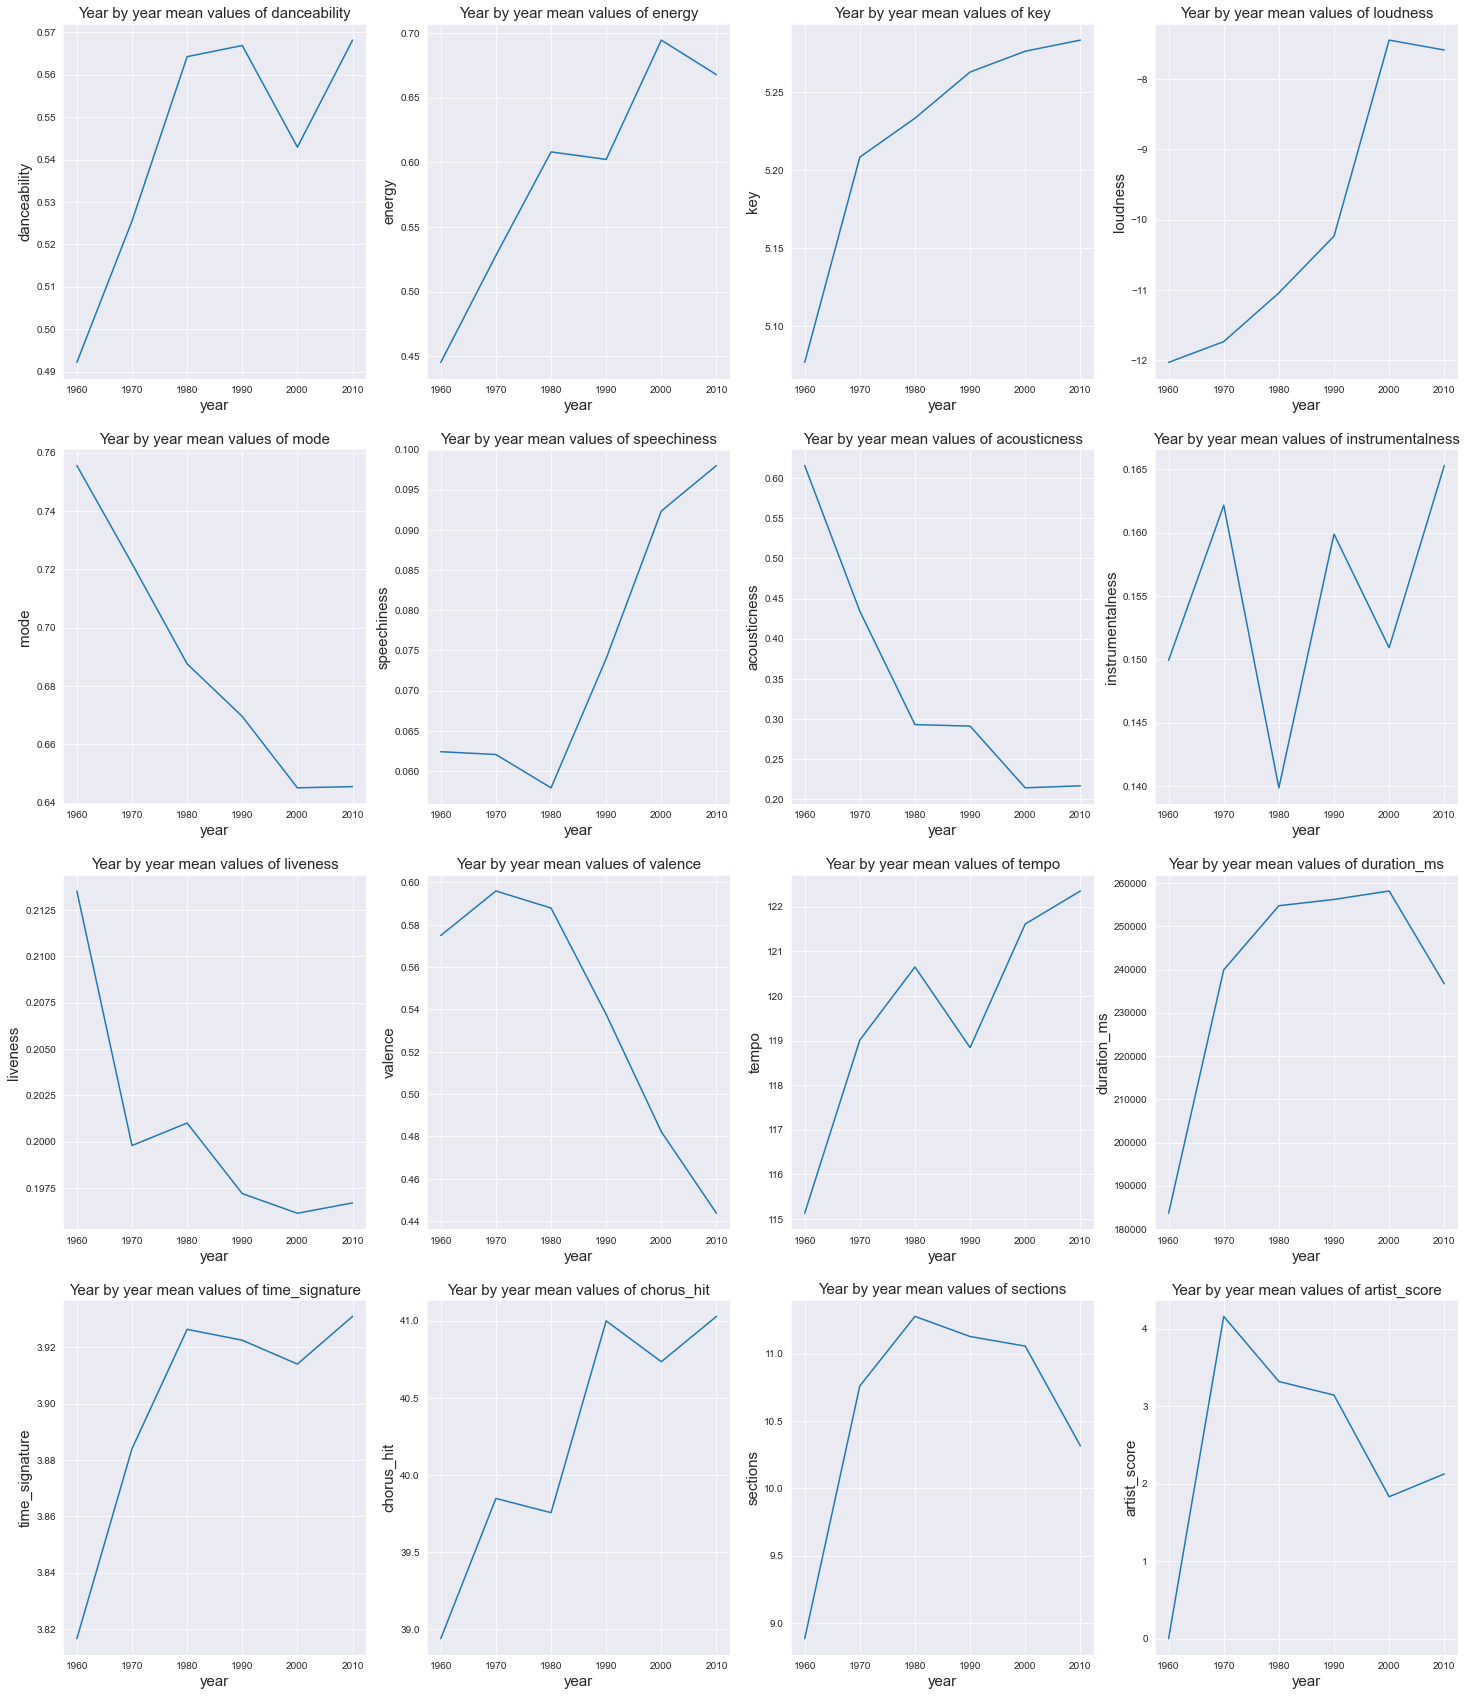

In [82]:
#plotting how the various feature change from 1960s to presenst time


sns.set_style('darkgrid')
f, axes = plt.subplots(4,4, figsize = (25,30))
col=[i for i in mean_hit_df.columns if i not in ['index','target','year']]
k=0
l=0
for i in col:
    ax=axes[k,l]
    mean_df[i].plot(ax=axes[k,l])
    ax.set_xlabel("year", fontsize = 15)
    ax.set_ylabel(i, fontsize = 15)
    ax.set_title("Year by year mean values of "+ i, fontsize = 15)
    l=l+1
    if l==4:
        l=0
        k=k+1
plt.show()

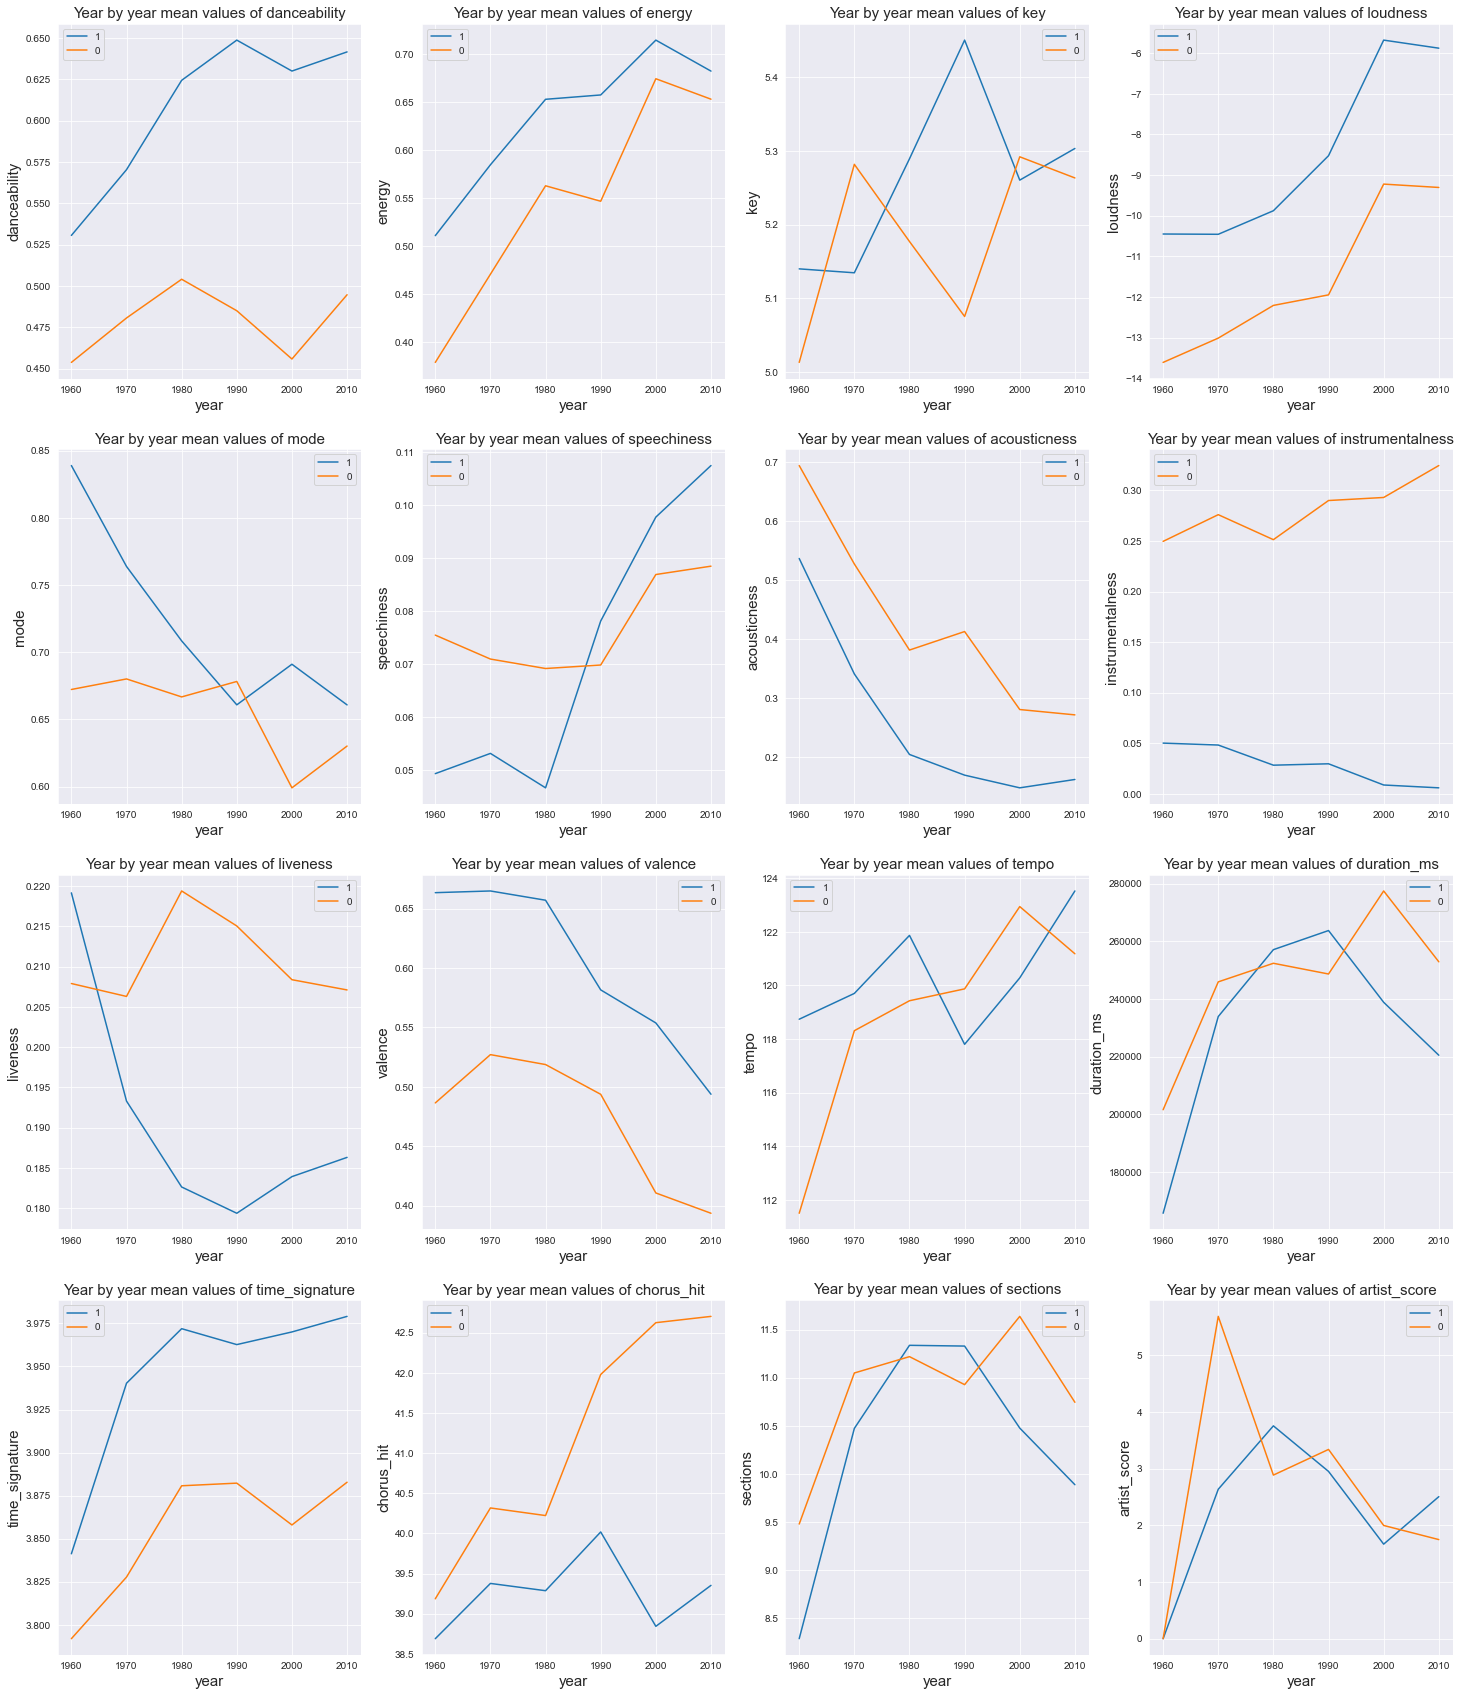

In [83]:
#plotting how the various feature change from 1960s to presenst time as per the target( hit vs non-hit)


sns.set_style('darkgrid')
f, axes = plt.subplots(4,4, figsize = (25,30))
col=[i for i in mean_hit_df.columns if i not in ['index','target','year']]
k=0
l=0
for i in col:
    ax=axes[k,l]
    mean_hit_df[i].plot(ax=axes[k,l])
    mean_nonhit_df[i].plot(ax=axes[k,l])
    ax.set_xlabel("year", fontsize = 15)
    ax.set_ylabel(i, fontsize = 15)
    ax.set_title("Year by year mean values of "+ i, fontsize = 15)
    ax.legend(master_df['target'])
    l=l+1
    if l==4:
        l=0
        k=k+1
plt.show()

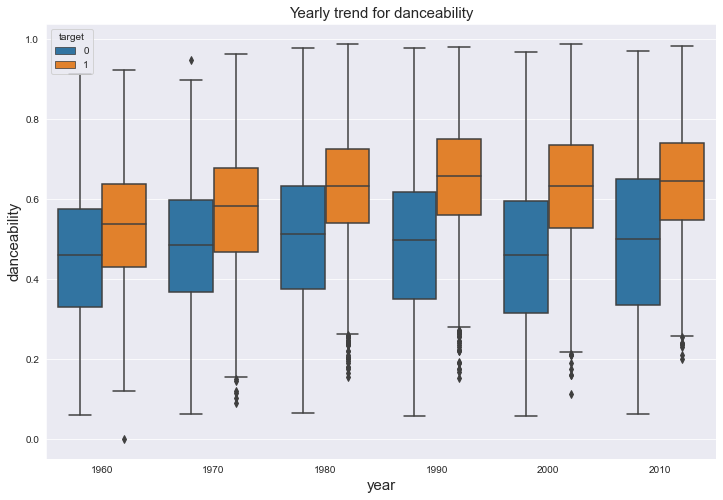

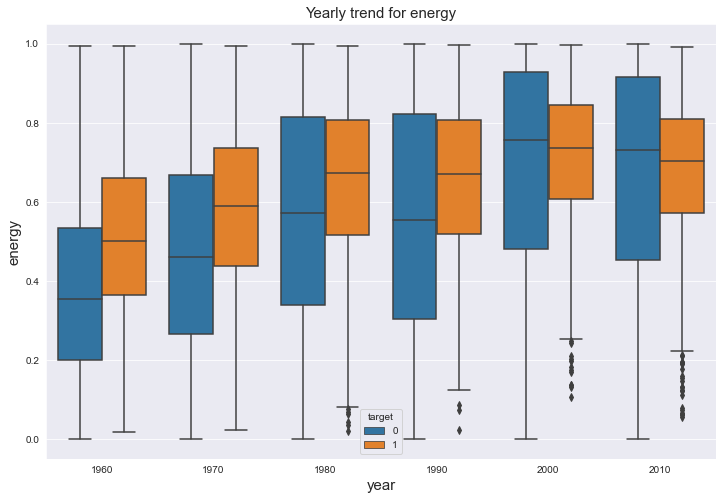

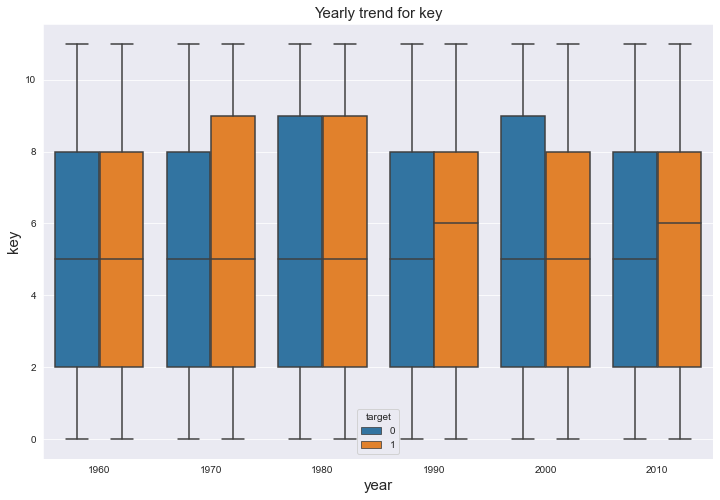

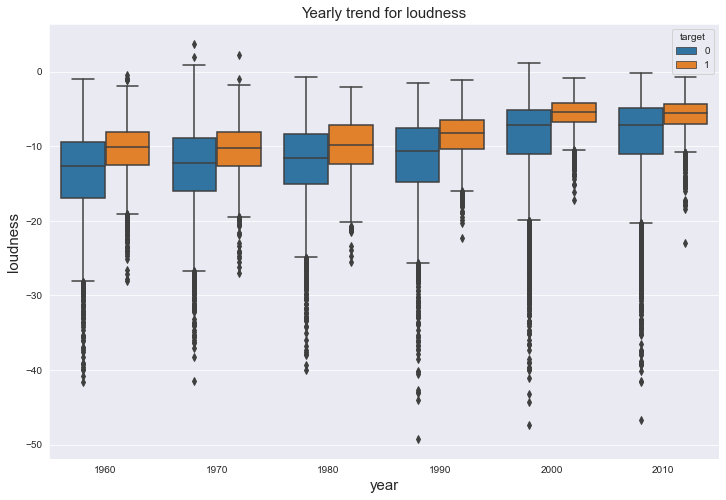

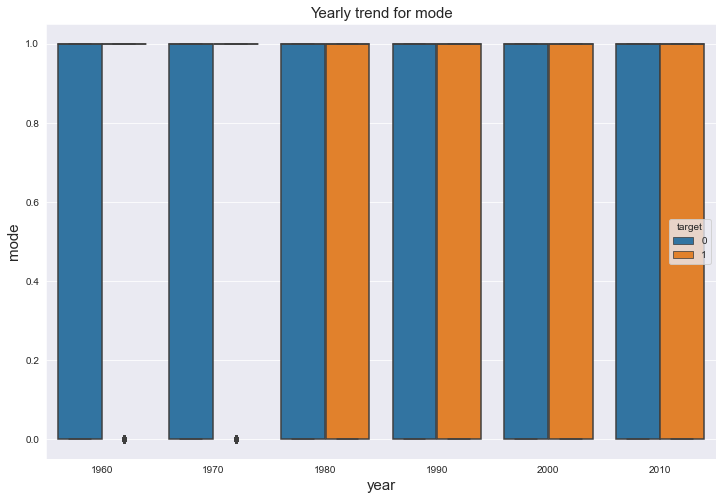

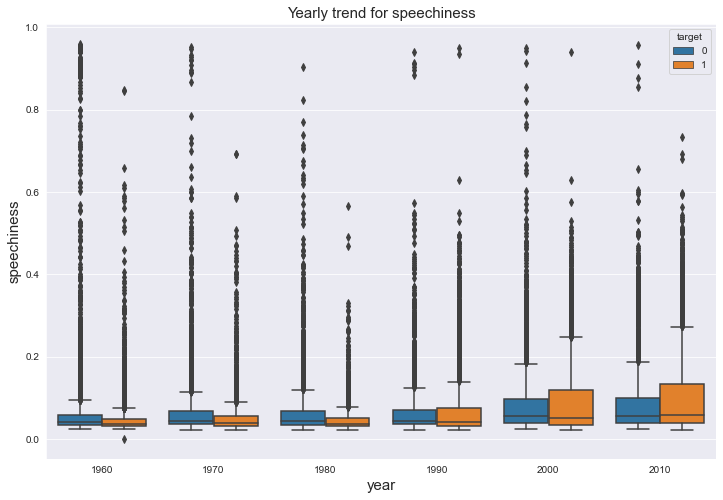

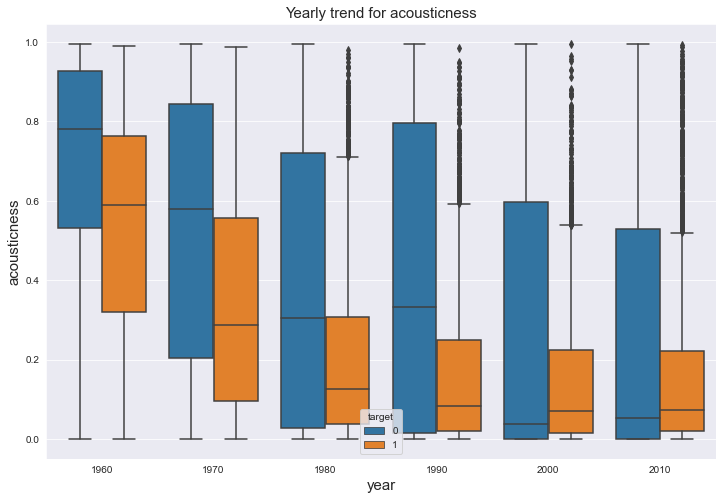

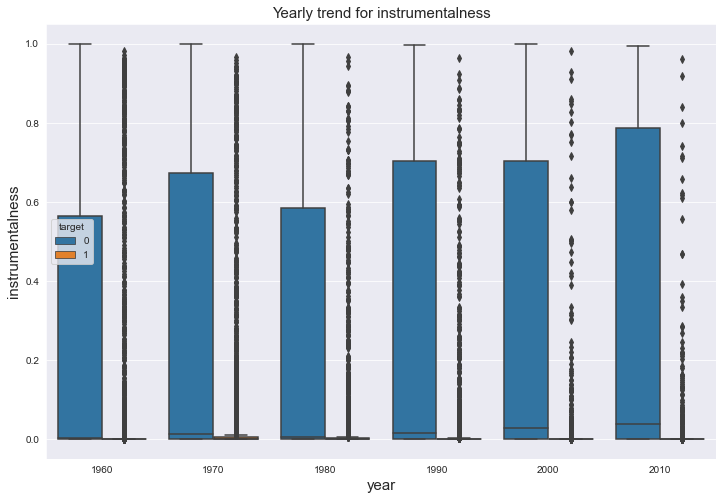

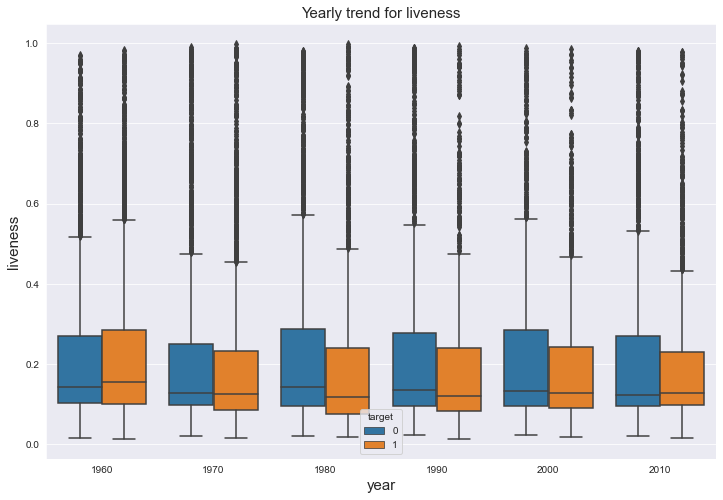

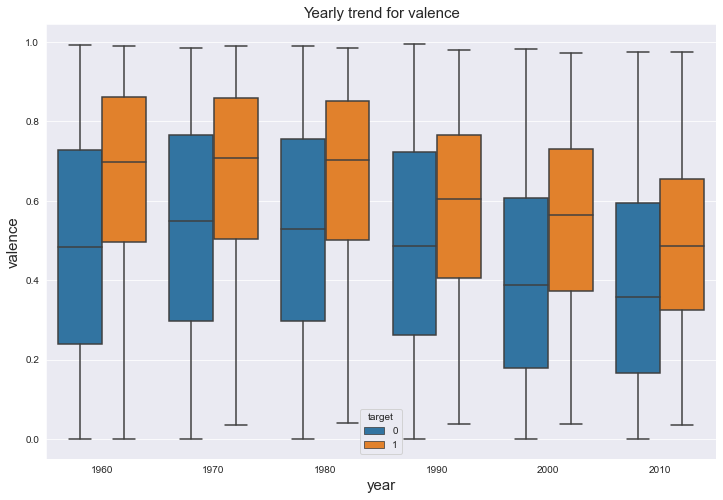

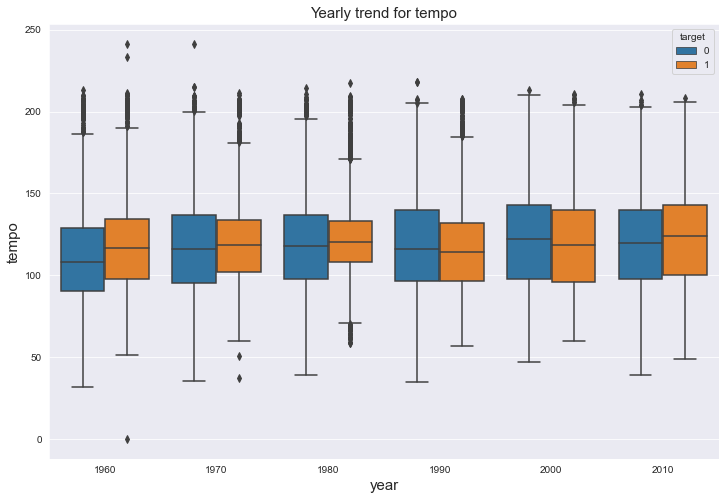

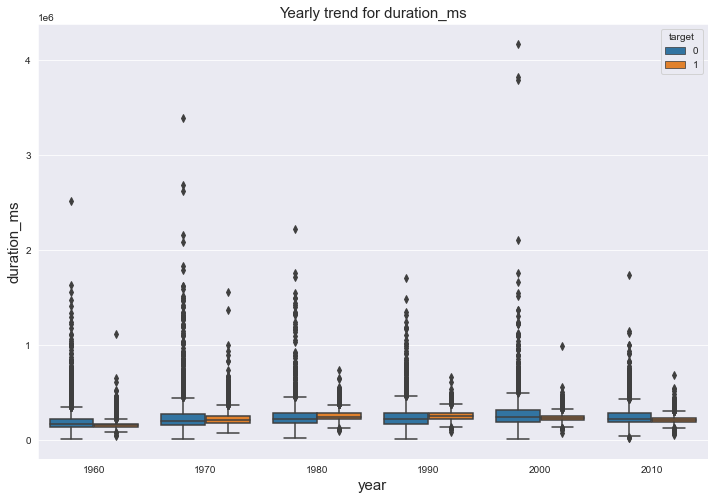

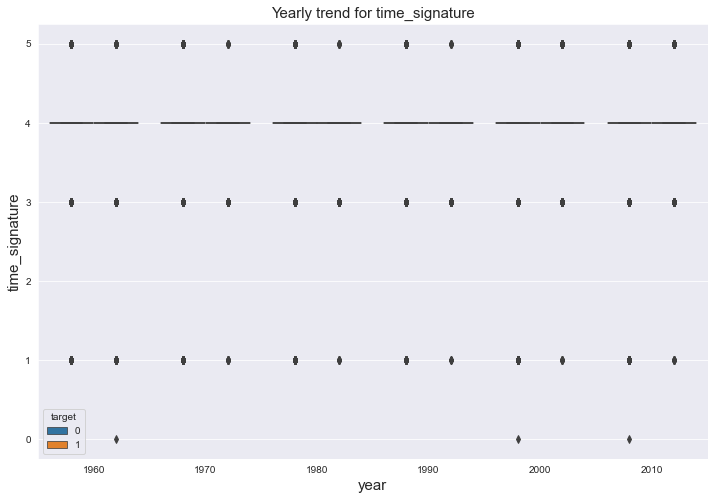

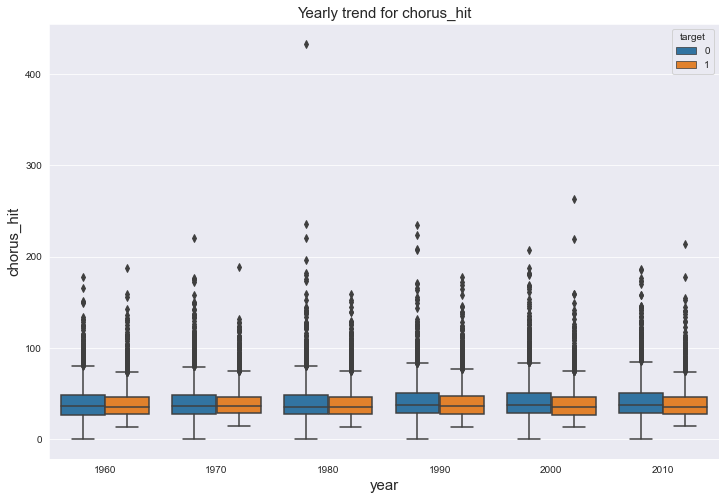

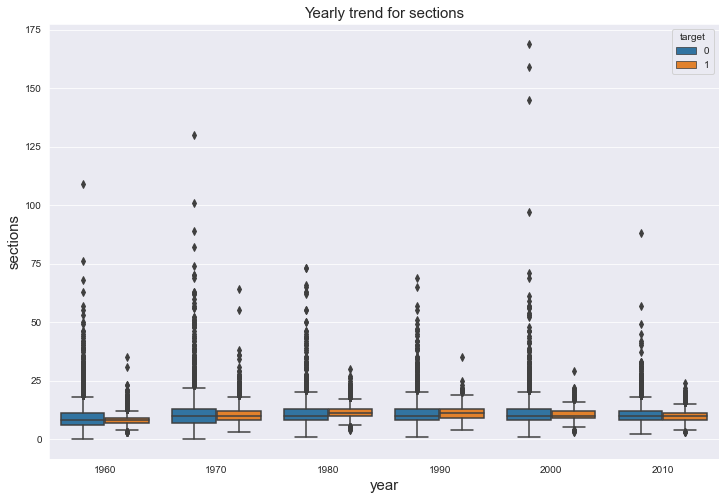

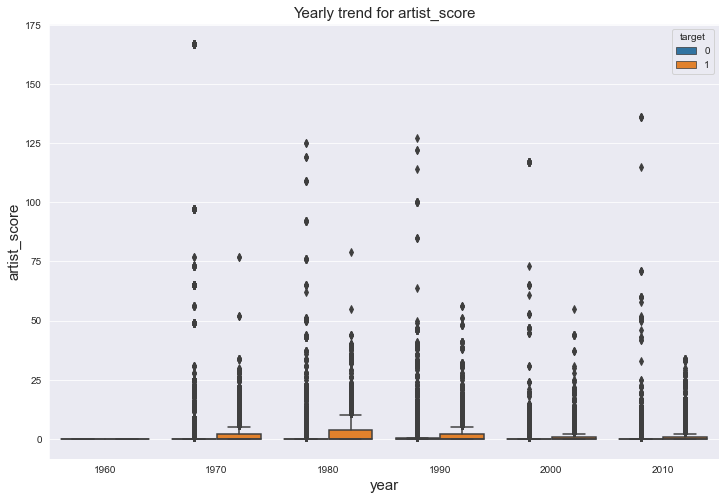

In [84]:
col=[i for i in master_df.columns if i not in ['index','target','year']]
for i in col:
    plt.figure(figsize=(12,8))
    sns.boxplot(x='year',y=i,data=master_df,hue='target',orient='v')
    plt.xlabel('year', fontsize = 15)
    plt.ylabel(i,fontsize = 15)
    plt.title("Yearly trend for "+ i,fontsize = 15)
    plt.show()

<AxesSubplot:xlabel='year', ylabel='artist_score'>

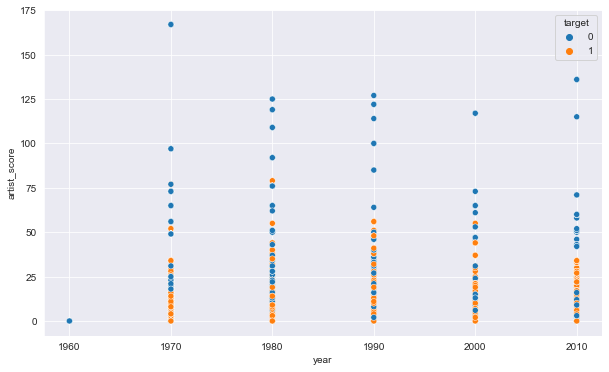

In [85]:
#Plot of artist score to see its behaviour across the decades against the target 

plt.figure(figsize=(10,6))
sns.scatterplot(x='year',y='artist_score',data=master_df,hue='target')

<AxesSubplot:xlabel='duration_ms', ylabel='artist_score'>

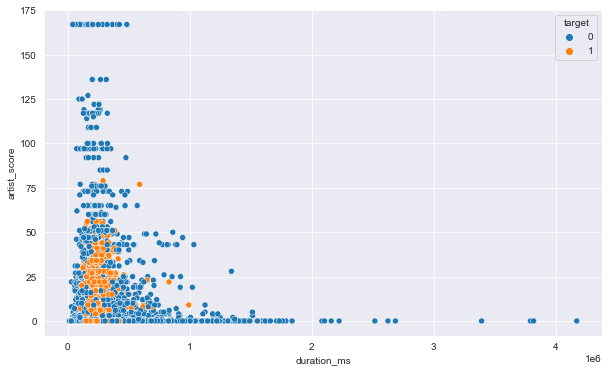

In [86]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration_ms',y='artist_score',data=master_df,hue='target')

## Important Observations

__As mentioned before successful songs have different characteristic than non hits. This is quite evident in the visualization below.__

- ___Hit songs are more danceable as compared to non hit songs.___
- ___Hit songs are more energetic in nature as compared to non hit songs.___
- ___Hits songs at an average are louder than non hit songs.___
- ___Prior to 90s Hit songs had less speechiness as compared to non hits but post the decade hit songs had more speechiness. This can means that recent songs have more spoken words ,this could be also due to popularity of rap songs post 90s.___
- ___Hit Songs are less acoustic as compared to non hit songs.___
- ___Hit songs are less instrumental as compared to non hit songs.___
- ___HIt songs have lower liveness, confirming that most of the hit songs are recorded in studio rather than live___
- ___Hit songs have more valence, which means they are more positive as compared to non hit songs.___
- ___Hit songs at an average have lower durations as compared to non hits.___
- ___Hit songs have a higher time signature i.e have more beats per measure as compared to nonhit song.___
- ___IN hit songs the chorus hits earlier than non hit songs.___
- ___Hit songs at an average have fewer sections than non hit songs .___
- ___We hypothized that artist score to be an important feature in classification of hit vs nonhit but our analysis hasnt proved that yet. This could be due to insufficient data of artists past record.___








## Multi decadal trend analysis

- _Danceability has a postive trend across the decade. The mean value for hit as well as not hits is increasing from 1960's to present times._
- _Energy also like danceability has a upward trend. The value of it keeps on raising through the years._
- _Songs are getting louder with passing years._
- _Although the amount of spoken words increased through out the decades, the association changed midway. Hit songs prior to 90's had less spoken words in the song but after 90s there was change in this trend and at present hit songs have more speechness._
- _Songs have the values of acousticness decreasing through out the decades. The songs are less acoustic as compared to songs in 1960s._
- _Instrumentalness is turning out to be major classifier for hit and not hit songs. The instrumentalness of hit songs is decreasing throughout the decades where as the value of it is increasing throughout for the non hit songs._
- _The liveness is constantly decreasing with years but if we observer that the liveness of hit songs is decreasing but the value of the non-hit songs remains almost constant._
- _Songs are becoming less postive (Valence) with each passing years_
- _There is a steady increase in the values of tempo with each passing year._
- _There is steady rise in the duration of songs from 1960's till 2000 and post that there is dip in the duration of songs. At an average hit songs have lesser duration than non hit songs across the decades._
- _Songs are having lesse beats per measure in the recenet times than in the past. There is a negative trend for this feature._
- Although the chorus hit feature showing in a postive trend, we can observer that the value is increasing steadily for non hit songs but for the hit songs the value remains almost same throughout the decade._
- As sections has high correlation with duration, it exhibits similar behavior like it throughout the decades.
- The artist score is decreasing steadily for each decade since the 70s ( if we ignore 60s).

## Types of Experiments

- Train the data from each decade seperately and predict the data on present decade, upcoming decade as well as on 2010's test using all the classification models.
- Train on the whole data and predict on the data of 2010's.
- Do a test train split on 2010's and predict the output. 
- Measure the evaluation metrics for the models. (Specifically - Precison, recall)
- Pycaret library.

In [87]:
#test train split 

from sklearn.model_selection import train_test_split
train_60s,test_60s=train_test_split(data_60s, test_size=0.3, random_state=42)
train_70s,test_70s=train_test_split(data_70s, test_size=0.3, random_state=42)
train_80s,test_80s=train_test_split(data_80s, test_size=0.3, random_state=42)
train_90s,test_90s=train_test_split(data_90s, test_size=0.3, random_state=42)
train_00s,test_00s=train_test_split(data_00s, test_size=0.3, random_state=42)
train_10s,test_10s=train_test_split(data_10s, test_size=0.3, random_state=42)



In [88]:
#dropping year from all datasets
train_60s.drop(['year'],1,inplace=True)
test_60s.drop(['year'],1,inplace=True)

train_70s.drop(['year'],1,inplace=True)
test_70s.drop(['year'],1,inplace=True)

train_80s.drop(['year'],1,inplace=True)
test_80s.drop(['year'],1,inplace=True)

train_90s.drop(['year'],1,inplace=True)
test_90s.drop(['year'],1,inplace=True)

train_00s.drop(['year'],1,inplace=True)
test_00s.drop(['year'],1,inplace=True)

train_10s.drop(['year'],1,inplace=True)
test_10s.drop(['year'],1,inplace=True)

In [89]:
#creating test copies for exp 2 
test_70s_exp2=test_70s.copy()
test_80s_exp2=test_80s.copy()
test_90s_exp2=test_90s.copy()
test_00s_exp2=test_00s.copy()
test_10s_exp2=test_10s.copy()

__Scaling Of the data__

__As most of the data is in range (0,1) also we do not have much outliers too . Hence we will use min max scalaer on below columns__
- key, tempo, duration_ms, time_signature, chorus_hit, sections, artist_score

In [90]:
from sklearn.preprocessing import MinMaxScaler
scal_cols=['key','tempo','duration_ms','time_signature','chorus_hit','sections','artist_score']
scaler = MinMaxScaler()
train_60s.loc[:,scal_cols]=scaler.fit_transform(train_60s.loc[:,scal_cols])
test_60s.loc[:,scal_cols]=scaler.transform(test_60s.loc[:,scal_cols])
test_70s_exp2.loc[:,scal_cols]=scaler.transform(test_70s_exp2.loc[:,scal_cols]) #scaling the test data of 70s for exp2

train_70s.loc[:,scal_cols]=scaler.fit_transform(train_70s.loc[:,scal_cols])
test_70s.loc[:,scal_cols]=scaler.transform(test_70s.loc[:,scal_cols])
test_80s_exp2.loc[:,scal_cols]=scaler.transform(test_80s_exp2.loc[:,scal_cols]) #scaling the test data of 70s for exp2

train_80s.loc[:,scal_cols]=scaler.fit_transform(train_80s.loc[:,scal_cols])
test_80s.loc[:,scal_cols]=scaler.transform(test_80s.loc[:,scal_cols])
test_90s_exp2.loc[:,scal_cols]=scaler.transform(test_90s_exp2.loc[:,scal_cols]) #scaling the test data of 70s for exp2

train_90s.loc[:,scal_cols]=scaler.fit_transform(train_90s.loc[:,scal_cols])
test_90s.loc[:,scal_cols]=scaler.transform(test_90s.loc[:,scal_cols])
test_00s_exp2.loc[:,scal_cols]=scaler.transform(test_00s_exp2.loc[:,scal_cols]) #scaling the test data of 70s for exp2

train_00s.loc[:,scal_cols]=scaler.fit_transform(train_00s.loc[:,scal_cols])
test_00s.loc[:,scal_cols]=scaler.transform(test_00s.loc[:,scal_cols])
test_10s_exp2.loc[:,scal_cols]=scaler.transform(test_10s_exp2.loc[:,scal_cols]) #scaling the test data of 70s for exp2

train_10s.loc[:,scal_cols]=scaler.fit_transform(train_10s.loc[:,scal_cols])
test_10s.loc[:,scal_cols]=scaler.transform(test_10s.loc[:,scal_cols])


In [ ]:
#scaling the data for the experiment 2 

In [38]:
#creating the dataset with X and y for NN
train_y_60_nn=train_60s['target']
train_X_60_nn=train_60s.copy()
train_X_60_nn.drop(['target'],1,inplace=True)

test_y_60_nn=test_60s['target']
test_X_60_nn=test_60s.copy()
test_X_60_nn.drop(['target'],1,inplace=True)


#creating the dataset with X and y for NN
train_y_70_nn=train_70s['target']
train_X_70_nn=train_70s.copy()
train_X_70_nn.drop(['target'],1,inplace=True)

test_y_70_nn=test_70s['target']
test_X_70_nn=test_70s.copy()
test_X_70_nn.drop(['target'],1,inplace=True)


#creating the dataset with X and y for NN
train_y_80_nn=train_80s['target']
train_X_80_nn=train_80s.copy()
train_X_80_nn.drop(['target'],1,inplace=True)

test_y_80_nn=test_80s['target']
test_X_80_nn=test_80s.copy()
test_X_80_nn.drop(['target'],1,inplace=True)

#creating the dataset with X and y for NN
train_y_90_nn=train_90s['target']
train_X_90_nn=train_90s.copy()
train_X_90_nn.drop(['target'],1,inplace=True)

test_y_90_nn=test_90s['target']
test_X_90_nn=test_90s.copy()
test_X_90_nn.drop(['target'],1,inplace=True)

#creating the dataset with X and y for NN
train_y_00_nn=train_00s['target']
train_X_00_nn=train_00s.copy()
train_X_00_nn.drop(['target'],1,inplace=True)

test_y_00_nn=test_00s['target']
test_X_00_nn=test_00s.copy()
test_X_00_nn.drop(['target'],1,inplace=True)

#creating the dataset with X and y for NN
train_y_10_nn=train_10s['target']
train_X_10_nn=train_10s.copy()
train_X_10_nn.drop(['target'],1,inplace=True)

test_y_10_nn=test_10s['target']
test_X_10_nn=test_10s.copy()
test_X_10_nn.drop(['target'],1,inplace=True)


In [268]:
test_y_70_nn_exp2=test_70s_exp2['target']
test_X_70_nn_exp2=test_70s_exp2.copy()
test_X_70_nn_exp2.drop(['target'],1,inplace=True)

test_y_80_nn_exp2=test_80s_exp2['target']
test_X_80_nn_exp2=test_80s_exp2.copy()
test_X_80_nn_exp2.drop(['target'],1,inplace=True)

test_y_90_nn_exp2=test_90s_exp2['target']
test_X_90_nn_exp2=test_90s_exp2.copy()
test_X_90_nn_exp2.drop(['target'],1,inplace=True)

test_y_00_nn_exp2=test_00s_exp2['target']
test_X_00_nn_exp2=test_00s_exp2.copy()
test_X_00_nn_exp2.drop(['target'],1,inplace=True)

test_y_10_nn_exp2=test_10s_exp2['target']
test_X_10_nn_exp2=test_10s_exp2.copy()
test_X_10_nn_exp2.drop(['target'],1,inplace=True)


# Experiment - 1 and 2

Train the models of each decade individually and predict on that decade as well on the next decade


# 60s Decade

In [39]:
test_60s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593 entries, 8212 to 5843
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      2593 non-null   float64
 1   energy            2593 non-null   float64
 2   key               2593 non-null   float64
 3   loudness          2593 non-null   float64
 4   mode              2593 non-null   int64  
 5   speechiness       2593 non-null   float64
 6   acousticness      2593 non-null   float64
 7   instrumentalness  2593 non-null   float64
 8   liveness          2593 non-null   float64
 9   valence           2593 non-null   float64
 10  tempo             2593 non-null   float64
 11  duration_ms       2593 non-null   float64
 12  time_signature    2593 non-null   float64
 13  chorus_hit        2593 non-null   float64
 14  sections          2593 non-null   float64
 15  target            2593 non-null   int64  
 16  artist_score      2593 non-null   float

In [92]:

clf_60_exp1 = setup(train_60s, target = 'target', session_id=123,test_data=test_60s)

### Logistic Regression - 60's

In [93]:
#creating our base model which is a logistic regression with 10 fold cross validation 
lr_60_exp1=create_model('lr')

In [94]:
evaluate_model(lr_60_exp1)

Parameters
C                        1.0
class_weight            None
dual                   False
fit_intercept           True
intercept_scaling          1
l1_ratio                None
max_iter                1000
multi_class             auto
n_jobs                  None
penalty                   l2
random_state             123
solver                 lbfgs
tol                   0.0001
verbose                    0
warm_start             False

In [95]:
predict_model(lr_60_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.487   0.343  0.363636   -11.469       0.0280        0.5440   
1            0.607   0.303  0.909091   -10.065       0.0244        0.8170   
2            0.569   0.369  0.909091   -10.480       0.0269        0.4910   
3            0.624   0.359  0.090909   -12.259       0.0342        0.9090   
4            0.418   0.366  0.000000   -14.939       0.0374        0.1210   
...            ...     ...       ...       ...          ...           ...   
2588         0.532   0.534  0.727273   -12.420       0.0368        0.7500   
2589         0.522   0.357  0.636364   -13.064       0.0670        0.2800   
2590         0.846   0.346  0.181818   -13.791       0.0541        0.2350   
2591         0.402   0.675  0.909091    -8.872       0.0438        0.5960   
2592         0.464   0.761  0.000000   -10.457       0.0355        0.0301   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000    0.1350    0.674  0.437452     0.097548   
1             0.000000    0.1830    0.555  0.417185     0.083503   
2             0.000079    0.1030    0.562  0.486169     0.092255   
3             0.000001    0.1290    0.622  0.414434     0.096654   
4             0.000000    0.3280    0.378  0.486670     0.076231   
...                ...       ...      ...       ...          ...   
2588          0.074200    0.3350    0.796  0.556825     0.083192   
2589          0.000000    0.0474    0.742  0.531271     0.092523   
2590          0.003810    0.1130    0.746  0.589653     0.070163   
2591          0.000000    0.2480    0.672  0.447695     0.107455   
2592          0.000026    0.2880    0.820  0.431797     0.081885   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0                0.8    0.314458  0.158730           0.0     1.0      0   
1                0.8    0.453683  0.095238           0.0     1.0      1   
2                0.8    0.148452  0.142857           0.0     0.0      0   
3                0.8    0.153447  0.158730           0.0     1.0      0   
4                0.6    0.170932  0.095238           0.0     1.0      0   
...              ...         ...       ...           ...     ...    ...   
2588             0.8    0.191411  0.111111           0.0     1.0      0   
2589             0.8    0.220098  0.142857           0.0     1.0      1   
2590             0.8    0.185464  0.126984           0.0     1.0      1   
2591             0.8    0.155869  0.142857           0.0     1.0      1   
2592             0.8    0.225373  0.063492           0.0     1.0      0   

      Label   Score  
0         1  0.6312  
1         1  0.6594  
2         1  0.5238  
3         1  0.5245  
4         1  0.7378  
...     ...     ...  
2588      1  0.6771  
2589      1  0.7056  
2590      1  0.8026  
2591      1  0.6980  
2592      1  0.8391  

[2593 rows x 19 columns]

In [96]:
#This is tuned logistic regression 
lr_60_tuned_exp1_l2=tune_model(lr_60_exp1,optimize='Prec.')

In [97]:
predict_model(lr_60_tuned_exp1_l2)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.487   0.343  0.363636   -11.469       0.0280        0.5440   
1            0.607   0.303  0.909091   -10.065       0.0244        0.8170   
2            0.569   0.369  0.909091   -10.480       0.0269        0.4910   
3            0.624   0.359  0.090909   -12.259       0.0342        0.9090   
4            0.418   0.366  0.000000   -14.939       0.0374        0.1210   
...            ...     ...       ...       ...          ...           ...   
2588         0.532   0.534  0.727273   -12.420       0.0368        0.7500   
2589         0.522   0.357  0.636364   -13.064       0.0670        0.2800   
2590         0.846   0.346  0.181818   -13.791       0.0541        0.2350   
2591         0.402   0.675  0.909091    -8.872       0.0438        0.5960   
2592         0.464   0.761  0.000000   -10.457       0.0355        0.0301   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000    0.1350    0.674  0.437452     0.097548   
1             0.000000    0.1830    0.555  0.417185     0.083503   
2             0.000079    0.1030    0.562  0.486169     0.092255   
3             0.000001    0.1290    0.622  0.414434     0.096654   
4             0.000000    0.3280    0.378  0.486670     0.076231   
...                ...       ...      ...       ...          ...   
2588          0.074200    0.3350    0.796  0.556825     0.083192   
2589          0.000000    0.0474    0.742  0.531271     0.092523   
2590          0.003810    0.1130    0.746  0.589653     0.070163   
2591          0.000000    0.2480    0.672  0.447695     0.107455   
2592          0.000026    0.2880    0.820  0.431797     0.081885   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0                0.8    0.314458  0.158730           0.0     1.0      0   
1                0.8    0.453683  0.095238           0.0     1.0      1   
2                0.8    0.148452  0.142857           0.0     0.0      0   
3                0.8    0.153447  0.158730           0.0     1.0      0   
4                0.6    0.170932  0.095238           0.0     1.0      0   
...              ...         ...       ...           ...     ...    ...   
2588             0.8    0.191411  0.111111           0.0     1.0      0   
2589             0.8    0.220098  0.142857           0.0     1.0      1   
2590             0.8    0.185464  0.126984           0.0     1.0      1   
2591             0.8    0.155869  0.142857           0.0     1.0      1   
2592             0.8    0.225373  0.063492           0.0     1.0      0   

      Label   Score  
0         1  0.6483  
1         1  0.6766  
2         1  0.5388  
3         1  0.5404  
4         1  0.7539  
...     ...     ...  
2588      1  0.6894  
2589      1  0.7034  
2590      1  0.8218  
2591      1  0.6996  
2592      1  0.8386  

[2593 rows x 19 columns]

In [98]:
evaluate_model(lr_60_tuned_exp1_l2)

Parameters
C                  7.007000000000001
class_weight                      {}
dual                           False
fit_intercept                   True
intercept_scaling                  1
l1_ratio                        None
max_iter                        1000
multi_class                     auto
n_jobs                          None
penalty                           l2
random_state                     123
solver                         lbfgs
tol                           0.0001
verbose                            0
warm_start                     False

In [99]:
#Tuning the logistic regression with l1 penalty
lr_60_exp1_l1=create_model('lr',penalty='l1',solver='liblinear')

In [100]:
lr_60_tuned_exp1_l1=tune_model(lr_60_exp1_l1,optimize='Prec.')

In [101]:
predict_model(lr_60_tuned_exp1_l1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.487   0.343  0.363636   -11.469       0.0280        0.5440   
1            0.607   0.303  0.909091   -10.065       0.0244        0.8170   
2            0.569   0.369  0.909091   -10.480       0.0269        0.4910   
3            0.624   0.359  0.090909   -12.259       0.0342        0.9090   
4            0.418   0.366  0.000000   -14.939       0.0374        0.1210   
...            ...     ...       ...       ...          ...           ...   
2588         0.532   0.534  0.727273   -12.420       0.0368        0.7500   
2589         0.522   0.357  0.636364   -13.064       0.0670        0.2800   
2590         0.846   0.346  0.181818   -13.791       0.0541        0.2350   
2591         0.402   0.675  0.909091    -8.872       0.0438        0.5960   
2592         0.464   0.761  0.000000   -10.457       0.0355        0.0301   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000    0.1350    0.674  0.437452     0.097548   
1             0.000000    0.1830    0.555  0.417185     0.083503   
2             0.000079    0.1030    0.562  0.486169     0.092255   
3             0.000001    0.1290    0.622  0.414434     0.096654   
4             0.000000    0.3280    0.378  0.486670     0.076231   
...                ...       ...      ...       ...          ...   
2588          0.074200    0.3350    0.796  0.556825     0.083192   
2589          0.000000    0.0474    0.742  0.531271     0.092523   
2590          0.003810    0.1130    0.746  0.589653     0.070163   
2591          0.000000    0.2480    0.672  0.447695     0.107455   
2592          0.000026    0.2880    0.820  0.431797     0.081885   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0                0.8    0.314458  0.158730           0.0     1.0      0   
1                0.8    0.453683  0.095238           0.0     1.0      1   
2                0.8    0.148452  0.142857           0.0     0.0      0   
3                0.8    0.153447  0.158730           0.0     1.0      0   
4                0.6    0.170932  0.095238           0.0     1.0      0   
...              ...         ...       ...           ...     ...    ...   
2588             0.8    0.191411  0.111111           0.0     1.0      0   
2589             0.8    0.220098  0.142857           0.0     1.0      1   
2590             0.8    0.185464  0.126984           0.0     1.0      1   
2591             0.8    0.155869  0.142857           0.0     1.0      1   
2592             0.8    0.225373  0.063492           0.0     1.0      0   

      Label   Score  
0         1  0.6430  
1         1  0.6741  
2         1  0.5359  
3         1  0.5364  
4         1  0.7524  
...     ...     ...  
2588      1  0.6888  
2589      1  0.7029  
2590      1  0.8189  
2591      1  0.6994  
2592      1  0.8405  

[2593 rows x 19 columns]

In [102]:
evaluate_model(lr_60_tuned_exp1_l1)

Parameters
C                      4.432
class_weight              {}
dual                   False
fit_intercept           True
intercept_scaling          1
l1_ratio                None
max_iter                1000
multi_class             auto
n_jobs                  None
penalty                   l2
random_state             123
solver             liblinear
tol                   0.0001
verbose                    0
warm_start             False

In [103]:
#predicting the logistic models for the test data of 70's
temp_70=predict_model(lr_60_exp1,test_70s_exp2)
print("f1_score of logistic regression on 70's data : ",round(f1_score(temp_70['target'],temp_70['Label']),3))
print("precison_score of of logistic regression on 70's data : ",round(precision_score(temp_70['target'],temp_70['Label']),3))
print("recall_score of of logistic regression on 70's data ",round(recall_score(temp_70['target'],temp_70['Label']),3))
print("\n")
temp_70=predict_model(lr_60_tuned_exp1_l2,test_70s_exp2)
print("f1_score of logistic regression with l2 regularization on 70's data : ",round(f1_score(temp_70['target'],temp_70['Label']),3))
print("precison_score of of logistic regression with l2 regularization on 70's data : ",round(precision_score(temp_70['target'],temp_70['Label']),3))
print("recall_score of of logistic regression with l2 regularization  on 70's data ",round(recall_score(temp_70['target'],temp_70['Label']),3))
print("\n")

temp_70=predict_model(lr_60_tuned_exp1_l1,test_70s_exp2)
print("f1_score of logistic regression with l1 regularization on 70's data : ",round(f1_score(temp_70['target'],temp_70['Label']),3))
print("precison_score of of logistic regression with l1 regularization on 70's data : ",round(precision_score(temp_70['target'],temp_70['Label']),3))
print("recall_score of of logistic regression with l1 regularization  on 70's data ",round(recall_score(temp_70['target'],temp_70['Label']),3))


f1_score of logistic regression on 70's data :  0.703
precison_score of of logistic regression on 70's data :  0.648
recall_score of of logistic regression on 70's data  0.767


f1_score of logistic regression with l2 regularization on 70's data :  0.696
precison_score of of logistic regression with l2 regularization on 70's data :  0.655
recall_score of of logistic regression with l2 regularization  on 70's data  0.743


f1_score of logistic regression with l1 regularization on 70's data :  0.697
precison_score of of logistic regression with l1 regularization on 70's data :  0.653
recall_score of of logistic regression with l1 regularization  on 70's data  0.747


## SVM - 60s

In [104]:
#SVM
svm_60_exp1=create_model('svm')


In [105]:
evaluate_model(svm_60_exp1)

Parameters
alpha                   0.0001
average                  False
class_weight              None
early_stopping           False
epsilon                    0.1
eta0                     0.001
fit_intercept             True
l1_ratio                  0.15
learning_rate          optimal
loss                     hinge
max_iter                  1000
n_iter_no_change             5
n_jobs                      -1
penalty                     l2
power_t                    0.5
random_state               123
shuffle                   True
tol                      0.001
validation_fraction        0.1
verbose                      0
warm_start               False

In [106]:
#predicting on test 
predict_model(svm_60_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.487   0.343  0.363636   -11.469       0.0280        0.5440   
1            0.607   0.303  0.909091   -10.065       0.0244        0.8170   
2            0.569   0.369  0.909091   -10.480       0.0269        0.4910   
3            0.624   0.359  0.090909   -12.259       0.0342        0.9090   
4            0.418   0.366  0.000000   -14.939       0.0374        0.1210   
...            ...     ...       ...       ...          ...           ...   
2588         0.532   0.534  0.727273   -12.420       0.0368        0.7500   
2589         0.522   0.357  0.636364   -13.064       0.0670        0.2800   
2590         0.846   0.346  0.181818   -13.791       0.0541        0.2350   
2591         0.402   0.675  0.909091    -8.872       0.0438        0.5960   
2592         0.464   0.761  0.000000   -10.457       0.0355        0.0301   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000    0.1350    0.674  0.437452     0.097548   
1             0.000000    0.1830    0.555  0.417185     0.083503   
2             0.000079    0.1030    0.562  0.486169     0.092255   
3             0.000001    0.1290    0.622  0.414434     0.096654   
4             0.000000    0.3280    0.378  0.486670     0.076231   
...                ...       ...      ...       ...          ...   
2588          0.074200    0.3350    0.796  0.556825     0.083192   
2589          0.000000    0.0474    0.742  0.531271     0.092523   
2590          0.003810    0.1130    0.746  0.589653     0.070163   
2591          0.000000    0.2480    0.672  0.447695     0.107455   
2592          0.000026    0.2880    0.820  0.431797     0.081885   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  Label  
0                0.8    0.314458  0.158730           0.0     1.0      0      0  
1                0.8    0.453683  0.095238           0.0     1.0      1      0  
2                0.8    0.148452  0.142857           0.0     0.0      0      0  
3                0.8    0.153447  0.158730           0.0     1.0      0      0  
4                0.6    0.170932  0.095238           0.0     1.0      0      0  
...              ...         ...       ...           ...     ...    ...    ...  
2588             0.8    0.191411  0.111111           0.0     1.0      0      0  
2589             0.8    0.220098  0.142857           0.0     1.0      1      0  
2590             0.8    0.185464  0.126984           0.0     1.0      1      0  
2591             0.8    0.155869  0.142857           0.0     1.0      1      0  
2592             0.8    0.225373  0.063492           0.0     1.0      0      1  

[2593 rows x 18 columns]

In [107]:
svm_60_tuned_exp1=tune_model(svm_60_exp1,optimize='Prec.',n_iter=25)

In [108]:
evaluate_model(svm_60_tuned_exp1)

Parameters
alpha                       1e-06
average                     False
class_weight                 None
early_stopping              False
epsilon                       0.1
eta0                          0.4
fit_intercept               False
l1_ratio             0.7100000001
learning_rate             optimal
loss                        hinge
max_iter                     1000
n_iter_no_change                5
n_jobs                         -1
penalty                        l2
power_t                       0.5
random_state                  123
shuffle                      True
tol                         0.001
validation_fraction           0.1
verbose                         0
warm_start                  False

In [109]:
predict_model(svm_60_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.487   0.343  0.363636   -11.469       0.0280        0.5440   
1            0.607   0.303  0.909091   -10.065       0.0244        0.8170   
2            0.569   0.369  0.909091   -10.480       0.0269        0.4910   
3            0.624   0.359  0.090909   -12.259       0.0342        0.9090   
4            0.418   0.366  0.000000   -14.939       0.0374        0.1210   
...            ...     ...       ...       ...          ...           ...   
2588         0.532   0.534  0.727273   -12.420       0.0368        0.7500   
2589         0.522   0.357  0.636364   -13.064       0.0670        0.2800   
2590         0.846   0.346  0.181818   -13.791       0.0541        0.2350   
2591         0.402   0.675  0.909091    -8.872       0.0438        0.5960   
2592         0.464   0.761  0.000000   -10.457       0.0355        0.0301   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000    0.1350    0.674  0.437452     0.097548   
1             0.000000    0.1830    0.555  0.417185     0.083503   
2             0.000079    0.1030    0.562  0.486169     0.092255   
3             0.000001    0.1290    0.622  0.414434     0.096654   
4             0.000000    0.3280    0.378  0.486670     0.076231   
...                ...       ...      ...       ...          ...   
2588          0.074200    0.3350    0.796  0.556825     0.083192   
2589          0.000000    0.0474    0.742  0.531271     0.092523   
2590          0.003810    0.1130    0.746  0.589653     0.070163   
2591          0.000000    0.2480    0.672  0.447695     0.107455   
2592          0.000026    0.2880    0.820  0.431797     0.081885   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  Label  
0                0.8    0.314458  0.158730           0.0     1.0      0      1  
1                0.8    0.453683  0.095238           0.0     1.0      1      1  
2                0.8    0.148452  0.142857           0.0     0.0      0      1  
3                0.8    0.153447  0.158730           0.0     1.0      0      1  
4                0.6    0.170932  0.095238           0.0     1.0      0      1  
...              ...         ...       ...           ...     ...    ...    ...  
2588             0.8    0.191411  0.111111           0.0     1.0      0      1  
2589             0.8    0.220098  0.142857           0.0     1.0      1      1  
2590             0.8    0.185464  0.126984           0.0     1.0      1      1  
2591             0.8    0.155869  0.142857           0.0     1.0      1      1  
2592             0.8    0.225373  0.063492           0.0     1.0      0      1  

[2593 rows x 18 columns]

In [110]:
#Trying with Radial Kernel 
rdbsvm_60_exp1=create_model('rbfsvm')

In [111]:
predict_model(rdbsvm_60_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.487   0.343  0.363636   -11.469       0.0280        0.5440   
1            0.607   0.303  0.909091   -10.065       0.0244        0.8170   
2            0.569   0.369  0.909091   -10.480       0.0269        0.4910   
3            0.624   0.359  0.090909   -12.259       0.0342        0.9090   
4            0.418   0.366  0.000000   -14.939       0.0374        0.1210   
...            ...     ...       ...       ...          ...           ...   
2588         0.532   0.534  0.727273   -12.420       0.0368        0.7500   
2589         0.522   0.357  0.636364   -13.064       0.0670        0.2800   
2590         0.846   0.346  0.181818   -13.791       0.0541        0.2350   
2591         0.402   0.675  0.909091    -8.872       0.0438        0.5960   
2592         0.464   0.761  0.000000   -10.457       0.0355        0.0301   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000    0.1350    0.674  0.437452     0.097548   
1             0.000000    0.1830    0.555  0.417185     0.083503   
2             0.000079    0.1030    0.562  0.486169     0.092255   
3             0.000001    0.1290    0.622  0.414434     0.096654   
4             0.000000    0.3280    0.378  0.486670     0.076231   
...                ...       ...      ...       ...          ...   
2588          0.074200    0.3350    0.796  0.556825     0.083192   
2589          0.000000    0.0474    0.742  0.531271     0.092523   
2590          0.003810    0.1130    0.746  0.589653     0.070163   
2591          0.000000    0.2480    0.672  0.447695     0.107455   
2592          0.000026    0.2880    0.820  0.431797     0.081885   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0                0.8    0.314458  0.158730           0.0     1.0      0   
1                0.8    0.453683  0.095238           0.0     1.0      1   
2                0.8    0.148452  0.142857           0.0     0.0      0   
3                0.8    0.153447  0.158730           0.0     1.0      0   
4                0.6    0.170932  0.095238           0.0     1.0      0   
...              ...         ...       ...           ...     ...    ...   
2588             0.8    0.191411  0.111111           0.0     1.0      0   
2589             0.8    0.220098  0.142857           0.0     1.0      1   
2590             0.8    0.185464  0.126984           0.0     1.0      1   
2591             0.8    0.155869  0.142857           0.0     1.0      1   
2592             0.8    0.225373  0.063492           0.0     1.0      0   

      Label   Score  
0         1  0.7084  
1         1  0.7154  
2         0  0.5960  
3         1  0.6635  
4         1  0.6810  
...     ...     ...  
2588      1  0.6935  
2589      1  0.7417  
2590      1  0.7850  
2591      1  0.7202  
2592      1  0.7401  

[2593 rows x 19 columns]

In [112]:
evaluate_model(rdbsvm_60_exp1)

Parameters
C                              1.0
break_ties                   False
cache_size                     200
class_weight                  None
coef0                          0.0
decision_function_shape        ovr
degree                           3
gamma                         auto
kernel                         rbf
max_iter                        -1
probability                   True
random_state                   123
shrinking                     True
tol                          0.001
verbose                      False

In [113]:
rdbsvm_60_tuned_exp1=tune_model(rdbsvm_60_exp1,optimize='Precision')

In [114]:
predict_model(rdbsvm_60_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.487   0.343  0.363636   -11.469       0.0280        0.5440   
1            0.607   0.303  0.909091   -10.065       0.0244        0.8170   
2            0.569   0.369  0.909091   -10.480       0.0269        0.4910   
3            0.624   0.359  0.090909   -12.259       0.0342        0.9090   
4            0.418   0.366  0.000000   -14.939       0.0374        0.1210   
...            ...     ...       ...       ...          ...           ...   
2588         0.532   0.534  0.727273   -12.420       0.0368        0.7500   
2589         0.522   0.357  0.636364   -13.064       0.0670        0.2800   
2590         0.846   0.346  0.181818   -13.791       0.0541        0.2350   
2591         0.402   0.675  0.909091    -8.872       0.0438        0.5960   
2592         0.464   0.761  0.000000   -10.457       0.0355        0.0301   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000    0.1350    0.674  0.437452     0.097548   
1             0.000000    0.1830    0.555  0.417185     0.083503   
2             0.000079    0.1030    0.562  0.486169     0.092255   
3             0.000001    0.1290    0.622  0.414434     0.096654   
4             0.000000    0.3280    0.378  0.486670     0.076231   
...                ...       ...      ...       ...          ...   
2588          0.074200    0.3350    0.796  0.556825     0.083192   
2589          0.000000    0.0474    0.742  0.531271     0.092523   
2590          0.003810    0.1130    0.746  0.589653     0.070163   
2591          0.000000    0.2480    0.672  0.447695     0.107455   
2592          0.000026    0.2880    0.820  0.431797     0.081885   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0                0.8    0.314458  0.158730           0.0     1.0      0   
1                0.8    0.453683  0.095238           0.0     1.0      1   
2                0.8    0.148452  0.142857           0.0     0.0      0   
3                0.8    0.153447  0.158730           0.0     1.0      0   
4                0.6    0.170932  0.095238           0.0     1.0      0   
...              ...         ...       ...           ...     ...    ...   
2588             0.8    0.191411  0.111111           0.0     1.0      0   
2589             0.8    0.220098  0.142857           0.0     1.0      1   
2590             0.8    0.185464  0.126984           0.0     1.0      1   
2591             0.8    0.155869  0.142857           0.0     1.0      1   
2592             0.8    0.225373  0.063492           0.0     1.0      0   

      Label   Score  
0         1  0.7442  
1         1  0.7479  
2         0  0.5604  
3         1  0.6011  
4         1  0.8823  
...     ...     ...  
2588      1  0.7218  
2589      1  0.7465  
2590      1  0.8400  
2591      1  0.7309  
2592      1  0.7370  

[2593 rows x 19 columns]

In [115]:
evaluate_model(rdbsvm_60_tuned_exp1)

Parameters
C                            48.92
break_ties                   False
cache_size                     200
class_weight                    {}
coef0                          0.0
decision_function_shape        ovr
degree                           3
gamma                         auto
kernel                         rbf
max_iter                        -1
probability                   True
random_state                   123
shrinking                     True
tol                          0.001
verbose                      False

In [116]:
#predicting the SVM  models for the test data of 70's
temp_70=predict_model(svm_60_exp1,test_70s_exp2)
print("f1_score of SVM on 70's data : ",round(f1_score(temp_70['target'],temp_70['Label']),3))
print("precison_score of of SVM on 70's data : ",round(precision_score(temp_70['target'],temp_70['Label']),3))
print("recall_score of of SVM on 70's data ",round(recall_score(temp_70['target'],temp_70['Label']),3))
print("\n")
temp_70=predict_model(svm_60_tuned_exp1,test_70s_exp2)
print("f1_score of tuned SVM on 70's data : ",round(f1_score(temp_70['target'],temp_70['Label']),3))
print("precison_score of tuned SVM with l2 regularization on 70's data : ",round(precision_score(temp_70['target'],temp_70['Label']),3))
print("recall_score of tuned SVM with l2 regularization  on 70's data ",round(recall_score(temp_70['target'],temp_70['Label']),3))
print("\n")

temp_70=predict_model(rdbsvm_60_exp1,test_70s_exp2)
print("f1_score of Radial SVM on 70's data : ",round(f1_score(temp_70['target'],temp_70['Label']),3))
print("precison_score of Radial SVM on 70's data : ",round(precision_score(temp_70['target'],temp_70['Label']),3))
print("recall_score of Radial SVM on 70's data ",round(recall_score(temp_70['target'],temp_70['Label']),3))
print("\n")

temp_70=predict_model(rdbsvm_60_tuned_exp1,test_70s_exp2)
print("f1_score of Tuned Radial SVM on 70's data : ",round(f1_score(temp_70['target'],temp_70['Label']),3))
print("precison_score of Tuned Radial SVMn on 70's data : ",round(precision_score(temp_70['target'],temp_70['Label']),3))
print("recall_score of Tuned Radial SVM on 70's data ",round(recall_score(temp_70['target'],temp_70['Label']),3))


f1_score of SVM on 70's data :  0.407
precison_score of of SVM on 70's data :  0.68
recall_score of of SVM on 70's data  0.29


f1_score of tuned SVM on 70's data :  0.721
precison_score of tuned SVM with l2 regularization on 70's data :  0.637
recall_score of tuned SVM with l2 regularization  on 70's data  0.829


f1_score of Radial SVM on 70's data :  0.631
precison_score of Radial SVM on 70's data :  0.613
recall_score of Radial SVM on 70's data  0.651


f1_score of Tuned Radial SVM on 70's data :  0.663
precison_score of Tuned Radial SVMn on 70's data :  0.649
recall_score of Tuned Radial SVM on 70's data  0.678


## Random Forest - 60s

In [117]:
rf_60_exp1=create_model('rf')

In [118]:
rf_60_exp1

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [119]:
#predicting on  the test data 
predict_model(rf_60_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.487   0.343  0.363636   -11.469       0.0280        0.5440   
1            0.607   0.303  0.909091   -10.065       0.0244        0.8170   
2            0.569   0.369  0.909091   -10.480       0.0269        0.4910   
3            0.624   0.359  0.090909   -12.259       0.0342        0.9090   
4            0.418   0.366  0.000000   -14.939       0.0374        0.1210   
...            ...     ...       ...       ...          ...           ...   
2588         0.532   0.534  0.727273   -12.420       0.0368        0.7500   
2589         0.522   0.357  0.636364   -13.064       0.0670        0.2800   
2590         0.846   0.346  0.181818   -13.791       0.0541        0.2350   
2591         0.402   0.675  0.909091    -8.872       0.0438        0.5960   
2592         0.464   0.761  0.000000   -10.457       0.0355        0.0301   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000    0.1350    0.674  0.437452     0.097548   
1             0.000000    0.1830    0.555  0.417185     0.083503   
2             0.000079    0.1030    0.562  0.486169     0.092255   
3             0.000001    0.1290    0.622  0.414434     0.096654   
4             0.000000    0.3280    0.378  0.486670     0.076231   
...                ...       ...      ...       ...          ...   
2588          0.074200    0.3350    0.796  0.556825     0.083192   
2589          0.000000    0.0474    0.742  0.531271     0.092523   
2590          0.003810    0.1130    0.746  0.589653     0.070163   
2591          0.000000    0.2480    0.672  0.447695     0.107455   
2592          0.000026    0.2880    0.820  0.431797     0.081885   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0                0.8    0.314458  0.158730           0.0     1.0      0   
1                0.8    0.453683  0.095238           0.0     1.0      1   
2                0.8    0.148452  0.142857           0.0     0.0      0   
3                0.8    0.153447  0.158730           0.0     1.0      0   
4                0.6    0.170932  0.095238           0.0     1.0      0   
...              ...         ...       ...           ...     ...    ...   
2588             0.8    0.191411  0.111111           0.0     1.0      0   
2589             0.8    0.220098  0.142857           0.0     1.0      1   
2590             0.8    0.185464  0.126984           0.0     1.0      1   
2591             0.8    0.155869  0.142857           0.0     1.0      1   
2592             0.8    0.225373  0.063492           0.0     1.0      0   

      Label  Score  
0         1   0.93  
1         1   0.76  
2         1   0.65  
3         0   0.65  
4         1   0.70  
...     ...    ...  
2588      1   0.59  
2589      1   0.65  
2590      1   0.73  
2591      1   0.87  
2592      1   0.76  

[2593 rows x 19 columns]

In [120]:
evaluate_model(rf_60_exp1)

Parameters
bootstrap                      True
ccp_alpha                       0.0
class_weight                   None
criterion                      gini
max_depth                      None
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease           0.0
min_impurity_split             None
min_samples_leaf                  1
min_samples_split                 2
min_weight_fraction_leaf        0.0
n_estimators                    100
n_jobs                           -1
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

In [121]:
rf_60_tuned_exp1=tune_model(rf_60_exp1,optimize='Prec.',n_iter=25)

In [122]:
evaluate_model(rf_60_tuned_exp1)

Parameters
bootstrap                     False
ccp_alpha                       0.0
class_weight                     {}
criterion                      gini
max_depth                         9
max_features                   log2
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease             0
min_impurity_split             None
min_samples_leaf                  6
min_samples_split                 7
min_weight_fraction_leaf        0.0
n_estimators                    220
n_jobs                           -1
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

In [123]:
predict_model(rf_60_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.487   0.343  0.363636   -11.469       0.0280        0.5440   
1            0.607   0.303  0.909091   -10.065       0.0244        0.8170   
2            0.569   0.369  0.909091   -10.480       0.0269        0.4910   
3            0.624   0.359  0.090909   -12.259       0.0342        0.9090   
4            0.418   0.366  0.000000   -14.939       0.0374        0.1210   
...            ...     ...       ...       ...          ...           ...   
2588         0.532   0.534  0.727273   -12.420       0.0368        0.7500   
2589         0.522   0.357  0.636364   -13.064       0.0670        0.2800   
2590         0.846   0.346  0.181818   -13.791       0.0541        0.2350   
2591         0.402   0.675  0.909091    -8.872       0.0438        0.5960   
2592         0.464   0.761  0.000000   -10.457       0.0355        0.0301   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000    0.1350    0.674  0.437452     0.097548   
1             0.000000    0.1830    0.555  0.417185     0.083503   
2             0.000079    0.1030    0.562  0.486169     0.092255   
3             0.000001    0.1290    0.622  0.414434     0.096654   
4             0.000000    0.3280    0.378  0.486670     0.076231   
...                ...       ...      ...       ...          ...   
2588          0.074200    0.3350    0.796  0.556825     0.083192   
2589          0.000000    0.0474    0.742  0.531271     0.092523   
2590          0.003810    0.1130    0.746  0.589653     0.070163   
2591          0.000000    0.2480    0.672  0.447695     0.107455   
2592          0.000026    0.2880    0.820  0.431797     0.081885   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0                0.8    0.314458  0.158730           0.0     1.0      0   
1                0.8    0.453683  0.095238           0.0     1.0      1   
2                0.8    0.148452  0.142857           0.0     0.0      0   
3                0.8    0.153447  0.158730           0.0     1.0      0   
4                0.6    0.170932  0.095238           0.0     1.0      0   
...              ...         ...       ...           ...     ...    ...   
2588             0.8    0.191411  0.111111           0.0     1.0      0   
2589             0.8    0.220098  0.142857           0.0     1.0      1   
2590             0.8    0.185464  0.126984           0.0     1.0      1   
2591             0.8    0.155869  0.142857           0.0     1.0      1   
2592             0.8    0.225373  0.063492           0.0     1.0      0   

      Label   Score  
0         1  0.7616  
1         1  0.7489  
2         1  0.6286  
3         1  0.5657  
4         1  0.7349  
...     ...     ...  
2588      0  0.5213  
2589      1  0.7014  
2590      1  0.7134  
2591      1  0.7683  
2592      1  0.7337  

[2593 rows x 19 columns]

In [124]:
#predicting the RF trained 60s  models for the test data of 70's
temp_70=predict_model(rf_60_exp1,test_70s_exp2)
print("f1_score of RF on 70's data : ",round(f1_score(temp_70['target'],temp_70['Label']),3))
print("precison_score of RF on 70's data : ",round(precision_score(temp_70['target'],temp_70['Label']),3))
print("recall_score of RF on 70's data ",round(recall_score(temp_70['target'],temp_70['Label']),3))
print("\n")
temp_70=predict_model(rf_60_tuned_exp1,test_70s_exp2)
print("f1_score of tuned RF on 70's data : ",round(f1_score(temp_70['target'],temp_70['Label']),3))
print("precison_score of tuned RF 70's data : ",round(precision_score(temp_70['target'],temp_70['Label']),3))
print("recall_score of tuned RF on 70's data ",round(recall_score(temp_70['target'],temp_70['Label']),3))
print("\n")

f1_score of RF on 70's data :  0.648
precison_score of RF on 70's data :  0.689
recall_score of RF on 70's data  0.611


f1_score of tuned RF on 70's data :  0.651
precison_score of tuned RF 70's data :  0.672
recall_score of tuned RF on 70's data  0.63




## XGboost - 60s

In [125]:
xgb_60_exp1=create_model('xgboost')

In [126]:
evaluate_model(xgb_60_exp1)

Parameters
objective                binary:logistic
use_label_encoder                   True
base_score                           0.5
booster                           gbtree
colsample_bylevel                      1
colsample_bynode                       1
colsample_bytree                       1
gamma                                  0
gpu_id                                -1
importance_type                     gain
interaction_constraints                 
learning_rate                0.300000012
max_delta_step                         0
max_depth                              6
min_child_weight                       1
missing                              nan
monotone_constraints                  ()
n_estimators                         100
n_jobs                                -1
num_parallel_tree                      1
random_state                         123
reg_alpha                              0
reg_lambda                             1
scale_pos_weight                       1
subsample                              1
tree_method                         auto
validate_parameters                    1
verbosity                              0

In [127]:
predict_model(xgb_60_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.487   0.343  0.363636   -11.469       0.0280        0.5440   
1            0.607   0.303  0.909091   -10.065       0.0244        0.8170   
2            0.569   0.369  0.909091   -10.480       0.0269        0.4910   
3            0.624   0.359  0.090909   -12.259       0.0342        0.9090   
4            0.418   0.366  0.000000   -14.939       0.0374        0.1210   
...            ...     ...       ...       ...          ...           ...   
2588         0.532   0.534  0.727273   -12.420       0.0368        0.7500   
2589         0.522   0.357  0.636364   -13.064       0.0670        0.2800   
2590         0.846   0.346  0.181818   -13.791       0.0541        0.2350   
2591         0.402   0.675  0.909091    -8.872       0.0438        0.5960   
2592         0.464   0.761  0.000000   -10.457       0.0355        0.0301   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000    0.1350    0.674  0.437452     0.097548   
1             0.000000    0.1830    0.555  0.417185     0.083503   
2             0.000079    0.1030    0.562  0.486169     0.092255   
3             0.000001    0.1290    0.622  0.414434     0.096654   
4             0.000000    0.3280    0.378  0.486670     0.076231   
...                ...       ...      ...       ...          ...   
2588          0.074200    0.3350    0.796  0.556825     0.083192   
2589          0.000000    0.0474    0.742  0.531271     0.092523   
2590          0.003810    0.1130    0.746  0.589653     0.070163   
2591          0.000000    0.2480    0.672  0.447695     0.107455   
2592          0.000026    0.2880    0.820  0.431797     0.081885   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0                0.8    0.314458  0.158730           0.0     1.0      0   
1                0.8    0.453683  0.095238           0.0     1.0      1   
2                0.8    0.148452  0.142857           0.0     0.0      0   
3                0.8    0.153447  0.158730           0.0     1.0      0   
4                0.6    0.170932  0.095238           0.0     1.0      0   
...              ...         ...       ...           ...     ...    ...   
2588             0.8    0.191411  0.111111           0.0     1.0      0   
2589             0.8    0.220098  0.142857           0.0     1.0      1   
2590             0.8    0.185464  0.126984           0.0     1.0      1   
2591             0.8    0.155869  0.142857           0.0     1.0      1   
2592             0.8    0.225373  0.063492           0.0     1.0      0   

      Label   Score  
0         1  0.8451  
1         1  0.8546  
2         1  0.6050  
3         0  0.5711  
4         1  0.8155  
...     ...     ...  
2588      0  0.7429  
2589      0  0.5244  
2590      1  0.9410  
2591      1  0.9335  
2592      1  0.7168  

[2593 rows x 19 columns]

In [128]:
xgb_60_tuned_exp1=tune_model(xgb_60_exp1,optimize='Prec.')

In [129]:
predict_model(xgb_60_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.487   0.343  0.363636   -11.469       0.0280        0.5440   
1            0.607   0.303  0.909091   -10.065       0.0244        0.8170   
2            0.569   0.369  0.909091   -10.480       0.0269        0.4910   
3            0.624   0.359  0.090909   -12.259       0.0342        0.9090   
4            0.418   0.366  0.000000   -14.939       0.0374        0.1210   
...            ...     ...       ...       ...          ...           ...   
2588         0.532   0.534  0.727273   -12.420       0.0368        0.7500   
2589         0.522   0.357  0.636364   -13.064       0.0670        0.2800   
2590         0.846   0.346  0.181818   -13.791       0.0541        0.2350   
2591         0.402   0.675  0.909091    -8.872       0.0438        0.5960   
2592         0.464   0.761  0.000000   -10.457       0.0355        0.0301   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000000    0.1350    0.674  0.437452     0.097548   
1             0.000000    0.1830    0.555  0.417185     0.083503   
2             0.000079    0.1030    0.562  0.486169     0.092255   
3             0.000001    0.1290    0.622  0.414434     0.096654   
4             0.000000    0.3280    0.378  0.486670     0.076231   
...                ...       ...      ...       ...          ...   
2588          0.074200    0.3350    0.796  0.556825     0.083192   
2589          0.000000    0.0474    0.742  0.531271     0.092523   
2590          0.003810    0.1130    0.746  0.589653     0.070163   
2591          0.000000    0.2480    0.672  0.447695     0.107455   
2592          0.000026    0.2880    0.820  0.431797     0.081885   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0                0.8    0.314458  0.158730           0.0     1.0      0   
1                0.8    0.453683  0.095238           0.0     1.0      1   
2                0.8    0.148452  0.142857           0.0     0.0      0   
3                0.8    0.153447  0.158730           0.0     1.0      0   
4                0.6    0.170932  0.095238           0.0     1.0      0   
...              ...         ...       ...           ...     ...    ...   
2588             0.8    0.191411  0.111111           0.0     1.0      0   
2589             0.8    0.220098  0.142857           0.0     1.0      1   
2590             0.8    0.185464  0.126984           0.0     1.0      1   
2591             0.8    0.155869  0.142857           0.0     1.0      1   
2592             0.8    0.225373  0.063492           0.0     1.0      0   

      Label   Score  
0         1  0.8968  
1         1  0.9566  
2         1  0.9623  
3         0  0.8741  
4         1  0.8308  
...     ...     ...  
2588      1  0.8371  
2589      0  0.6538  
2590      1  0.7313  
2591      1  0.9844  
2592      1  0.9801  

[2593 rows x 19 columns]

In [130]:
evaluate_model(xgb_60_tuned_exp1)

Parameters
objective                binary:logistic
use_label_encoder                   True
base_score                           0.5
booster                           gbtree
colsample_bylevel                      1
colsample_bynode                       1
colsample_bytree                       1
gamma                                  0
gpu_id                                -1
importance_type                     gain
interaction_constraints                 
learning_rate                      0.323
max_delta_step                         0
max_depth                             11
min_child_weight                       4
missing                              nan
monotone_constraints                  ()
n_estimators                         100
n_jobs                                -1
num_parallel_tree                      1
random_state                         123
reg_alpha                            0.4
reg_lambda                           0.3
scale_pos_weight                     1.9
subsample                            0.7
tree_method                         auto
validate_parameters                    1
verbosity                              0

In [131]:
#predicting the RF trained 60s  models for the test data of 70's
temp_70=predict_model(xgb_60_exp1,test_70s_exp2)
print("f1_score of XGB on 70's data : ",round(f1_score(temp_70['target'],temp_70['Label']),3))
print("precison_score of XGB on 70's data : ",round(precision_score(temp_70['target'],temp_70['Label']),3))
print("recall_score of XGB on 70's data ",round(recall_score(temp_70['target'],temp_70['Label']),3))
print("\n")
temp_70=predict_model(xgb_60_tuned_exp1,test_70s_exp2)
print("f1_score of tuned Tuned XGB on 70's data : ",round(f1_score(temp_70['target'],temp_70['Label']),3))
print("precison_score of tuned XGB 70's data : ",round(precision_score(temp_70['target'],temp_70['Label']),3))
print("recall_score of tuned XGB on 70's data ",round(recall_score(temp_70['target'],temp_70['Label']),3))
print("\n")

f1_score of XGB on 70's data :  0.681
precison_score of XGB on 70's data :  0.679
recall_score of XGB on 70's data  0.684


f1_score of tuned Tuned XGB on 70's data :  0.705
precison_score of tuned XGB 70's data :  0.679
recall_score of tuned XGB on 70's data  0.733




## Neural Networks - 60s

In [269]:

tf.random.set_seed(1234)

In [270]:
NN_60_exp1 = Sequential(
    [
        Dense(32, activation='relu', input_shape=(16,), kernel_initializer='he_uniform'), 
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid'),
    ]
)

In [271]:
NN_60_exp1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [272]:
#nitializing earlystopping callback and training the model
#from keras import callbacks 
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
#                                        mode ="min", patience = 7,  
#                                        restore_best_weights = True) 

In [273]:
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_60_exp1.compile(optimizer=opt,loss='binary_crossentropy',metrics=['Precision'])

hist = NN_60_exp1.fit(train_X_60_nn, train_y_60_nn, epochs=175,validation_split=0.3)

Epoch 1/175
133/133 [==============================] - 3s 7ms/step - loss: 0.8089 - precision: 0.5225 - val_loss: 0.5998 - val_precision: 0.6278
Epoch 2/175
133/133 [==============================] - 0s 2ms/step - loss: 0.6198 - precision: 0.6399 - val_loss: 0.5791 - val_precision: 0.6329
Epoch 3/175
133/133 [==============================] - 0s 2ms/step - loss: 0.5935 - precision: 0.6586 - val_loss: 0.5842 - val_precision: 0.6196
Epoch 4/175
133/133 [==============================] - 0s 3ms/step - loss: 0.5879 - precision: 0.6659 - val_loss: 0.5663 - val_precision: 0.6606
Epoch 5/175
133/133 [==============================] - 0s 3ms/step - loss: 0.5852 - precision: 0.6598 - val_loss: 0.5619 - val_precision: 0.6450
Epoch 6/175
133/133 [==============================] - 0s 2ms/step - loss: 0.5687 - precision: 0.6874 - val_loss: 0.5774 - val_precision: 0.6215
Epoch 7/175
133/133 [==============================] - 0s 2ms/step - loss: 0.5884 - precision: 0.6511 - val_loss: 0.5575 - val_pre

133/133 [==============================] - 0s 2ms/step - loss: 0.5079 - precision: 0.7199 - val_loss: 0.5221 - val_precision: 0.6794
Epoch 114/175
133/133 [==============================] - 0s 3ms/step - loss: 0.5131 - precision: 0.7041 - val_loss: 0.5251 - val_precision: 0.6704
Epoch 115/175
133/133 [==============================] - 0s 3ms/step - loss: 0.4972 - precision: 0.7178 - val_loss: 0.5214 - val_precision: 0.6804
Epoch 116/175
133/133 [==============================] - 0s 2ms/step - loss: 0.5086 - precision: 0.7115 - val_loss: 0.5219 - val_precision: 0.6836
Epoch 117/175
133/133 [==============================] - 0s 3ms/step - loss: 0.5044 - precision: 0.7194 - val_loss: 0.5192 - val_precision: 0.6878
Epoch 118/175
133/133 [==============================] - 0s 3ms/step - loss: 0.5061 - precision: 0.7189 - val_loss: 0.5200 - val_precision: 0.6770
Epoch 119/175
133/133 [==============================] - 1s 4ms/step - loss: 0.5079 - precision: 0.7146 - val_loss: 0.5187 - val_pre

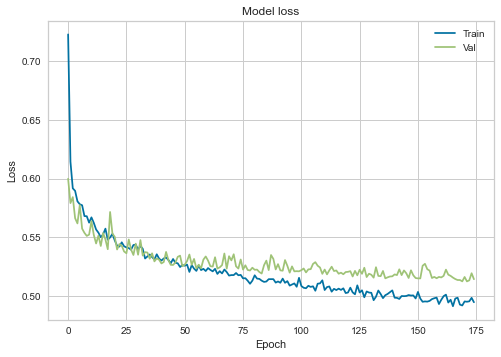

In [274]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


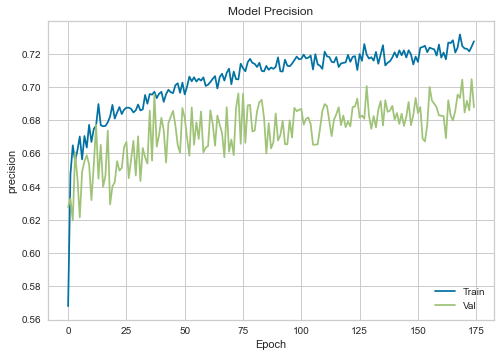

In [275]:

plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [276]:
y_train_pred=NN_60_exp1.predict_classes(train_X_60_nn)

print(round(f1_score(train_y_60_nn,y_train_pred),3))
print(round(precision_score(train_y_60_nn,y_train_pred),3))
print(round(recall_score(train_y_60_nn,y_train_pred),3))

0.783
0.717
0.862


In [277]:
y_test_pred=NN_60_exp1.predict_classes(test_X_60_nn)

print(round(f1_score(test_y_60_nn,y_test_pred),3))
print(round(precision_score(test_y_60_nn,y_test_pred),3))
print(round(recall_score(test_y_60_nn,y_test_pred),3))



0.763
0.692
0.851


In [278]:
#predicting using the NN model on the 70's data 

y_test_70_pred=NN_60_exp1.predict_classes(test_X_70_nn_exp2)

print(round(f1_score(test_y_70_nn_exp2,y_test_70_pred),3))
print(round(precision_score(test_y_70_nn_exp2,y_test_70_pred),3))
print(round(recall_score(test_y_70_nn_exp2,y_test_70_pred),3))


0.627
0.636
0.618


In [412]:
evaluate_model(rf_60_exp1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [413]:
evaluate_model(xgb_60_exp1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#The best performing model in 60s are 
- Random Forest 
- XGboost

The most important features in the ___Random forest___ are 
- Instrumentalness
- Acousticness
- Duration_ms
- Loudness 

The most important features in the ___XGB___ are 
- Instrumentalness
- mode 1 
- duration_ms
- Acousticness

# 70's Decade

In [265]:
##

In [132]:
clf_70_exp1 = setup(train_70s, target = 'target', session_id=123,test_data=test_70s)

### Linear regression - 70s

In [133]:
lr_70_exp1=create_model('lr')

In [134]:
evaluate_model(lr_70_exp1)

Parameters
C                        1.0
class_weight            None
dual                   False
fit_intercept           True
intercept_scaling          1
l1_ratio                None
max_iter                1000
multi_class             auto
n_jobs                  None
penalty                   l2
random_state             123
solver                 lbfgs
tol                   0.0001
verbose                    0
warm_start             False

In [135]:
predict_model(lr_70_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0            0.389  0.6300  0.454545  -9.585000       0.2370       0.12300   
1            0.434  0.2780  0.272727 -12.400000       0.0324       0.78100   
2            0.544  0.0458  0.454545 -18.719999       0.0584       0.98100   
3            0.679  0.5010  0.181818 -10.682000       0.0451       0.23900   
4            0.321  0.9500  0.636364  -8.383000       0.2070       0.00932   
...            ...     ...       ...        ...          ...           ...   
2325         0.327  0.4650  0.636364  -8.677000       0.0303       0.55000   
2326         0.473  0.3130  0.818182 -16.841999       0.0271       0.58400   
2327         0.409  0.2160  0.818182 -17.215000       0.0388       0.84000   
2328         0.604  0.3770  0.454545 -12.179000       0.0358       0.65100   
2329         0.506  0.3200  0.909091 -14.447000       0.3270       0.65900   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.027300    0.2340    0.724  0.622993     0.114394   
1             0.026400    0.1200    0.214  0.295093     0.058489   
2             0.000213    0.1140    0.217  0.514787     0.073890   
3             0.000000    0.0797    0.710  0.377771     0.085570   
4             0.000011    0.3850    0.143  0.421574     0.087507   
...                ...       ...      ...       ...          ...   
2325          0.007280    0.1220    0.256  0.483123     0.120374   
2326          0.022800    0.1190    0.611  0.460215     0.058471   
2327          0.895000    0.1080    0.527  0.588742     0.060583   
2328          0.000002    0.1030    0.900  0.451118     0.064586   
2329          0.000018    0.1350    0.719  0.532556     0.105661   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.341751  0.097561      0.000000     0.0      0   
1               0.50    0.174553  0.097561      0.000000     1.0      0   
2               0.75    0.496614  0.097561      0.000000     1.0      0   
3               0.75    0.167711  0.121951      0.000000     1.0      1   
4               0.75    0.374925  0.109756      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
2325            0.75    0.207290  0.146341      0.131737     0.0      0   
2326            0.50    0.199395  0.097561      0.083832     0.0      1   
2327            0.75    0.140359  0.085366      0.053892     1.0      0   
2328            0.75    0.140038  0.085366      0.005988     0.0      1   
2329            0.50    0.090892  0.158537      0.053892     1.0      1   

      Label   Score  
0         0  0.5941  
1         0  0.7097  
2         0  0.7233  
3         1  0.7074  
4         0  0.5178  
...     ...     ...  
2325      0  0.5039  
2326      0  0.6236  
2327      0  0.9711  
2328      1  0.6193  
2329      0  0.9155  

[2330 rows x 19 columns]

In [136]:
lr_70_exp1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
lr_70_tuned_exp1_l2=tune_model(lr_70_exp1,optimize='Precision')

In [138]:
evaluate_model(lr_70_tuned_exp1_l2)

Parameters
C                       5.56
class_weight        balanced
dual                   False
fit_intercept           True
intercept_scaling          1
l1_ratio                None
max_iter                1000
multi_class             auto
n_jobs                  None
penalty                 none
random_state             123
solver                 lbfgs
tol                   0.0001
verbose                    0
warm_start             False

In [139]:
predict_model(lr_70_tuned_exp1_l2)

danceability  energy       key   loudness  speechiness  acousticness  \
0            0.389  0.6300  0.454545  -9.585000       0.2370       0.12300   
1            0.434  0.2780  0.272727 -12.400000       0.0324       0.78100   
2            0.544  0.0458  0.454545 -18.719999       0.0584       0.98100   
3            0.679  0.5010  0.181818 -10.682000       0.0451       0.23900   
4            0.321  0.9500  0.636364  -8.383000       0.2070       0.00932   
...            ...     ...       ...        ...          ...           ...   
2325         0.327  0.4650  0.636364  -8.677000       0.0303       0.55000   
2326         0.473  0.3130  0.818182 -16.841999       0.0271       0.58400   
2327         0.409  0.2160  0.818182 -17.215000       0.0388       0.84000   
2328         0.604  0.3770  0.454545 -12.179000       0.0358       0.65100   
2329         0.506  0.3200  0.909091 -14.447000       0.3270       0.65900   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.027300    0.2340    0.724  0.622993     0.114394   
1             0.026400    0.1200    0.214  0.295093     0.058489   
2             0.000213    0.1140    0.217  0.514787     0.073890   
3             0.000000    0.0797    0.710  0.377771     0.085570   
4             0.000011    0.3850    0.143  0.421574     0.087507   
...                ...       ...      ...       ...          ...   
2325          0.007280    0.1220    0.256  0.483123     0.120374   
2326          0.022800    0.1190    0.611  0.460215     0.058471   
2327          0.895000    0.1080    0.527  0.588742     0.060583   
2328          0.000002    0.1030    0.900  0.451118     0.064586   
2329          0.000018    0.1350    0.719  0.532556     0.105661   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.341751  0.097561      0.000000     0.0      0   
1               0.50    0.174553  0.097561      0.000000     1.0      0   
2               0.75    0.496614  0.097561      0.000000     1.0      0   
3               0.75    0.167711  0.121951      0.000000     1.0      1   
4               0.75    0.374925  0.109756      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
2325            0.75    0.207290  0.146341      0.131737     0.0      0   
2326            0.50    0.199395  0.097561      0.083832     0.0      1   
2327            0.75    0.140359  0.085366      0.053892     1.0      0   
2328            0.75    0.140038  0.085366      0.005988     0.0      1   
2329            0.50    0.090892  0.158537      0.053892     1.0      1   

      Label   Score  
0         0  0.6876  
1         0  0.7204  
2         0  0.7479  
3         1  0.7088  
4         0  0.6258  
...     ...     ...  
2325      0  0.5047  
2326      0  0.6374  
2327      0  0.9732  
2328      1  0.6392  
2329      0  0.9637  

[2330 rows x 19 columns]

In [140]:
lr_70_exp1_l1=create_model('lr',penalty='l1',solver='liblinear')

In [141]:
lr_70_tuned_exp1_l1=tune_model(lr_70_exp1_l1,optimize='Precision')

In [142]:
evaluate_model(lr_70_tuned_exp1_l1)

Parameters
C                      5.941
class_weight              {}
dual                   False
fit_intercept           True
intercept_scaling          1
l1_ratio                None
max_iter                1000
multi_class             auto
n_jobs                  None
penalty                   l2
random_state             123
solver             liblinear
tol                   0.0001
verbose                    0
warm_start             False

In [143]:
predict_model(lr_70_tuned_exp1_l1)

danceability  energy       key   loudness  speechiness  acousticness  \
0            0.389  0.6300  0.454545  -9.585000       0.2370       0.12300   
1            0.434  0.2780  0.272727 -12.400000       0.0324       0.78100   
2            0.544  0.0458  0.454545 -18.719999       0.0584       0.98100   
3            0.679  0.5010  0.181818 -10.682000       0.0451       0.23900   
4            0.321  0.9500  0.636364  -8.383000       0.2070       0.00932   
...            ...     ...       ...        ...          ...           ...   
2325         0.327  0.4650  0.636364  -8.677000       0.0303       0.55000   
2326         0.473  0.3130  0.818182 -16.841999       0.0271       0.58400   
2327         0.409  0.2160  0.818182 -17.215000       0.0388       0.84000   
2328         0.604  0.3770  0.454545 -12.179000       0.0358       0.65100   
2329         0.506  0.3200  0.909091 -14.447000       0.3270       0.65900   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.027300    0.2340    0.724  0.622993     0.114394   
1             0.026400    0.1200    0.214  0.295093     0.058489   
2             0.000213    0.1140    0.217  0.514787     0.073890   
3             0.000000    0.0797    0.710  0.377771     0.085570   
4             0.000011    0.3850    0.143  0.421574     0.087507   
...                ...       ...      ...       ...          ...   
2325          0.007280    0.1220    0.256  0.483123     0.120374   
2326          0.022800    0.1190    0.611  0.460215     0.058471   
2327          0.895000    0.1080    0.527  0.588742     0.060583   
2328          0.000002    0.1030    0.900  0.451118     0.064586   
2329          0.000018    0.1350    0.719  0.532556     0.105661   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.341751  0.097561      0.000000     0.0      0   
1               0.50    0.174553  0.097561      0.000000     1.0      0   
2               0.75    0.496614  0.097561      0.000000     1.0      0   
3               0.75    0.167711  0.121951      0.000000     1.0      1   
4               0.75    0.374925  0.109756      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
2325            0.75    0.207290  0.146341      0.131737     0.0      0   
2326            0.50    0.199395  0.097561      0.083832     0.0      1   
2327            0.75    0.140359  0.085366      0.053892     1.0      0   
2328            0.75    0.140038  0.085366      0.005988     0.0      1   
2329            0.50    0.090892  0.158537      0.053892     1.0      1   

      Label   Score  
0         0  0.6685  
1         0  0.7137  
2         0  0.7333  
3         1  0.7116  
4         0  0.5883  
...     ...     ...  
2325      0  0.5029  
2326      0  0.6309  
2327      0  0.9729  
2328      1  0.6309  
2329      0  0.9538  

[2330 rows x 19 columns]

In [144]:

#predicting the logistic models for the test data of 80's
temp_80=predict_model(lr_70_exp1,test_80s_exp2)
print("f1_score of logistic regression on 80's data : ",round(f1_score(temp_80['target'],temp_80['Label']),3))
print("precison_score of logistic regression on 80's data : ",round(precision_score(temp_80['target'],temp_80['Label']),3))
print("recall_score of logistic regression on 80's data ",round(recall_score(temp_80['target'],temp_80['Label']),3))
print("\n")
temp_80=predict_model(lr_70_tuned_exp1_l2,test_80s_exp2)
print("f1_score of logistic regression with l2 regularization on 80's data : ",round(f1_score(temp_80['target'],temp_80['Label']),3))
print("precison_score of of logistic regression with l2 regularization on 80's data : ",round(precision_score(temp_80['target'],temp_80['Label']),3))
print("recall_score of of logistic regression with l2 regularization  on 80's data ",round(recall_score(temp_80['target'],temp_80['Label']),3))
print("\n")

temp_80=predict_model(lr_70_tuned_exp1_l1,test_80s_exp2)
print("f1_score of logistic regression with l1 regularization on 80's data : ",round(f1_score(temp_80['target'],temp_80['Label']),3))
print("precison_score of of logistic regression with l1 regularization on 80's data : ",round(precision_score(temp_80['target'],temp_80['Label']),3))
print("recall_score of of logistic regression with l1 regularization  on 80's data ",round(recall_score(temp_80['target'],temp_80['Label']),3))



f1_score of logistic regression on 80's data :  0.784
precison_score of logistic regression on 80's data :  0.673
recall_score of logistic regression on 80's data  0.939


f1_score of logistic regression with l2 regularization on 80's data :  0.788
precison_score of of logistic regression with l2 regularization on 80's data :  0.682
recall_score of of logistic regression with l2 regularization  on 80's data  0.934


f1_score of logistic regression with l1 regularization on 80's data :  0.787
precison_score of of logistic regression with l1 regularization on 80's data :  0.679
recall_score of of logistic regression with l1 regularization  on 80's data  0.936


### SVM - 70s

In [145]:
svm_70_exp1= create_model('svm')

In [146]:
evaluate_model(svm_70_exp1)

Parameters
alpha                   0.0001
average                  False
class_weight              None
early_stopping           False
epsilon                    0.1
eta0                     0.001
fit_intercept             True
l1_ratio                  0.15
learning_rate          optimal
loss                     hinge
max_iter                  1000
n_iter_no_change             5
n_jobs                      -1
penalty                     l2
power_t                    0.5
random_state               123
shuffle                   True
tol                      0.001
validation_fraction        0.1
verbose                      0
warm_start               False

In [147]:
predict_model(svm_70_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0            0.389  0.6300  0.454545  -9.585000       0.2370       0.12300   
1            0.434  0.2780  0.272727 -12.400000       0.0324       0.78100   
2            0.544  0.0458  0.454545 -18.719999       0.0584       0.98100   
3            0.679  0.5010  0.181818 -10.682000       0.0451       0.23900   
4            0.321  0.9500  0.636364  -8.383000       0.2070       0.00932   
...            ...     ...       ...        ...          ...           ...   
2325         0.327  0.4650  0.636364  -8.677000       0.0303       0.55000   
2326         0.473  0.3130  0.818182 -16.841999       0.0271       0.58400   
2327         0.409  0.2160  0.818182 -17.215000       0.0388       0.84000   
2328         0.604  0.3770  0.454545 -12.179000       0.0358       0.65100   
2329         0.506  0.3200  0.909091 -14.447000       0.3270       0.65900   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.027300    0.2340    0.724  0.622993     0.114394   
1             0.026400    0.1200    0.214  0.295093     0.058489   
2             0.000213    0.1140    0.217  0.514787     0.073890   
3             0.000000    0.0797    0.710  0.377771     0.085570   
4             0.000011    0.3850    0.143  0.421574     0.087507   
...                ...       ...      ...       ...          ...   
2325          0.007280    0.1220    0.256  0.483123     0.120374   
2326          0.022800    0.1190    0.611  0.460215     0.058471   
2327          0.895000    0.1080    0.527  0.588742     0.060583   
2328          0.000002    0.1030    0.900  0.451118     0.064586   
2329          0.000018    0.1350    0.719  0.532556     0.105661   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  Label  
0               0.75    0.341751  0.097561      0.000000     0.0      0      1  
1               0.50    0.174553  0.097561      0.000000     1.0      0      0  
2               0.75    0.496614  0.097561      0.000000     1.0      0      1  
3               0.75    0.167711  0.121951      0.000000     1.0      1      1  
4               0.75    0.374925  0.109756      0.000000     0.0      0      1  
...              ...         ...       ...           ...     ...    ...    ...  
2325            0.75    0.207290  0.146341      0.131737     0.0      0      1  
2326            0.50    0.199395  0.097561      0.083832     0.0      1      1  
2327            0.75    0.140359  0.085366      0.053892     1.0      0      0  
2328            0.75    0.140038  0.085366      0.005988     0.0      1      1  
2329            0.50    0.090892  0.158537      0.053892     1.0      1      0  

[2330 rows x 18 columns]

In [148]:
svm_70_tuned_exp1=tune_model(svm_70_exp1,optimize='Precision',n_iter=25)

In [149]:
evaluate_model(svm_70_tuned_exp1)

Parameters
alpha                       1e-07
average                     False
class_weight                 None
early_stopping              False
epsilon                       0.1
eta0                          0.5
fit_intercept                True
l1_ratio             0.7700000001
learning_rate            adaptive
loss                        hinge
max_iter                     1000
n_iter_no_change                5
n_jobs                         -1
penalty                elasticnet
power_t                       0.5
random_state                  123
shuffle                      True
tol                         0.001
validation_fraction           0.1
verbose                         0
warm_start                  False

In [150]:
predict_model(svm_70_tuned_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0            0.389  0.6300  0.454545  -9.585000       0.2370       0.12300   
1            0.434  0.2780  0.272727 -12.400000       0.0324       0.78100   
2            0.544  0.0458  0.454545 -18.719999       0.0584       0.98100   
3            0.679  0.5010  0.181818 -10.682000       0.0451       0.23900   
4            0.321  0.9500  0.636364  -8.383000       0.2070       0.00932   
...            ...     ...       ...        ...          ...           ...   
2325         0.327  0.4650  0.636364  -8.677000       0.0303       0.55000   
2326         0.473  0.3130  0.818182 -16.841999       0.0271       0.58400   
2327         0.409  0.2160  0.818182 -17.215000       0.0388       0.84000   
2328         0.604  0.3770  0.454545 -12.179000       0.0358       0.65100   
2329         0.506  0.3200  0.909091 -14.447000       0.3270       0.65900   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.027300    0.2340    0.724  0.622993     0.114394   
1             0.026400    0.1200    0.214  0.295093     0.058489   
2             0.000213    0.1140    0.217  0.514787     0.073890   
3             0.000000    0.0797    0.710  0.377771     0.085570   
4             0.000011    0.3850    0.143  0.421574     0.087507   
...                ...       ...      ...       ...          ...   
2325          0.007280    0.1220    0.256  0.483123     0.120374   
2326          0.022800    0.1190    0.611  0.460215     0.058471   
2327          0.895000    0.1080    0.527  0.588742     0.060583   
2328          0.000002    0.1030    0.900  0.451118     0.064586   
2329          0.000018    0.1350    0.719  0.532556     0.105661   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  Label  
0               0.75    0.341751  0.097561      0.000000     0.0      0      0  
1               0.50    0.174553  0.097561      0.000000     1.0      0      0  
2               0.75    0.496614  0.097561      0.000000     1.0      0      0  
3               0.75    0.167711  0.121951      0.000000     1.0      1      1  
4               0.75    0.374925  0.109756      0.000000     0.0      0      0  
...              ...         ...       ...           ...     ...    ...    ...  
2325            0.75    0.207290  0.146341      0.131737     0.0      0      1  
2326            0.50    0.199395  0.097561      0.083832     0.0      1      0  
2327            0.75    0.140359  0.085366      0.053892     1.0      0      0  
2328            0.75    0.140038  0.085366      0.005988     0.0      1      1  
2329            0.50    0.090892  0.158537      0.053892     1.0      1      0  

[2330 rows x 18 columns]

In [151]:
rdfsvm_70_exp1=create_model('rbfsvm')

In [152]:
evaluate_model(rdfsvm_70_exp1)

Parameters
C                              1.0
break_ties                   False
cache_size                     200
class_weight                  None
coef0                          0.0
decision_function_shape        ovr
degree                           3
gamma                         auto
kernel                         rbf
max_iter                        -1
probability                   True
random_state                   123
shrinking                     True
tol                          0.001
verbose                      False

In [153]:
predict_model(rdfsvm_70_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0            0.389  0.6300  0.454545  -9.585000       0.2370       0.12300   
1            0.434  0.2780  0.272727 -12.400000       0.0324       0.78100   
2            0.544  0.0458  0.454545 -18.719999       0.0584       0.98100   
3            0.679  0.5010  0.181818 -10.682000       0.0451       0.23900   
4            0.321  0.9500  0.636364  -8.383000       0.2070       0.00932   
...            ...     ...       ...        ...          ...           ...   
2325         0.327  0.4650  0.636364  -8.677000       0.0303       0.55000   
2326         0.473  0.3130  0.818182 -16.841999       0.0271       0.58400   
2327         0.409  0.2160  0.818182 -17.215000       0.0388       0.84000   
2328         0.604  0.3770  0.454545 -12.179000       0.0358       0.65100   
2329         0.506  0.3200  0.909091 -14.447000       0.3270       0.65900   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.027300    0.2340    0.724  0.622993     0.114394   
1             0.026400    0.1200    0.214  0.295093     0.058489   
2             0.000213    0.1140    0.217  0.514787     0.073890   
3             0.000000    0.0797    0.710  0.377771     0.085570   
4             0.000011    0.3850    0.143  0.421574     0.087507   
...                ...       ...      ...       ...          ...   
2325          0.007280    0.1220    0.256  0.483123     0.120374   
2326          0.022800    0.1190    0.611  0.460215     0.058471   
2327          0.895000    0.1080    0.527  0.588742     0.060583   
2328          0.000002    0.1030    0.900  0.451118     0.064586   
2329          0.000018    0.1350    0.719  0.532556     0.105661   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.341751  0.097561      0.000000     0.0      0   
1               0.50    0.174553  0.097561      0.000000     1.0      0   
2               0.75    0.496614  0.097561      0.000000     1.0      0   
3               0.75    0.167711  0.121951      0.000000     1.0      1   
4               0.75    0.374925  0.109756      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
2325            0.75    0.207290  0.146341      0.131737     0.0      0   
2326            0.50    0.199395  0.097561      0.083832     0.0      1   
2327            0.75    0.140359  0.085366      0.053892     1.0      0   
2328            0.75    0.140038  0.085366      0.005988     0.0      1   
2329            0.50    0.090892  0.158537      0.053892     1.0      1   

      Label   Score  
0         1  0.5718  
1         0  0.7607  
2         0  0.8813  
3         1  0.7291  
4         1  0.5270  
...     ...     ...  
2325      1  0.6448  
2326      0  0.7527  
2327      0  0.9545  
2328      1  0.6473  
2329      0  0.7731  

[2330 rows x 19 columns]

In [154]:
rdfsvm_70_tuned_exp1=tune_model(rdfsvm_70_exp1,optimize='Precision',n_iter=25)

In [155]:
evaluate_model(rdfsvm_70_tuned_exp1)

Parameters
C                            39.92
break_ties                   False
cache_size                     200
class_weight                    {}
coef0                          0.0
decision_function_shape        ovr
degree                           3
gamma                         auto
kernel                         rbf
max_iter                        -1
probability                   True
random_state                   123
shrinking                     True
tol                          0.001
verbose                      False

In [156]:
predict_model(rdfsvm_70_tuned_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0            0.389  0.6300  0.454545  -9.585000       0.2370       0.12300   
1            0.434  0.2780  0.272727 -12.400000       0.0324       0.78100   
2            0.544  0.0458  0.454545 -18.719999       0.0584       0.98100   
3            0.679  0.5010  0.181818 -10.682000       0.0451       0.23900   
4            0.321  0.9500  0.636364  -8.383000       0.2070       0.00932   
...            ...     ...       ...        ...          ...           ...   
2325         0.327  0.4650  0.636364  -8.677000       0.0303       0.55000   
2326         0.473  0.3130  0.818182 -16.841999       0.0271       0.58400   
2327         0.409  0.2160  0.818182 -17.215000       0.0388       0.84000   
2328         0.604  0.3770  0.454545 -12.179000       0.0358       0.65100   
2329         0.506  0.3200  0.909091 -14.447000       0.3270       0.65900   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.027300    0.2340    0.724  0.622993     0.114394   
1             0.026400    0.1200    0.214  0.295093     0.058489   
2             0.000213    0.1140    0.217  0.514787     0.073890   
3             0.000000    0.0797    0.710  0.377771     0.085570   
4             0.000011    0.3850    0.143  0.421574     0.087507   
...                ...       ...      ...       ...          ...   
2325          0.007280    0.1220    0.256  0.483123     0.120374   
2326          0.022800    0.1190    0.611  0.460215     0.058471   
2327          0.895000    0.1080    0.527  0.588742     0.060583   
2328          0.000002    0.1030    0.900  0.451118     0.064586   
2329          0.000018    0.1350    0.719  0.532556     0.105661   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.341751  0.097561      0.000000     0.0      0   
1               0.50    0.174553  0.097561      0.000000     1.0      0   
2               0.75    0.496614  0.097561      0.000000     1.0      0   
3               0.75    0.167711  0.121951      0.000000     1.0      1   
4               0.75    0.374925  0.109756      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
2325            0.75    0.207290  0.146341      0.131737     0.0      0   
2326            0.50    0.199395  0.097561      0.083832     0.0      1   
2327            0.75    0.140359  0.085366      0.053892     1.0      0   
2328            0.75    0.140038  0.085366      0.005988     0.0      1   
2329            0.50    0.090892  0.158537      0.053892     1.0      1   

      Label   Score  
0         0  0.7881  
1         0  0.8133  
2         0  0.9267  
3         1  0.7953  
4         0  0.9549  
...     ...     ...  
2325      1  0.7012  
2326      0  0.6580  
2327      0  0.9486  
2328      1  0.5635  
2329      0  0.8814  

[2330 rows x 19 columns]

In [157]:

#predicting the SVM models for the test data of 80's
temp_80=predict_model(svm_70_exp1,test_80s_exp2)
print("f1_score of SVM on 80's data : ",round(f1_score(temp_80['target'],temp_80['Label']),3))
print("precison_score of SVM on 80's data : ",round(precision_score(temp_80['target'],temp_80['Label']),3))
print("recall_score of SVM on 80's data ",round(recall_score(temp_80['target'],temp_80['Label']),3))
print("\n")
temp_80=predict_model(svm_70_tuned_exp1,test_80s_exp2)
print("f1_score of tuned SVM on 80's data : ",round(f1_score(temp_80['target'],temp_80['Label']),3))
print("precison_score of tuned SVM  on 80's data : ",round(precision_score(temp_80['target'],temp_80['Label']),3))
print("recall_score of tuned SVM  on 80's data ",round(recall_score(temp_80['target'],temp_80['Label']),3))
print("\n")

temp_80=predict_model(rdfsvm_70_exp1,test_80s_exp2)
print("f1_score of Radial SVM on 80's data : ",round(f1_score(temp_80['target'],temp_80['Label']),3))
print("precison_score of Radial SVM on 80's data : ",round(precision_score(temp_80['target'],temp_80['Label']),3))
print("recall_score of Radial SVM  on 80's data ",round(recall_score(temp_80['target'],temp_80['Label']),3))
print("\n")

temp_80=predict_model(rdfsvm_70_tuned_exp1,test_80s_exp2)
print("f1_score of tuned Radial SVM on 80's data : ",round(f1_score(temp_80['target'],temp_80['Label']),3))
print("precison_score of tuned Radial SVM on 80's data : ",round(precision_score(temp_80['target'],temp_80['Label']),3))
print("recall_score of tuned Radial SVM  on 80's data ",round(recall_score(temp_80['target'],temp_80['Label']),3))


f1_score of SVM on 80's data :  0.754
precison_score of SVM on 80's data :  0.61
recall_score of SVM on 80's data  0.987


f1_score of tuned SVM on 80's data :  0.777
precison_score of tuned SVM  on 80's data :  0.685
recall_score of tuned SVM  on 80's data  0.898


f1_score of Radial SVM on 80's data :  0.762
precison_score of Radial SVM on 80's data :  0.639
recall_score of Radial SVM  on 80's data  0.943


f1_score of tuned Radial SVM on 80's data :  0.792
precison_score of tuned Radial SVM on 80's data :  0.679
recall_score of tuned Radial SVM  on 80's data  0.95


### Random Forest -70s

In [158]:
rf_70_exp1=create_model('rf')

In [159]:
evaluate_model(rf_70_exp1)

Parameters
bootstrap                      True
ccp_alpha                       0.0
class_weight                   None
criterion                      gini
max_depth                      None
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease           0.0
min_impurity_split             None
min_samples_leaf                  1
min_samples_split                 2
min_weight_fraction_leaf        0.0
n_estimators                    100
n_jobs                           -1
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

In [160]:
predict_model(rf_70_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0            0.389  0.6300  0.454545  -9.585000       0.2370       0.12300   
1            0.434  0.2780  0.272727 -12.400000       0.0324       0.78100   
2            0.544  0.0458  0.454545 -18.719999       0.0584       0.98100   
3            0.679  0.5010  0.181818 -10.682000       0.0451       0.23900   
4            0.321  0.9500  0.636364  -8.383000       0.2070       0.00932   
...            ...     ...       ...        ...          ...           ...   
2325         0.327  0.4650  0.636364  -8.677000       0.0303       0.55000   
2326         0.473  0.3130  0.818182 -16.841999       0.0271       0.58400   
2327         0.409  0.2160  0.818182 -17.215000       0.0388       0.84000   
2328         0.604  0.3770  0.454545 -12.179000       0.0358       0.65100   
2329         0.506  0.3200  0.909091 -14.447000       0.3270       0.65900   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.027300    0.2340    0.724  0.622993     0.114394   
1             0.026400    0.1200    0.214  0.295093     0.058489   
2             0.000213    0.1140    0.217  0.514787     0.073890   
3             0.000000    0.0797    0.710  0.377771     0.085570   
4             0.000011    0.3850    0.143  0.421574     0.087507   
...                ...       ...      ...       ...          ...   
2325          0.007280    0.1220    0.256  0.483123     0.120374   
2326          0.022800    0.1190    0.611  0.460215     0.058471   
2327          0.895000    0.1080    0.527  0.588742     0.060583   
2328          0.000002    0.1030    0.900  0.451118     0.064586   
2329          0.000018    0.1350    0.719  0.532556     0.105661   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.341751  0.097561      0.000000     0.0      0   
1               0.50    0.174553  0.097561      0.000000     1.0      0   
2               0.75    0.496614  0.097561      0.000000     1.0      0   
3               0.75    0.167711  0.121951      0.000000     1.0      1   
4               0.75    0.374925  0.109756      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
2325            0.75    0.207290  0.146341      0.131737     0.0      0   
2326            0.50    0.199395  0.097561      0.083832     0.0      1   
2327            0.75    0.140359  0.085366      0.053892     1.0      0   
2328            0.75    0.140038  0.085366      0.005988     0.0      1   
2329            0.50    0.090892  0.158537      0.053892     1.0      1   

      Label  Score  
0         0   0.75  
1         0   0.62  
2         0   0.96  
3         1   0.83  
4         0   0.72  
...     ...    ...  
2325      1   0.76  
2326      1   0.65  
2327      0   0.93  
2328      1   0.76  
2329      0   0.54  

[2330 rows x 19 columns]

In [161]:
rf_70_tuned_exp1=tune_model(rf_70_exp1,optimize='Precision',search_library='optuna')

In [162]:
evaluate_model(rf_70_tuned_exp1)

Parameters
bootstrap                                   True
ccp_alpha                                    0.0
class_weight                            balanced
criterion                                entropy
max_depth                                     10
max_features                  0.5349714194824121
max_leaf_nodes                              None
max_samples                                 None
min_impurity_decrease     2.9645045300544675e-06
min_impurity_split                          None
min_samples_leaf                               2
min_samples_split                              8
min_weight_fraction_leaf                     0.0
n_estimators                                  66
n_jobs                                        -1
oob_score                                  False
random_state                                 123
verbose                                        0
warm_start                                 False

In [163]:
predict_model(rf_70_tuned_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0            0.389  0.6300  0.454545  -9.585000       0.2370       0.12300   
1            0.434  0.2780  0.272727 -12.400000       0.0324       0.78100   
2            0.544  0.0458  0.454545 -18.719999       0.0584       0.98100   
3            0.679  0.5010  0.181818 -10.682000       0.0451       0.23900   
4            0.321  0.9500  0.636364  -8.383000       0.2070       0.00932   
...            ...     ...       ...        ...          ...           ...   
2325         0.327  0.4650  0.636364  -8.677000       0.0303       0.55000   
2326         0.473  0.3130  0.818182 -16.841999       0.0271       0.58400   
2327         0.409  0.2160  0.818182 -17.215000       0.0388       0.84000   
2328         0.604  0.3770  0.454545 -12.179000       0.0358       0.65100   
2329         0.506  0.3200  0.909091 -14.447000       0.3270       0.65900   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.027300    0.2340    0.724  0.622993     0.114394   
1             0.026400    0.1200    0.214  0.295093     0.058489   
2             0.000213    0.1140    0.217  0.514787     0.073890   
3             0.000000    0.0797    0.710  0.377771     0.085570   
4             0.000011    0.3850    0.143  0.421574     0.087507   
...                ...       ...      ...       ...          ...   
2325          0.007280    0.1220    0.256  0.483123     0.120374   
2326          0.022800    0.1190    0.611  0.460215     0.058471   
2327          0.895000    0.1080    0.527  0.588742     0.060583   
2328          0.000002    0.1030    0.900  0.451118     0.064586   
2329          0.000018    0.1350    0.719  0.532556     0.105661   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.341751  0.097561      0.000000     0.0      0   
1               0.50    0.174553  0.097561      0.000000     1.0      0   
2               0.75    0.496614  0.097561      0.000000     1.0      0   
3               0.75    0.167711  0.121951      0.000000     1.0      1   
4               0.75    0.374925  0.109756      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
2325            0.75    0.207290  0.146341      0.131737     0.0      0   
2326            0.50    0.199395  0.097561      0.083832     0.0      1   
2327            0.75    0.140359  0.085366      0.053892     1.0      0   
2328            0.75    0.140038  0.085366      0.005988     0.0      1   
2329            0.50    0.090892  0.158537      0.053892     1.0      1   

      Label   Score  
0         0  0.5889  
1         0  0.5300  
2         0  0.9805  
3         1  0.7965  
4         0  0.5700  
...     ...     ...  
2325      1  0.7979  
2326      1  0.6280  
2327      0  0.9830  
2328      1  0.8068  
2329      1  0.5877  

[2330 rows x 19 columns]

In [164]:
rf_70_tuned_exp1

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10,
                       max_features=0.5349714194824121, max_leaf_nodes=None,
                       max_samples=None,
                       min_impurity_decrease=2.9645045300544675e-06,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=8, min_weight_fraction_leaf=0.0,
                       n_estimators=66, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [165]:

#predicting the RF models for the test data of 80's
temp_80=predict_model(rf_70_exp1,test_80s_exp2)
print("f1_score of RF on 80's data : ",round(f1_score(temp_80['target'],temp_80['Label']),3))
print("precison_score of RF on 80's data : ",round(precision_score(temp_80['target'],temp_80['Label']),3))
print("recall_score of RF on 80's data ",round(recall_score(temp_80['target'],temp_80['Label']),3))
print("\n")

temp_80=predict_model(rf_70_tuned_exp1,test_80s_exp2)
print("f1_score of tuned RF on 80's data : ",round(f1_score(temp_80['target'],temp_80['Label']),3))
print("precison_score of tuned RF  on 80's data : ",round(precision_score(temp_80['target'],temp_80['Label']),3))
print("recall_score of tuned RF  on 80's data ",round(recall_score(temp_80['target'],temp_80['Label']),3))
print("\n")

f1_score of RF on 80's data :  0.8
precison_score of RF on 80's data :  0.701
recall_score of RF on 80's data  0.932


f1_score of tuned RF on 80's data :  0.804
precison_score of tuned RF  on 80's data :  0.692
recall_score of tuned RF  on 80's data  0.96




### XGBOOST - 70s

In [166]:
xgb_70_exp1=create_model('xgboost')

In [167]:
evaluate_model(xgb_70_exp1)

Parameters
objective                binary:logistic
use_label_encoder                   True
base_score                           0.5
booster                           gbtree
colsample_bylevel                      1
colsample_bynode                       1
colsample_bytree                       1
gamma                                  0
gpu_id                                -1
importance_type                     gain
interaction_constraints                 
learning_rate                0.300000012
max_delta_step                         0
max_depth                              6
min_child_weight                       1
missing                              nan
monotone_constraints                  ()
n_estimators                         100
n_jobs                                -1
num_parallel_tree                      1
random_state                         123
reg_alpha                              0
reg_lambda                             1
scale_pos_weight                       1
subsample                              1
tree_method                         auto
validate_parameters                    1
verbosity                              0

In [168]:
predict_model(xgb_70_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0            0.389  0.6300  0.454545  -9.585000       0.2370       0.12300   
1            0.434  0.2780  0.272727 -12.400000       0.0324       0.78100   
2            0.544  0.0458  0.454545 -18.719999       0.0584       0.98100   
3            0.679  0.5010  0.181818 -10.682000       0.0451       0.23900   
4            0.321  0.9500  0.636364  -8.383000       0.2070       0.00932   
...            ...     ...       ...        ...          ...           ...   
2325         0.327  0.4650  0.636364  -8.677000       0.0303       0.55000   
2326         0.473  0.3130  0.818182 -16.841999       0.0271       0.58400   
2327         0.409  0.2160  0.818182 -17.215000       0.0388       0.84000   
2328         0.604  0.3770  0.454545 -12.179000       0.0358       0.65100   
2329         0.506  0.3200  0.909091 -14.447000       0.3270       0.65900   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.027300    0.2340    0.724  0.622993     0.114394   
1             0.026400    0.1200    0.214  0.295093     0.058489   
2             0.000213    0.1140    0.217  0.514787     0.073890   
3             0.000000    0.0797    0.710  0.377771     0.085570   
4             0.000011    0.3850    0.143  0.421574     0.087507   
...                ...       ...      ...       ...          ...   
2325          0.007280    0.1220    0.256  0.483123     0.120374   
2326          0.022800    0.1190    0.611  0.460215     0.058471   
2327          0.895000    0.1080    0.527  0.588742     0.060583   
2328          0.000002    0.1030    0.900  0.451118     0.064586   
2329          0.000018    0.1350    0.719  0.532556     0.105661   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.341751  0.097561      0.000000     0.0      0   
1               0.50    0.174553  0.097561      0.000000     1.0      0   
2               0.75    0.496614  0.097561      0.000000     1.0      0   
3               0.75    0.167711  0.121951      0.000000     1.0      1   
4               0.75    0.374925  0.109756      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
2325            0.75    0.207290  0.146341      0.131737     0.0      0   
2326            0.50    0.199395  0.097561      0.083832     0.0      1   
2327            0.75    0.140359  0.085366      0.053892     1.0      0   
2328            0.75    0.140038  0.085366      0.005988     0.0      1   
2329            0.50    0.090892  0.158537      0.053892     1.0      1   

      Label   Score  
0         0  0.9020  
1         0  0.7075  
2         0  0.9990  
3         1  0.6625  
4         0  0.9574  
...     ...     ...  
2325      1  0.6892  
2326      1  0.7751  
2327      0  0.9965  
2328      1  0.9406  
2329      0  0.6563  

[2330 rows x 19 columns]

In [169]:
xgb_70_tuned_exp1=tune_model(xgb_70_exp1,optimize='Precision')

In [170]:
evaluate_model(xgb_70_tuned_exp1)

Parameters
objective                binary:logistic
use_label_encoder                   True
base_score                           0.5
booster                           gbtree
colsample_bylevel                      1
colsample_bynode                       1
colsample_bytree                       1
gamma                                  0
gpu_id                                -1
importance_type                     gain
interaction_constraints                 
learning_rate                      0.323
max_delta_step                         0
max_depth                             11
min_child_weight                       4
missing                              nan
monotone_constraints                  ()
n_estimators                         100
n_jobs                                -1
num_parallel_tree                      1
random_state                         123
reg_alpha                            0.4
reg_lambda                           0.3
scale_pos_weight                     1.9
subsample                            0.7
tree_method                         auto
validate_parameters                    1
verbosity                              0

In [171]:
predict_model(xgb_70_tuned_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0            0.389  0.6300  0.454545  -9.585000       0.2370       0.12300   
1            0.434  0.2780  0.272727 -12.400000       0.0324       0.78100   
2            0.544  0.0458  0.454545 -18.719999       0.0584       0.98100   
3            0.679  0.5010  0.181818 -10.682000       0.0451       0.23900   
4            0.321  0.9500  0.636364  -8.383000       0.2070       0.00932   
...            ...     ...       ...        ...          ...           ...   
2325         0.327  0.4650  0.636364  -8.677000       0.0303       0.55000   
2326         0.473  0.3130  0.818182 -16.841999       0.0271       0.58400   
2327         0.409  0.2160  0.818182 -17.215000       0.0388       0.84000   
2328         0.604  0.3770  0.454545 -12.179000       0.0358       0.65100   
2329         0.506  0.3200  0.909091 -14.447000       0.3270       0.65900   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.027300    0.2340    0.724  0.622993     0.114394   
1             0.026400    0.1200    0.214  0.295093     0.058489   
2             0.000213    0.1140    0.217  0.514787     0.073890   
3             0.000000    0.0797    0.710  0.377771     0.085570   
4             0.000011    0.3850    0.143  0.421574     0.087507   
...                ...       ...      ...       ...          ...   
2325          0.007280    0.1220    0.256  0.483123     0.120374   
2326          0.022800    0.1190    0.611  0.460215     0.058471   
2327          0.895000    0.1080    0.527  0.588742     0.060583   
2328          0.000002    0.1030    0.900  0.451118     0.064586   
2329          0.000018    0.1350    0.719  0.532556     0.105661   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.341751  0.097561      0.000000     0.0      0   
1               0.50    0.174553  0.097561      0.000000     1.0      0   
2               0.75    0.496614  0.097561      0.000000     1.0      0   
3               0.75    0.167711  0.121951      0.000000     1.0      1   
4               0.75    0.374925  0.109756      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
2325            0.75    0.207290  0.146341      0.131737     0.0      0   
2326            0.50    0.199395  0.097561      0.083832     0.0      1   
2327            0.75    0.140359  0.085366      0.053892     1.0      0   
2328            0.75    0.140038  0.085366      0.005988     0.0      1   
2329            0.50    0.090892  0.158537      0.053892     1.0      1   

      Label   Score  
0         0  0.9910  
1         0  0.8703  
2         0  0.9997  
3         1  0.9751  
4         0  0.5996  
...     ...     ...  
2325      1  0.6812  
2326      1  0.8939  
2327      0  0.9997  
2328      1  0.8493  
2329      0  0.6198  

[2330 rows x 19 columns]

In [172]:
xgb_70_tuned_exp1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.323, max_delta_step=0, max_depth=11,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0.4,
              reg_lambda=0.3, scale_pos_weight=1.9, subsample=0.7,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)

In [173]:

#predicting the XGB models for the test data of 80's
temp_80=predict_model(xgb_70_exp1,test_80s_exp2)
print("f1_score of RF on 80's data : ",round(f1_score(temp_80['target'],temp_80['Label']),3))
print("precison_score of RF on 80's data : ",round(precision_score(temp_80['target'],temp_80['Label']),3))
print("recall_score of RF on 80's data ",round(recall_score(temp_80['target'],temp_80['Label']),3))
print("\n")

temp_80=predict_model(xgb_70_tuned_exp1,test_80s_exp2)
print("f1_score of tuned RF on 80's data : ",round(f1_score(temp_80['target'],temp_80['Label']),3))
print("precison_score of tuned RF  on 80's data : ",round(precision_score(temp_80['target'],temp_80['Label']),3))
print("recall_score of tuned RF  on 80's data ",round(recall_score(temp_80['target'],temp_80['Label']),3))
print("\n")

f1_score of RF on 80's data :  0.793
precison_score of RF on 80's data :  0.696
recall_score of RF on 80's data  0.921


f1_score of tuned RF on 80's data :  0.778
precison_score of tuned RF  on 80's data :  0.671
recall_score of tuned RF  on 80's data  0.925




### Neural Networks - 70s 

In [279]:
train_70s.shape

(5436, 17)

In [280]:
tf.random.set_seed(1234)

In [281]:
NN_70_exp1 = Sequential(
    [
        Dense(32, activation='relu', input_shape=(16,), kernel_initializer='he_uniform'), 
        Dropout(0.3),
       Dense(32, activation='relu'),
            Dense(1, activation='sigmoid'),
    ]
)

In [282]:
NN_70_exp1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [283]:
#nitializing earlystopping callback and training the model
#from keras import callbacks 
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
#                                        mode ="min", patience = 7,  
#                                        restore_best_weights = True) 

In [284]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)
NN_70_exp1.compile(optimizer=opt,loss='binary_crossentropy',metrics=['Precision'])

hist = NN_70_exp1.fit(train_X_70_nn, train_y_70_nn, epochs=200,validation_split=0.3)

Epoch 1/200
119/119 [==============================] - 2s 5ms/step - loss: 0.7748 - precision: 0.5142 - val_loss: 0.6058 - val_precision: 0.6483
Epoch 2/200
119/119 [==============================] - 0s 2ms/step - loss: 0.6321 - precision: 0.6126 - val_loss: 0.5997 - val_precision: 0.6135
Epoch 3/200
119/119 [==============================] - 0s 2ms/step - loss: 0.6139 - precision: 0.6262 - val_loss: 0.5742 - val_precision: 0.6457
Epoch 4/200
119/119 [==============================] - 0s 2ms/step - loss: 0.6159 - precision: 0.6254 - val_loss: 0.5764 - val_precision: 0.6294
Epoch 5/200
119/119 [==============================] - 0s 2ms/step - loss: 0.5986 - precision: 0.6388 - val_loss: 0.5643 - val_precision: 0.6421
Epoch 6/200
119/119 [==============================] - 0s 2ms/step - loss: 0.5969 - precision: 0.6601 - val_loss: 0.5649 - val_precision: 0.6442
Epoch 7/200
119/119 [==============================] - 0s 2ms/step - loss: 0.5904 - precision: 0.6474 - val_loss: 0.5561 - val_pre

119/119 [==============================] - 0s 3ms/step - loss: 0.5166 - precision: 0.7195 - val_loss: 0.5056 - val_precision: 0.7088
Epoch 114/200
119/119 [==============================] - 0s 2ms/step - loss: 0.5047 - precision: 0.7312 - val_loss: 0.5068 - val_precision: 0.7221
Epoch 115/200
119/119 [==============================] - 0s 2ms/step - loss: 0.5240 - precision: 0.7150 - val_loss: 0.5145 - val_precision: 0.6910
Epoch 116/200
119/119 [==============================] - 0s 3ms/step - loss: 0.5060 - precision: 0.7332 - val_loss: 0.5065 - val_precision: 0.6990
Epoch 117/200
119/119 [==============================] - 0s 3ms/step - loss: 0.5161 - precision: 0.7072 - val_loss: 0.5083 - val_precision: 0.7083
Epoch 118/200
119/119 [==============================] - 0s 3ms/step - loss: 0.5088 - precision: 0.7193 - val_loss: 0.5066 - val_precision: 0.7149
Epoch 119/200
119/119 [==============================] - 0s 3ms/step - loss: 0.5296 - precision: 0.7187 - val_loss: 0.5027 - val_pre

Epoch 169/200
119/119 [==============================] - 0s 3ms/step - loss: 0.5066 - precision: 0.7227 - val_loss: 0.5006 - val_precision: 0.7134
Epoch 170/200
119/119 [==============================] - 0s 3ms/step - loss: 0.4961 - precision: 0.7303 - val_loss: 0.5097 - val_precision: 0.7409
Epoch 171/200
119/119 [==============================] - 0s 3ms/step - loss: 0.4882 - precision: 0.7390 - val_loss: 0.5013 - val_precision: 0.7192
Epoch 172/200
119/119 [==============================] - 0s 2ms/step - loss: 0.5054 - precision: 0.7308 - val_loss: 0.4994 - val_precision: 0.7256
Epoch 173/200
119/119 [==============================] - 0s 2ms/step - loss: 0.5135 - precision: 0.7187 - val_loss: 0.5004 - val_precision: 0.7001
Epoch 174/200
119/119 [==============================] - 0s 3ms/step - loss: 0.5047 - precision: 0.7185 - val_loss: 0.5067 - val_precision: 0.6883
Epoch 175/200
119/119 [==============================] - 0s 3ms/step - loss: 0.5015 - precision: 0.7299 - val_loss: 0.

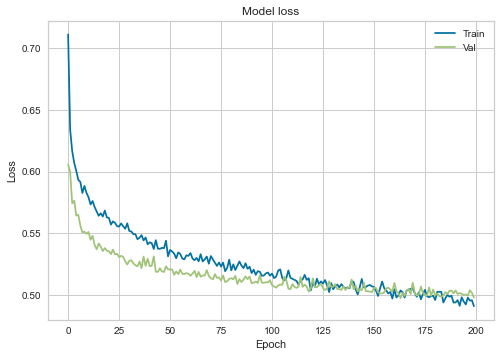

In [285]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


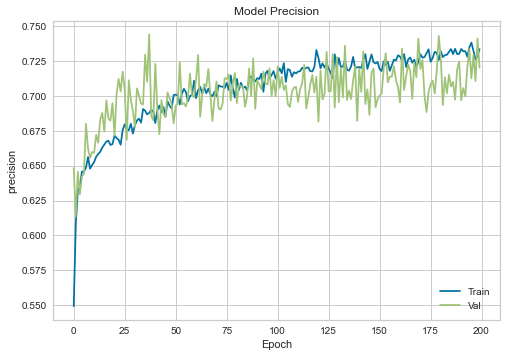

In [286]:

plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [287]:
y_train_pred=NN_70_exp1.predict_classes(train_X_70_nn)

print(round(f1_score(train_y_70_nn,y_train_pred),3))
print(round(precision_score(train_y_70_nn,y_train_pred),3))
print(round(recall_score(train_y_70_nn,y_train_pred),3))

0.786
0.735
0.845


In [288]:
y_test_pred=NN_70_exp1.predict_classes(test_X_70_nn)

print(round(f1_score(test_y_70_nn,y_test_pred),3))
print(round(precision_score(test_y_70_nn,y_test_pred),3))
print(round(recall_score(test_y_70_nn,y_test_pred),3))



0.777
0.728
0.832


In [289]:
#predicting using the NN model on the 80's data 

y_test_80_pred=NN_70_exp1.predict_classes(test_X_80_nn_exp2)

print(round(f1_score(test_y_80_nn_exp2,y_test_80_pred),3))
print(round(precision_score(test_y_80_nn_exp2,y_test_80_pred),3))
print(round(recall_score(test_y_80_nn_exp2,y_test_80_pred),3))


0.796
0.689
0.942


In [290]:
evaluate_model(rf_70_exp1)

Parameters
bootstrap                      True
ccp_alpha                       0.0
class_weight                   None
criterion                      gini
max_depth                      None
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease           0.0
min_impurity_split             None
min_samples_leaf                  1
min_samples_split                 2
min_weight_fraction_leaf        0.0
n_estimators                    100
n_jobs                           -1
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

In [347]:
evaluate_model(xgb_70_exp1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

__The best models of 70s__
- Random FOrest 
- XGboost 

The important features as per the ___Random forest___ are 
- Instrumentalness
- Acousticness
- Speechiness
- Duration_ms

The  important features as per the ___XGB___ are 
- Instrumentalness
- Artist_score
- Time_signature 
- Acousticness


# 80s Decade

In [174]:
clf_80_exp1 = setup(train_80s, target = 'target', session_id=123,test_data=test_80s)

### Logistic Regression - 80s

In [175]:
lr_80_exp1=create_model('lr')

In [176]:
predict_model(lr_80_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.741   0.591  0.545455   -13.968       0.0312      0.102000   
1            0.414   0.842  1.000000    -5.698       0.0483      0.025000   
2            0.546   0.251  0.727273   -14.753       0.0295      0.723000   
3            0.222   0.868  0.000000   -11.571       0.0695      0.000046   
4            0.373   0.884  0.363636    -7.707       0.0421      0.004090   
...            ...     ...       ...       ...          ...           ...   
2068         0.867   0.715  1.000000    -9.155       0.3260      0.125000   
2069         0.792   0.476  0.545455   -11.707       0.0412      0.372000   
2070         0.755   0.438  0.818182   -13.623       0.0330      0.049800   
2071         0.761   0.316  0.181818   -15.728       0.1320      0.667000   
2072         0.421   0.373  0.636364   -12.970       0.0297      0.752000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000396    0.1590    0.933  0.490975     0.101447   
1             0.000002    0.3740    0.392  0.297588     0.096877   
2             0.000000    0.0943    0.271  0.726213     0.104351   
3             0.826000    0.2790    0.435  0.244801     0.101313   
4             0.000000    0.3290    0.280  0.510651     0.104090   
...                ...       ...      ...       ...          ...   
2068          0.000020    0.1000    0.744  0.365803     0.093220   
2069          0.015700    0.0270    0.820  0.335600     0.157628   
2070          0.000003    0.0719    0.766  0.487757     0.077822   
2071          0.948000    0.1090    0.525  0.314557     0.000948   
2072          0.000000    0.1130    0.403  0.422010     0.074401   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.129133  0.125000         0.096     1.0      1   
1               0.75    0.106476  0.125000         0.072     1.0      1   
2               0.75    0.105633  0.097222         0.000     0.0      1   
3               0.75    0.153369  0.069444         0.000     0.0      0   
4               0.75    0.104751  0.138889         0.000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
2068            0.75    0.171978  0.097222         0.000     1.0      0   
2069            0.75    0.077861  0.180556         0.000     0.0      1   
2070            0.75    0.080599  0.125000         0.000     1.0      1   
2071            0.75    0.000000  0.013889         0.000     1.0      0   
2072            0.75    0.081524  0.125000         0.000     0.0      0   

      Label   Score  
0         1  0.7699  
1         1  0.5918  
2         0  0.5031  
3         0  0.9866  
4         1  0.5670  
...     ...     ...  
2068      0  0.6592  
2069      1  0.7625  
2070      1  0.8130  
2071      0  0.9881  
2072      0  0.7006  

[2073 rows x 19 columns]

In [177]:
lr_80_tuned_exp1_l2=tune_model(lr_80_exp1,optimize='Precision')

In [178]:
predict_model(lr_80_tuned_exp1_l2)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.741   0.591  0.545455   -13.968       0.0312      0.102000   
1            0.414   0.842  1.000000    -5.698       0.0483      0.025000   
2            0.546   0.251  0.727273   -14.753       0.0295      0.723000   
3            0.222   0.868  0.000000   -11.571       0.0695      0.000046   
4            0.373   0.884  0.363636    -7.707       0.0421      0.004090   
...            ...     ...       ...       ...          ...           ...   
2068         0.867   0.715  1.000000    -9.155       0.3260      0.125000   
2069         0.792   0.476  0.545455   -11.707       0.0412      0.372000   
2070         0.755   0.438  0.818182   -13.623       0.0330      0.049800   
2071         0.761   0.316  0.181818   -15.728       0.1320      0.667000   
2072         0.421   0.373  0.636364   -12.970       0.0297      0.752000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000396    0.1590    0.933  0.490975     0.101447   
1             0.000002    0.3740    0.392  0.297588     0.096877   
2             0.000000    0.0943    0.271  0.726213     0.104351   
3             0.826000    0.2790    0.435  0.244801     0.101313   
4             0.000000    0.3290    0.280  0.510651     0.104090   
...                ...       ...      ...       ...          ...   
2068          0.000020    0.1000    0.744  0.365803     0.093220   
2069          0.015700    0.0270    0.820  0.335600     0.157628   
2070          0.000003    0.0719    0.766  0.487757     0.077822   
2071          0.948000    0.1090    0.525  0.314557     0.000948   
2072          0.000000    0.1130    0.403  0.422010     0.074401   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.129133  0.125000         0.096     1.0      1   
1               0.75    0.106476  0.125000         0.072     1.0      1   
2               0.75    0.105633  0.097222         0.000     0.0      1   
3               0.75    0.153369  0.069444         0.000     0.0      0   
4               0.75    0.104751  0.138889         0.000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
2068            0.75    0.171978  0.097222         0.000     1.0      0   
2069            0.75    0.077861  0.180556         0.000     0.0      1   
2070            0.75    0.080599  0.125000         0.000     1.0      1   
2071            0.75    0.000000  0.013889         0.000     1.0      0   
2072            0.75    0.081524  0.125000         0.000     0.0      0   

      Label   Score  
0         1  0.8160  
1         1  0.6075  
2         1  0.5823  
3         0  0.9919  
4         1  0.6008  
...     ...     ...  
2068      0  0.9238  
2069      1  0.8001  
2070      1  0.8415  
2071      0  0.9950  
2072      0  0.7109  

[2073 rows x 19 columns]

In [179]:
lr_80_exp1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
lr_80_exp1_l1=create_model('lr',penalty='l1',solver='liblinear')

In [181]:
lr_80_tuned_exp1_l1=tune_model(lr_80_exp1_l1,optimize='Precision')

In [182]:
predict_model(lr_80_tuned_exp1_l1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.741   0.591  0.545455   -13.968       0.0312      0.102000   
1            0.414   0.842  1.000000    -5.698       0.0483      0.025000   
2            0.546   0.251  0.727273   -14.753       0.0295      0.723000   
3            0.222   0.868  0.000000   -11.571       0.0695      0.000046   
4            0.373   0.884  0.363636    -7.707       0.0421      0.004090   
...            ...     ...       ...       ...          ...           ...   
2068         0.867   0.715  1.000000    -9.155       0.3260      0.125000   
2069         0.792   0.476  0.545455   -11.707       0.0412      0.372000   
2070         0.755   0.438  0.818182   -13.623       0.0330      0.049800   
2071         0.761   0.316  0.181818   -15.728       0.1320      0.667000   
2072         0.421   0.373  0.636364   -12.970       0.0297      0.752000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000396    0.1590    0.933  0.490975     0.101447   
1             0.000002    0.3740    0.392  0.297588     0.096877   
2             0.000000    0.0943    0.271  0.726213     0.104351   
3             0.826000    0.2790    0.435  0.244801     0.101313   
4             0.000000    0.3290    0.280  0.510651     0.104090   
...                ...       ...      ...       ...          ...   
2068          0.000020    0.1000    0.744  0.365803     0.093220   
2069          0.015700    0.0270    0.820  0.335600     0.157628   
2070          0.000003    0.0719    0.766  0.487757     0.077822   
2071          0.948000    0.1090    0.525  0.314557     0.000948   
2072          0.000000    0.1130    0.403  0.422010     0.074401   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.129133  0.125000         0.096     1.0      1   
1               0.75    0.106476  0.125000         0.072     1.0      1   
2               0.75    0.105633  0.097222         0.000     0.0      1   
3               0.75    0.153369  0.069444         0.000     0.0      0   
4               0.75    0.104751  0.138889         0.000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
2068            0.75    0.171978  0.097222         0.000     1.0      0   
2069            0.75    0.077861  0.180556         0.000     0.0      1   
2070            0.75    0.080599  0.125000         0.000     1.0      1   
2071            0.75    0.000000  0.013889         0.000     1.0      0   
2072            0.75    0.081524  0.125000         0.000     0.0      0   

      Label   Score  
0         1  0.8040  
1         1  0.6043  
2         1  0.5519  
3         0  0.9911  
4         1  0.5916  
...     ...     ...  
2068      0  0.8754  
2069      1  0.7866  
2070      1  0.8355  
2071      0  0.9937  
2072      0  0.7072  

[2073 rows x 19 columns]

In [183]:
#Predicting the logistic regression models on the data of 90's

temp_90=predict_model(lr_80_exp1,test_90s_exp2)
print("f1_score of logistic regression on 90's data : ",round(f1_score(temp_90['target'],temp_90['Label']),3))
print("precison_score of logistic regression on 90's data : ",round(precision_score(temp_90['target'],temp_90['Label']),3))
print("recall_score of logistic regression on 90's data ",round(recall_score(temp_90['target'],temp_90['Label']),3))
print("\n")
temp_90=predict_model(lr_80_tuned_exp1_l2,test_90s_exp2)
print("f1_score of logistic regression with l2 regularization on 90's data : ",round(f1_score(temp_90['target'],temp_90['Label']),3))
print("precison_score of of logistic regression with l2 regularization on 90's data : ",round(precision_score(temp_90['target'],temp_90['Label']),3))
print("recall_score of of logistic regression with l2 regularization  on 90's data ",round(recall_score(temp_90['target'],temp_90['Label']),3))
print("\n")

temp_90=predict_model(lr_80_tuned_exp1_l1,test_90s_exp2)
print("f1_score of logistic regression with l1 regularization on 90's data : ",round(f1_score(temp_90['target'],temp_90['Label']),3))
print("precison_score of of logistic regression with l1 regularization on 90's data : ",round(precision_score(temp_90['target'],temp_90['Label']),3))
print("recall_score of of logistic regression with l1 regularization  on 90's data ",round(recall_score(temp_90['target'],temp_90['Label']),3))


f1_score of logistic regression on 90's data :  0.788
precison_score of logistic regression on 90's data :  0.746
recall_score of logistic regression on 90's data  0.836


f1_score of logistic regression with l2 regularization on 90's data :  0.768
precison_score of of logistic regression with l2 regularization on 90's data :  0.748
recall_score of of logistic regression with l2 regularization  on 90's data  0.79


f1_score of logistic regression with l1 regularization on 90's data :  0.77
precison_score of of logistic regression with l1 regularization on 90's data :  0.746
recall_score of of logistic regression with l1 regularization  on 90's data  0.794


### SVM 80s

In [184]:
svm_80_exp1=create_model('svm')

In [185]:
predict_model(svm_80_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.741   0.591  0.545455   -13.968       0.0312      0.102000   
1            0.414   0.842  1.000000    -5.698       0.0483      0.025000   
2            0.546   0.251  0.727273   -14.753       0.0295      0.723000   
3            0.222   0.868  0.000000   -11.571       0.0695      0.000046   
4            0.373   0.884  0.363636    -7.707       0.0421      0.004090   
...            ...     ...       ...       ...          ...           ...   
2068         0.867   0.715  1.000000    -9.155       0.3260      0.125000   
2069         0.792   0.476  0.545455   -11.707       0.0412      0.372000   
2070         0.755   0.438  0.818182   -13.623       0.0330      0.049800   
2071         0.761   0.316  0.181818   -15.728       0.1320      0.667000   
2072         0.421   0.373  0.636364   -12.970       0.0297      0.752000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000396    0.1590    0.933  0.490975     0.101447   
1             0.000002    0.3740    0.392  0.297588     0.096877   
2             0.000000    0.0943    0.271  0.726213     0.104351   
3             0.826000    0.2790    0.435  0.244801     0.101313   
4             0.000000    0.3290    0.280  0.510651     0.104090   
...                ...       ...      ...       ...          ...   
2068          0.000020    0.1000    0.744  0.365803     0.093220   
2069          0.015700    0.0270    0.820  0.335600     0.157628   
2070          0.000003    0.0719    0.766  0.487757     0.077822   
2071          0.948000    0.1090    0.525  0.314557     0.000948   
2072          0.000000    0.1130    0.403  0.422010     0.074401   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  Label  
0               0.75    0.129133  0.125000         0.096     1.0      1      1  
1               0.75    0.106476  0.125000         0.072     1.0      1      1  
2               0.75    0.105633  0.097222         0.000     0.0      1      1  
3               0.75    0.153369  0.069444         0.000     0.0      0      0  
4               0.75    0.104751  0.138889         0.000     0.0      1      1  
...              ...         ...       ...           ...     ...    ...    ...  
2068            0.75    0.171978  0.097222         0.000     1.0      0      0  
2069            0.75    0.077861  0.180556         0.000     0.0      1      1  
2070            0.75    0.080599  0.125000         0.000     1.0      1      1  
2071            0.75    0.000000  0.013889         0.000     1.0      0      0  
2072            0.75    0.081524  0.125000         0.000     0.0      0      0  

[2073 rows x 18 columns]

In [186]:
svm_80_tuned_exp1=tune_model(svm_80_exp1,optimize='Precision')

In [187]:
predict_model(svm_80_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.741   0.591  0.545455   -13.968       0.0312      0.102000   
1            0.414   0.842  1.000000    -5.698       0.0483      0.025000   
2            0.546   0.251  0.727273   -14.753       0.0295      0.723000   
3            0.222   0.868  0.000000   -11.571       0.0695      0.000046   
4            0.373   0.884  0.363636    -7.707       0.0421      0.004090   
...            ...     ...       ...       ...          ...           ...   
2068         0.867   0.715  1.000000    -9.155       0.3260      0.125000   
2069         0.792   0.476  0.545455   -11.707       0.0412      0.372000   
2070         0.755   0.438  0.818182   -13.623       0.0330      0.049800   
2071         0.761   0.316  0.181818   -15.728       0.1320      0.667000   
2072         0.421   0.373  0.636364   -12.970       0.0297      0.752000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000396    0.1590    0.933  0.490975     0.101447   
1             0.000002    0.3740    0.392  0.297588     0.096877   
2             0.000000    0.0943    0.271  0.726213     0.104351   
3             0.826000    0.2790    0.435  0.244801     0.101313   
4             0.000000    0.3290    0.280  0.510651     0.104090   
...                ...       ...      ...       ...          ...   
2068          0.000020    0.1000    0.744  0.365803     0.093220   
2069          0.015700    0.0270    0.820  0.335600     0.157628   
2070          0.000003    0.0719    0.766  0.487757     0.077822   
2071          0.948000    0.1090    0.525  0.314557     0.000948   
2072          0.000000    0.1130    0.403  0.422010     0.074401   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  Label  
0               0.75    0.129133  0.125000         0.096     1.0      1      1  
1               0.75    0.106476  0.125000         0.072     1.0      1      1  
2               0.75    0.105633  0.097222         0.000     0.0      1      1  
3               0.75    0.153369  0.069444         0.000     0.0      0      0  
4               0.75    0.104751  0.138889         0.000     0.0      1      1  
...              ...         ...       ...           ...     ...    ...    ...  
2068            0.75    0.171978  0.097222         0.000     1.0      0      0  
2069            0.75    0.077861  0.180556         0.000     0.0      1      1  
2070            0.75    0.080599  0.125000         0.000     1.0      1      1  
2071            0.75    0.000000  0.013889         0.000     1.0      0      0  
2072            0.75    0.081524  0.125000         0.000     0.0      0      1  

[2073 rows x 18 columns]

In [188]:
rbfsvm_80_exp1= create_model('rbfsvm')

In [189]:
predict_model(rbfsvm_80_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.741   0.591  0.545455   -13.968       0.0312      0.102000   
1            0.414   0.842  1.000000    -5.698       0.0483      0.025000   
2            0.546   0.251  0.727273   -14.753       0.0295      0.723000   
3            0.222   0.868  0.000000   -11.571       0.0695      0.000046   
4            0.373   0.884  0.363636    -7.707       0.0421      0.004090   
...            ...     ...       ...       ...          ...           ...   
2068         0.867   0.715  1.000000    -9.155       0.3260      0.125000   
2069         0.792   0.476  0.545455   -11.707       0.0412      0.372000   
2070         0.755   0.438  0.818182   -13.623       0.0330      0.049800   
2071         0.761   0.316  0.181818   -15.728       0.1320      0.667000   
2072         0.421   0.373  0.636364   -12.970       0.0297      0.752000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000396    0.1590    0.933  0.490975     0.101447   
1             0.000002    0.3740    0.392  0.297588     0.096877   
2             0.000000    0.0943    0.271  0.726213     0.104351   
3             0.826000    0.2790    0.435  0.244801     0.101313   
4             0.000000    0.3290    0.280  0.510651     0.104090   
...                ...       ...      ...       ...          ...   
2068          0.000020    0.1000    0.744  0.365803     0.093220   
2069          0.015700    0.0270    0.820  0.335600     0.157628   
2070          0.000003    0.0719    0.766  0.487757     0.077822   
2071          0.948000    0.1090    0.525  0.314557     0.000948   
2072          0.000000    0.1130    0.403  0.422010     0.074401   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.129133  0.125000         0.096     1.0      1   
1               0.75    0.106476  0.125000         0.072     1.0      1   
2               0.75    0.105633  0.097222         0.000     0.0      1   
3               0.75    0.153369  0.069444         0.000     0.0      0   
4               0.75    0.104751  0.138889         0.000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
2068            0.75    0.171978  0.097222         0.000     1.0      0   
2069            0.75    0.077861  0.180556         0.000     0.0      1   
2070            0.75    0.080599  0.125000         0.000     1.0      1   
2071            0.75    0.000000  0.013889         0.000     1.0      0   
2072            0.75    0.081524  0.125000         0.000     0.0      0   

      Label   Score  
0         1  0.7909  
1         1  0.5372  
2         0  0.7056  
3         0  0.9781  
4         1  0.5124  
...     ...     ...  
2068      1  0.6694  
2069      1  0.7868  
2070      1  0.8487  
2071      0  0.9661  
2072      0  0.7490  

[2073 rows x 19 columns]

In [190]:
rbfsvm_80_tuned_exp1=tune_model(rbfsvm_80_exp1,optimize='Precision',)

In [191]:
predict_model(rbfsvm_80_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.741   0.591  0.545455   -13.968       0.0312      0.102000   
1            0.414   0.842  1.000000    -5.698       0.0483      0.025000   
2            0.546   0.251  0.727273   -14.753       0.0295      0.723000   
3            0.222   0.868  0.000000   -11.571       0.0695      0.000046   
4            0.373   0.884  0.363636    -7.707       0.0421      0.004090   
...            ...     ...       ...       ...          ...           ...   
2068         0.867   0.715  1.000000    -9.155       0.3260      0.125000   
2069         0.792   0.476  0.545455   -11.707       0.0412      0.372000   
2070         0.755   0.438  0.818182   -13.623       0.0330      0.049800   
2071         0.761   0.316  0.181818   -15.728       0.1320      0.667000   
2072         0.421   0.373  0.636364   -12.970       0.0297      0.752000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000396    0.1590    0.933  0.490975     0.101447   
1             0.000002    0.3740    0.392  0.297588     0.096877   
2             0.000000    0.0943    0.271  0.726213     0.104351   
3             0.826000    0.2790    0.435  0.244801     0.101313   
4             0.000000    0.3290    0.280  0.510651     0.104090   
...                ...       ...      ...       ...          ...   
2068          0.000020    0.1000    0.744  0.365803     0.093220   
2069          0.015700    0.0270    0.820  0.335600     0.157628   
2070          0.000003    0.0719    0.766  0.487757     0.077822   
2071          0.948000    0.1090    0.525  0.314557     0.000948   
2072          0.000000    0.1130    0.403  0.422010     0.074401   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.129133  0.125000         0.096     1.0      1   
1               0.75    0.106476  0.125000         0.072     1.0      1   
2               0.75    0.105633  0.097222         0.000     0.0      1   
3               0.75    0.153369  0.069444         0.000     0.0      0   
4               0.75    0.104751  0.138889         0.000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
2068            0.75    0.171978  0.097222         0.000     1.0      0   
2069            0.75    0.077861  0.180556         0.000     0.0      1   
2070            0.75    0.080599  0.125000         0.000     1.0      1   
2071            0.75    0.000000  0.013889         0.000     1.0      0   
2072            0.75    0.081524  0.125000         0.000     0.0      0   

      Label   Score  
0         1  0.9290  
1         1  0.5530  
2         1  0.5608  
3         0  0.9943  
4         1  0.4872  
...     ...     ...  
2068      0  0.8841  
2069      1  0.7624  
2070      1  0.9045  
2071      0  0.9763  
2072      0  0.6850  

[2073 rows x 19 columns]

In [192]:
#Predicting the SVM models on the data of 90's

temp_90=predict_model(svm_80_exp1,test_90s_exp2)
print("f1_score of SVM on 90's data : ",round(f1_score(temp_90['target'],temp_90['Label']),3))
print("precison_score of SVM on 90's data : ",round(precision_score(temp_90['target'],temp_90['Label']),3))
print("recall_score of SVM on 90's data ",round(recall_score(temp_90['target'],temp_90['Label']),3))
print("\n")
temp_90=predict_model(svm_80_tuned_exp1,test_90s_exp2)
print("f1_score of tuned SVM  on 90's data : ",round(f1_score(temp_90['target'],temp_90['Label']),3))
print("precison_score of tuned SVM on 90's data : ",round(precision_score(temp_90['target'],temp_90['Label']),3))
print("recall_score of tuned SVM on 90's data ",round(recall_score(temp_90['target'],temp_90['Label']),3))
print("\n")
temp_90=predict_model(rbfsvm_80_exp1,test_90s_exp2)
print("f1_score of RBF SVM on 90's data : ",round(f1_score(temp_90['target'],temp_90['Label']),3))
print("precison_score of RBF SVM on 90's data : ",round(precision_score(temp_90['target'],temp_90['Label']),3))
print("recall_score of RBF SVM on 90's data ",round(recall_score(temp_90['target'],temp_90['Label']),3))
print("\n")
temp_90=predict_model(rbfsvm_80_tuned_exp1,test_90s_exp2)
print("f1_score of RBF SVM on 90's data : ",round(f1_score(temp_90['target'],temp_90['Label']),3))
print("precison_score of RBF SVM on 90's data : ",round(precision_score(temp_90['target'],temp_90['Label']),3))
print("recall_score of RBF SVM on 90's data ",round(recall_score(temp_90['target'],temp_90['Label']),3))


f1_score of SVM on 90's data :  0.78
precison_score of SVM on 90's data :  0.747
recall_score of SVM on 90's data  0.816


f1_score of tuned SVM  on 90's data :  0.736
precison_score of tuned SVM on 90's data :  0.603
recall_score of tuned SVM on 90's data  0.945


f1_score of RBF SVM on 90's data :  0.804
precison_score of RBF SVM on 90's data :  0.721
recall_score of RBF SVM on 90's data  0.909


f1_score of RBF SVM on 90's data :  0.779
precison_score of RBF SVM on 90's data :  0.742
recall_score of RBF SVM on 90's data  0.82


### Random Forest 80s

In [193]:
rf_80_exp1=create_model('rf')

In [194]:
predict_model(rf_80_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.741   0.591  0.545455   -13.968       0.0312      0.102000   
1            0.414   0.842  1.000000    -5.698       0.0483      0.025000   
2            0.546   0.251  0.727273   -14.753       0.0295      0.723000   
3            0.222   0.868  0.000000   -11.571       0.0695      0.000046   
4            0.373   0.884  0.363636    -7.707       0.0421      0.004090   
...            ...     ...       ...       ...          ...           ...   
2068         0.867   0.715  1.000000    -9.155       0.3260      0.125000   
2069         0.792   0.476  0.545455   -11.707       0.0412      0.372000   
2070         0.755   0.438  0.818182   -13.623       0.0330      0.049800   
2071         0.761   0.316  0.181818   -15.728       0.1320      0.667000   
2072         0.421   0.373  0.636364   -12.970       0.0297      0.752000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000396    0.1590    0.933  0.490975     0.101447   
1             0.000002    0.3740    0.392  0.297588     0.096877   
2             0.000000    0.0943    0.271  0.726213     0.104351   
3             0.826000    0.2790    0.435  0.244801     0.101313   
4             0.000000    0.3290    0.280  0.510651     0.104090   
...                ...       ...      ...       ...          ...   
2068          0.000020    0.1000    0.744  0.365803     0.093220   
2069          0.015700    0.0270    0.820  0.335600     0.157628   
2070          0.000003    0.0719    0.766  0.487757     0.077822   
2071          0.948000    0.1090    0.525  0.314557     0.000948   
2072          0.000000    0.1130    0.403  0.422010     0.074401   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.129133  0.125000         0.096     1.0      1   
1               0.75    0.106476  0.125000         0.072     1.0      1   
2               0.75    0.105633  0.097222         0.000     0.0      1   
3               0.75    0.153369  0.069444         0.000     0.0      0   
4               0.75    0.104751  0.138889         0.000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
2068            0.75    0.171978  0.097222         0.000     1.0      0   
2069            0.75    0.077861  0.180556         0.000     0.0      1   
2070            0.75    0.080599  0.125000         0.000     1.0      1   
2071            0.75    0.000000  0.013889         0.000     1.0      0   
2072            0.75    0.081524  0.125000         0.000     0.0      0   

      Label  Score  
0         1   1.00  
1         1   0.87  
2         1   0.82  
3         0   0.95  
4         0   0.65  
...     ...    ...  
2068      0   0.86  
2069      1   0.54  
2070      1   0.76  
2071      0   0.95  
2072      0   0.77  

[2073 rows x 19 columns]

In [195]:
rf_80_tuned_exp1=tune_model(rf_80_exp1,optimize='Precision',n_iter=25)

In [196]:
predict_model(rf_80_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.741   0.591  0.545455   -13.968       0.0312      0.102000   
1            0.414   0.842  1.000000    -5.698       0.0483      0.025000   
2            0.546   0.251  0.727273   -14.753       0.0295      0.723000   
3            0.222   0.868  0.000000   -11.571       0.0695      0.000046   
4            0.373   0.884  0.363636    -7.707       0.0421      0.004090   
...            ...     ...       ...       ...          ...           ...   
2068         0.867   0.715  1.000000    -9.155       0.3260      0.125000   
2069         0.792   0.476  0.545455   -11.707       0.0412      0.372000   
2070         0.755   0.438  0.818182   -13.623       0.0330      0.049800   
2071         0.761   0.316  0.181818   -15.728       0.1320      0.667000   
2072         0.421   0.373  0.636364   -12.970       0.0297      0.752000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000396    0.1590    0.933  0.490975     0.101447   
1             0.000002    0.3740    0.392  0.297588     0.096877   
2             0.000000    0.0943    0.271  0.726213     0.104351   
3             0.826000    0.2790    0.435  0.244801     0.101313   
4             0.000000    0.3290    0.280  0.510651     0.104090   
...                ...       ...      ...       ...          ...   
2068          0.000020    0.1000    0.744  0.365803     0.093220   
2069          0.015700    0.0270    0.820  0.335600     0.157628   
2070          0.000003    0.0719    0.766  0.487757     0.077822   
2071          0.948000    0.1090    0.525  0.314557     0.000948   
2072          0.000000    0.1130    0.403  0.422010     0.074401   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.129133  0.125000         0.096     1.0      1   
1               0.75    0.106476  0.125000         0.072     1.0      1   
2               0.75    0.105633  0.097222         0.000     0.0      1   
3               0.75    0.153369  0.069444         0.000     0.0      0   
4               0.75    0.104751  0.138889         0.000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
2068            0.75    0.171978  0.097222         0.000     1.0      0   
2069            0.75    0.077861  0.180556         0.000     0.0      1   
2070            0.75    0.080599  0.125000         0.000     1.0      1   
2071            0.75    0.000000  0.013889         0.000     1.0      0   
2072            0.75    0.081524  0.125000         0.000     0.0      0   

      Label   Score  
0         1  0.9244  
1         1  0.8106  
2         1  0.6300  
3         0  0.9754  
4         0  0.6021  
...     ...     ...  
2068      0  0.7326  
2069      1  0.6578  
2070      1  0.7270  
2071      0  0.9584  
2072      0  0.7202  

[2073 rows x 19 columns]

In [197]:
#Predicting the Random Forest models on the data of 90's

temp_90=predict_model(rf_80_exp1,test_90s_exp2)
print("f1_score of RF on 90's data : ",round(f1_score(temp_90['target'],temp_90['Label']),3))
print("precison_score of RF on 90's data : ",round(precision_score(temp_90['target'],temp_90['Label']),3))
print("recall_score of RF on 90's data ",round(recall_score(temp_90['target'],temp_90['Label']),3))
print("\n")
temp_90=predict_model(rf_80_tuned_exp1,test_90s_exp2)
print("f1_score of tuned RF  on 90's data : ",round(f1_score(temp_90['target'],temp_90['Label']),3))
print("precison_score of tuned RF on 90's data : ",round(precision_score(temp_90['target'],temp_90['Label']),3))
print("recall_score of tuned RF on 90's data ",round(recall_score(temp_90['target'],temp_90['Label']),3))

f1_score of RF on 90's data :  0.765
precison_score of RF on 90's data :  0.782
recall_score of RF on 90's data  0.748


f1_score of tuned RF  on 90's data :  0.773
precison_score of tuned RF on 90's data :  0.771
recall_score of tuned RF on 90's data  0.775


## XGboost 80s

In [198]:
xgb_80_exp1=create_model('xgboost')

In [199]:
evaluate_model(xgb_80_exp1)

Parameters
objective                binary:logistic
use_label_encoder                   True
base_score                           0.5
booster                           gbtree
colsample_bylevel                      1
colsample_bynode                       1
colsample_bytree                       1
gamma                                  0
gpu_id                                -1
importance_type                     gain
interaction_constraints                 
learning_rate                0.300000012
max_delta_step                         0
max_depth                              6
min_child_weight                       1
missing                              nan
monotone_constraints                  ()
n_estimators                         100
n_jobs                                -1
num_parallel_tree                      1
random_state                         123
reg_alpha                              0
reg_lambda                             1
scale_pos_weight                       1
subsample                              1
tree_method                         auto
validate_parameters                    1
verbosity                              0

In [200]:
predict_model(xgb_80_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.741   0.591  0.545455   -13.968       0.0312      0.102000   
1            0.414   0.842  1.000000    -5.698       0.0483      0.025000   
2            0.546   0.251  0.727273   -14.753       0.0295      0.723000   
3            0.222   0.868  0.000000   -11.571       0.0695      0.000046   
4            0.373   0.884  0.363636    -7.707       0.0421      0.004090   
...            ...     ...       ...       ...          ...           ...   
2068         0.867   0.715  1.000000    -9.155       0.3260      0.125000   
2069         0.792   0.476  0.545455   -11.707       0.0412      0.372000   
2070         0.755   0.438  0.818182   -13.623       0.0330      0.049800   
2071         0.761   0.316  0.181818   -15.728       0.1320      0.667000   
2072         0.421   0.373  0.636364   -12.970       0.0297      0.752000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000396    0.1590    0.933  0.490975     0.101447   
1             0.000002    0.3740    0.392  0.297588     0.096877   
2             0.000000    0.0943    0.271  0.726213     0.104351   
3             0.826000    0.2790    0.435  0.244801     0.101313   
4             0.000000    0.3290    0.280  0.510651     0.104090   
...                ...       ...      ...       ...          ...   
2068          0.000020    0.1000    0.744  0.365803     0.093220   
2069          0.015700    0.0270    0.820  0.335600     0.157628   
2070          0.000003    0.0719    0.766  0.487757     0.077822   
2071          0.948000    0.1090    0.525  0.314557     0.000948   
2072          0.000000    0.1130    0.403  0.422010     0.074401   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.129133  0.125000         0.096     1.0      1   
1               0.75    0.106476  0.125000         0.072     1.0      1   
2               0.75    0.105633  0.097222         0.000     0.0      1   
3               0.75    0.153369  0.069444         0.000     0.0      0   
4               0.75    0.104751  0.138889         0.000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
2068            0.75    0.171978  0.097222         0.000     1.0      0   
2069            0.75    0.077861  0.180556         0.000     0.0      1   
2070            0.75    0.080599  0.125000         0.000     1.0      1   
2071            0.75    0.000000  0.013889         0.000     1.0      0   
2072            0.75    0.081524  0.125000         0.000     0.0      0   

      Label   Score  
0         1  0.9985  
1         1  0.9850  
2         1  0.9686  
3         0  0.9990  
4         1  0.7211  
...     ...     ...  
2068      0  0.9657  
2069      0  0.5956  
2070      1  0.8810  
2071      0  0.9996  
2072      0  0.8251  

[2073 rows x 19 columns]

In [201]:
xgb_80_tuned_exp1=tune_model(xgb_80_exp1,optimize='Precision')

In [ ]:
eva

In [202]:
predict_model(xgb_80_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0            0.741   0.591  0.545455   -13.968       0.0312      0.102000   
1            0.414   0.842  1.000000    -5.698       0.0483      0.025000   
2            0.546   0.251  0.727273   -14.753       0.0295      0.723000   
3            0.222   0.868  0.000000   -11.571       0.0695      0.000046   
4            0.373   0.884  0.363636    -7.707       0.0421      0.004090   
...            ...     ...       ...       ...          ...           ...   
2068         0.867   0.715  1.000000    -9.155       0.3260      0.125000   
2069         0.792   0.476  0.545455   -11.707       0.0412      0.372000   
2070         0.755   0.438  0.818182   -13.623       0.0330      0.049800   
2071         0.761   0.316  0.181818   -15.728       0.1320      0.667000   
2072         0.421   0.373  0.636364   -12.970       0.0297      0.752000   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.000396    0.1590    0.933  0.490975     0.101447   
1             0.000002    0.3740    0.392  0.297588     0.096877   
2             0.000000    0.0943    0.271  0.726213     0.104351   
3             0.826000    0.2790    0.435  0.244801     0.101313   
4             0.000000    0.3290    0.280  0.510651     0.104090   
...                ...       ...      ...       ...          ...   
2068          0.000020    0.1000    0.744  0.365803     0.093220   
2069          0.015700    0.0270    0.820  0.335600     0.157628   
2070          0.000003    0.0719    0.766  0.487757     0.077822   
2071          0.948000    0.1090    0.525  0.314557     0.000948   
2072          0.000000    0.1130    0.403  0.422010     0.074401   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.129133  0.125000         0.096     1.0      1   
1               0.75    0.106476  0.125000         0.072     1.0      1   
2               0.75    0.105633  0.097222         0.000     0.0      1   
3               0.75    0.153369  0.069444         0.000     0.0      0   
4               0.75    0.104751  0.138889         0.000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
2068            0.75    0.171978  0.097222         0.000     1.0      0   
2069            0.75    0.077861  0.180556         0.000     0.0      1   
2070            0.75    0.080599  0.125000         0.000     1.0      1   
2071            0.75    0.000000  0.013889         0.000     1.0      0   
2072            0.75    0.081524  0.125000         0.000     0.0      0   

      Label   Score  
0         1  0.9950  
1         1  0.9475  
2         1  0.9944  
3         0  0.9997  
4         0  0.6456  
...     ...     ...  
2068      0  0.9597  
2069      0  0.6695  
2070      1  0.9920  
2071      0  0.9979  
2072      0  0.6697  

[2073 rows x 19 columns]

In [203]:

temp_90=predict_model(xgb_80_exp1,test_90s_exp2)
print("f1_score of RF on 90's data : ",round(f1_score(temp_90['target'],temp_90['Label']),3))
print("precison_score of RF on 90's data : ",round(precision_score(temp_90['target'],temp_90['Label']),3))
print("recall_score of RF on 90's data ",round(recall_score(temp_90['target'],temp_90['Label']),3))
print("\n")
temp_90=predict_model(xgb_80_tuned_exp1,test_90s_exp2)
print("f1_score of tuned RF  on 90's data : ",round(f1_score(temp_90['target'],temp_90['Label']),3))
print("precison_score of tuned RF on 90's data : ",round(precision_score(temp_90['target'],temp_90['Label']),3))
print("recall_score of tuned RF on 90's data ",round(recall_score(temp_90['target'],temp_90['Label']),3))

f1_score of RF on 90's data :  0.763
precison_score of RF on 90's data :  0.774
recall_score of RF on 90's data  0.752


f1_score of tuned RF  on 90's data :  0.773
precison_score of tuned RF on 90's data :  0.766
recall_score of tuned RF on 90's data  0.781


## Neural networks -80s

In [291]:

tf.random.set_seed(1234)

In [292]:
NN_80_exp1 = Sequential(
    [
        Dense(32, activation='relu', input_shape=(16,), kernel_initializer='he_uniform'), 
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid'),
    ]
)

In [293]:
NN_80_exp1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [294]:
#nitializing earlystopping callback and training the model
#from keras import callbacks 
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
#                                        mode ="min", patience = 7,  
#                                        restore_best_weights = True) 

In [295]:
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_80_exp1.compile(optimizer=opt,loss='binary_crossentropy',metrics=['Precision'])

hist = NN_80_exp1.fit(train_X_80_nn, train_y_80_nn, epochs=250,validation_split=0.3)

Epoch 1/250
106/106 [==============================] - 2s 9ms/step - loss: 0.8016 - precision: 0.5185 - val_loss: 0.6221 - val_precision: 0.6615
Epoch 2/250
106/106 [==============================] - 0s 2ms/step - loss: 0.6369 - precision: 0.6088 - val_loss: 0.5964 - val_precision: 0.6489
Epoch 3/250
106/106 [==============================] - 0s 2ms/step - loss: 0.6060 - precision: 0.6327 - val_loss: 0.5861 - val_precision: 0.6166
Epoch 4/250
106/106 [==============================] - 0s 2ms/step - loss: 0.6019 - precision: 0.6465 - val_loss: 0.6137 - val_precision: 0.5895
Epoch 5/250
106/106 [==============================] - 0s 2ms/step - loss: 0.5996 - precision: 0.6452 - val_loss: 0.5559 - val_precision: 0.6725
Epoch 6/250
106/106 [==============================] - 0s 2ms/step - loss: 0.5683 - precision: 0.6760 - val_loss: 0.5479 - val_precision: 0.6655
Epoch 7/250
106/106 [==============================] - 0s 3ms/step - loss: 0.5693 - precision: 0.6924 - val_loss: 0.5419 - val_pre

106/106 [==============================] - 0s 2ms/step - loss: 0.4370 - precision: 0.7570 - val_loss: 0.4418 - val_precision: 0.7570
Epoch 114/250
106/106 [==============================] - 0s 2ms/step - loss: 0.4410 - precision: 0.7585 - val_loss: 0.4467 - val_precision: 0.7541
Epoch 115/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4395 - precision: 0.7702 - val_loss: 0.4470 - val_precision: 0.7353
Epoch 116/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4544 - precision: 0.7490 - val_loss: 0.4432 - val_precision: 0.7672
Epoch 117/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4457 - precision: 0.7749 - val_loss: 0.4480 - val_precision: 0.7386
Epoch 118/250
106/106 [==============================] - 0s 2ms/step - loss: 0.4295 - precision: 0.7678 - val_loss: 0.4418 - val_precision: 0.7599
Epoch 119/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4378 - precision: 0.7677 - val_loss: 0.4435 - val_pre

Epoch 169/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4251 - precision: 0.7713 - val_loss: 0.4402 - val_precision: 0.7519
Epoch 170/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4329 - precision: 0.7493 - val_loss: 0.4328 - val_precision: 0.7535
Epoch 171/250
106/106 [==============================] - 0s 2ms/step - loss: 0.4464 - precision: 0.7680 - val_loss: 0.4357 - val_precision: 0.7798
Epoch 172/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4327 - precision: 0.7800 - val_loss: 0.4342 - val_precision: 0.7619
Epoch 173/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4301 - precision: 0.7751 - val_loss: 0.4373 - val_precision: 0.7448
Epoch 174/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4316 - precision: 0.7788 - val_loss: 0.4422 - val_precision: 0.7364
Epoch 175/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4263 - precision: 0.7731 - val_loss: 0.

Epoch 225/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4024 - precision: 0.7912 - val_loss: 0.4421 - val_precision: 0.7245
Epoch 226/250
106/106 [==============================] - 0s 4ms/step - loss: 0.4056 - precision: 0.7802 - val_loss: 0.4287 - val_precision: 0.7503
Epoch 227/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4038 - precision: 0.7941 - val_loss: 0.4377 - val_precision: 0.7389
Epoch 228/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4259 - precision: 0.7720 - val_loss: 0.4325 - val_precision: 0.7682
Epoch 229/250
106/106 [==============================] - 0s 2ms/step - loss: 0.4238 - precision: 0.7784 - val_loss: 0.4293 - val_precision: 0.7556
Epoch 230/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4107 - precision: 0.7829 - val_loss: 0.4313 - val_precision: 0.7646
Epoch 231/250
106/106 [==============================] - 0s 3ms/step - loss: 0.4060 - precision: 0.7948 - val_loss: 0.

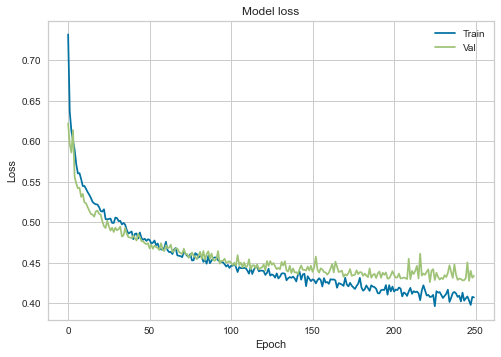

In [296]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


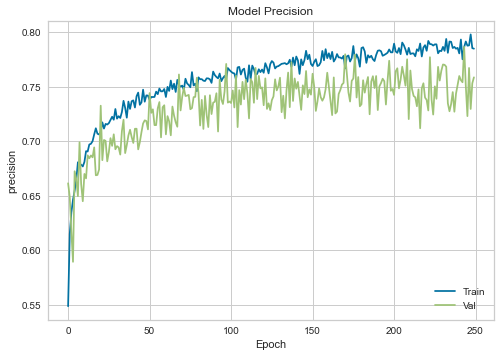

In [297]:

plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [298]:
y_train_pred=NN_80_exp1.predict_classes(train_X_80_nn)

print(round(f1_score(train_y_80_nn,y_train_pred),3))
print(round(precision_score(train_y_80_nn,y_train_pred),3))
print(round(recall_score(train_y_80_nn,y_train_pred),3))

0.831
0.791
0.876


In [299]:
y_test_pred=NN_80_exp1.predict_classes(test_X_80_nn)

print(round(f1_score(test_y_80_nn,y_test_pred),3))
print(round(precision_score(test_y_80_nn,y_test_pred),3))
print(round(recall_score(test_y_80_nn,y_test_pred),3))



0.83
0.797
0.867


In [300]:
#predicting using the NN model on the 90's data 

y_test_90_pred=NN_80_exp1.predict_classes(test_X_90_nn_exp2)

print(round(f1_score(test_y_90_nn_exp2,y_test_90_pred),3))
print(round(precision_score(test_y_90_nn_exp2,y_test_90_pred),3))
print(round(recall_score(test_y_90_nn_exp2,y_test_90_pred),3))


0.792
0.765
0.82


In [263]:
evaluate_model(rf_80_exp1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [264]:
evaluate_model(xgb_80_exp1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

__The best models in 80s__
- Random Forest 
- XGB 

The Important Features as per ___Random forest___ are 
- Instrumentalness
- Acousticness 
- Duration_ms
- Danceability

The Important Features as per ___XGboost___ are

- Instrumentalness
- Artist_score
- Duration_ms
- Acousticness



## 90s Decade 

In [205]:
clf_90_exp1 = setup(train_90s, target = 'target', session_id=123,test_data=test_90s)

In [206]:
lr_90_exp1=create_model('lr')

In [207]:
predict_model(lr_90_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0           0.6600   0.794  0.909091 -11.203000       0.0334       0.10600   
1           0.5250   0.683  0.363636  -9.783000       0.0577       0.06400   
2           0.6350   0.579  0.363636  -8.292000       0.0422       0.25600   
3           0.3170   0.630  0.181818 -10.373000       0.0753       0.02950   
4           0.6800   0.920  0.636364  -4.564000       0.0352       0.04010   
...            ...     ...       ...        ...          ...           ...   
1651        0.6720   0.616  0.000000  -5.764000       0.0258       0.37900   
1652        0.2140   0.867  0.000000  -6.317000       0.0831       0.00256   
1653        0.0828   0.012  0.818182 -36.044998       0.0451       0.90000   
1654        0.7700   0.596  0.636364 -12.194000       0.0527       0.01220   
1655        0.8990   0.525  1.000000 -11.498000       0.1410       0.02300   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.004450    0.0974   0.8350  0.455362     0.201181   
1             0.000680    0.3230   0.1970  0.472624     0.160188   
2             0.000000    0.0820   0.7840  0.450723     0.089826   
3             0.000002    0.3110   0.5560  0.399903     0.088932   
4             0.000000    0.2350   0.9300  0.384518     0.118703   
...                ...       ...      ...       ...          ...   
1651          0.000027    0.0887   0.5660  0.284347     0.138065   
1652          0.166000    0.2470   0.5060  0.632564     0.135573   
1653          0.812000    0.0875   0.0578  0.766224     0.042497   
1654          0.003110    0.0483   0.9300  0.408302     0.151724   
1655          0.688000    0.1080   0.6960  0.351661     0.134726   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.246127  0.191176      0.016393     0.0      1   
1               0.75    0.272257  0.147059      0.000000     1.0      0   
2               0.75    0.105122  0.161765      0.000000     0.0      0   
3               0.75    0.167279  0.073529      0.000000     1.0      0   
4               0.75    0.237054  0.117647      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1651            0.75    0.138430  0.117647      0.000000     0.0      1   
1652            0.75    0.114333  0.176471      0.000000     0.0      0   
1653            0.50    0.177548  0.058824      0.000000     1.0      0   
1654            0.75    0.113252  0.147059      0.008197     0.0      1   
1655            0.75    0.141936  0.117647      0.000000     0.0      1   

      Label   Score  
0         1  0.7289  
1         1  0.6892  
2         1  0.6906  
3         0  0.7986  
4         1  0.8009  
...     ...     ...  
1651      1  0.7851  
1652      0  0.8363  
1653      0  1.0000  
1654      1  0.8459  
1655      1  0.5783  

[1656 rows x 19 columns]

In [208]:
lr_90_tuned_exp1_l2=tune_model(lr_90_exp1,optimize='Precision')

In [209]:
predict_model(lr_90_tuned_exp1_l2)

danceability  energy       key   loudness  speechiness  acousticness  \
0           0.6600   0.794  0.909091 -11.203000       0.0334       0.10600   
1           0.5250   0.683  0.363636  -9.783000       0.0577       0.06400   
2           0.6350   0.579  0.363636  -8.292000       0.0422       0.25600   
3           0.3170   0.630  0.181818 -10.373000       0.0753       0.02950   
4           0.6800   0.920  0.636364  -4.564000       0.0352       0.04010   
...            ...     ...       ...        ...          ...           ...   
1651        0.6720   0.616  0.000000  -5.764000       0.0258       0.37900   
1652        0.2140   0.867  0.000000  -6.317000       0.0831       0.00256   
1653        0.0828   0.012  0.818182 -36.044998       0.0451       0.90000   
1654        0.7700   0.596  0.636364 -12.194000       0.0527       0.01220   
1655        0.8990   0.525  1.000000 -11.498000       0.1410       0.02300   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.004450    0.0974   0.8350  0.455362     0.201181   
1             0.000680    0.3230   0.1970  0.472624     0.160188   
2             0.000000    0.0820   0.7840  0.450723     0.089826   
3             0.000002    0.3110   0.5560  0.399903     0.088932   
4             0.000000    0.2350   0.9300  0.384518     0.118703   
...                ...       ...      ...       ...          ...   
1651          0.000027    0.0887   0.5660  0.284347     0.138065   
1652          0.166000    0.2470   0.5060  0.632564     0.135573   
1653          0.812000    0.0875   0.0578  0.766224     0.042497   
1654          0.003110    0.0483   0.9300  0.408302     0.151724   
1655          0.688000    0.1080   0.6960  0.351661     0.134726   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.246127  0.191176      0.016393     0.0      1   
1               0.75    0.272257  0.147059      0.000000     1.0      0   
2               0.75    0.105122  0.161765      0.000000     0.0      0   
3               0.75    0.167279  0.073529      0.000000     1.0      0   
4               0.75    0.237054  0.117647      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1651            0.75    0.138430  0.117647      0.000000     0.0      1   
1652            0.75    0.114333  0.176471      0.000000     0.0      0   
1653            0.50    0.177548  0.058824      0.000000     1.0      0   
1654            0.75    0.113252  0.147059      0.008197     0.0      1   
1655            0.75    0.141936  0.117647      0.000000     0.0      1   

      Label   Score  
0         1  0.7708  
1         1  0.7110  
2         1  0.6453  
3         0  0.8407  
4         1  0.8095  
...     ...     ...  
1651      1  0.8275  
1652      0  0.8838  
1653      0  1.0000  
1654      1  0.8806  
1655      1  0.5972  

[1656 rows x 19 columns]

In [210]:
lr_90_exp1_l1=create_model('lr',penalty='l1',solver='liblinear')

In [212]:
lr_90_tuned_exp1_l1=tune_model(lr_90_exp1_l1,optimize='Precision')

In [213]:
predict_model(lr_90_tuned_exp1_l1)

danceability  energy       key   loudness  speechiness  acousticness  \
0           0.6600   0.794  0.909091 -11.203000       0.0334       0.10600   
1           0.5250   0.683  0.363636  -9.783000       0.0577       0.06400   
2           0.6350   0.579  0.363636  -8.292000       0.0422       0.25600   
3           0.3170   0.630  0.181818 -10.373000       0.0753       0.02950   
4           0.6800   0.920  0.636364  -4.564000       0.0352       0.04010   
...            ...     ...       ...        ...          ...           ...   
1651        0.6720   0.616  0.000000  -5.764000       0.0258       0.37900   
1652        0.2140   0.867  0.000000  -6.317000       0.0831       0.00256   
1653        0.0828   0.012  0.818182 -36.044998       0.0451       0.90000   
1654        0.7700   0.596  0.636364 -12.194000       0.0527       0.01220   
1655        0.8990   0.525  1.000000 -11.498000       0.1410       0.02300   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.004450    0.0974   0.8350  0.455362     0.201181   
1             0.000680    0.3230   0.1970  0.472624     0.160188   
2             0.000000    0.0820   0.7840  0.450723     0.089826   
3             0.000002    0.3110   0.5560  0.399903     0.088932   
4             0.000000    0.2350   0.9300  0.384518     0.118703   
...                ...       ...      ...       ...          ...   
1651          0.000027    0.0887   0.5660  0.284347     0.138065   
1652          0.166000    0.2470   0.5060  0.632564     0.135573   
1653          0.812000    0.0875   0.0578  0.766224     0.042497   
1654          0.003110    0.0483   0.9300  0.408302     0.151724   
1655          0.688000    0.1080   0.6960  0.351661     0.134726   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.246127  0.191176      0.016393     0.0      1   
1               0.75    0.272257  0.147059      0.000000     1.0      0   
2               0.75    0.105122  0.161765      0.000000     0.0      0   
3               0.75    0.167279  0.073529      0.000000     1.0      0   
4               0.75    0.237054  0.117647      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1651            0.75    0.138430  0.117647      0.000000     0.0      1   
1652            0.75    0.114333  0.176471      0.000000     0.0      0   
1653            0.50    0.177548  0.058824      0.000000     1.0      0   
1654            0.75    0.113252  0.147059      0.008197     0.0      1   
1655            0.75    0.141936  0.117647      0.000000     0.0      1   

      Label   Score  
0         1  0.7602  
1         1  0.7070  
2         1  0.6708  
3         0  0.8375  
4         1  0.8082  
...     ...     ...  
1651      1  0.8117  
1652      0  0.8714  
1653      0  1.0000  
1654      1  0.8698  
1655      1  0.5892  

[1656 rows x 19 columns]

In [214]:

#predicting the logistic models for the test data of 90's
temp_00=predict_model(lr_90_exp1,test_00s_exp2)
print("f1_score of logistic regression on 00's data : ",round(f1_score(temp_00['target'],temp_00['Label']),3))
print("precison_score of logistic regression on 00's data : ",round(precision_score(temp_00['target'],temp_00['Label']),3))
print("recall_score of logistic regression on 00's data ",round(recall_score(temp_00['target'],temp_00['Label']),3))
print("\n")
temp_00=predict_model(lr_90_tuned_exp1_l2,test_00s_exp2)
print("f1_score of logistic regression with l2 regularization on 00's data : ",round(f1_score(temp_00['target'],temp_00['Label']),3))
print("precison_score of of logistic regression with l2 regularization on 00's data : ",round(precision_score(temp_00['target'],temp_00['Label']),3))
print("recall_score of of logistic regression with l2 regularization  on 00's data ",round(recall_score(temp_00['target'],temp_00['Label']),3))
print("\n")

temp_00=predict_model(lr_90_tuned_exp1_l1,test_00s_exp2)
print("f1_score of logistic regression with l1 regularization on 00's data : ",round(f1_score(temp_00['target'],temp_00['Label']),3))
print("precison_score of of logistic regression with l1 regularization on 00's data : ",round(precision_score(temp_00['target'],temp_00['Label']),3))
print("recall_score of of logistic regression with l1 regularization  on 00's data ",round(recall_score(temp_00['target'],temp_00['Label']),3))


f1_score of logistic regression on 00's data :  0.801
precison_score of logistic regression on 00's data :  0.712
recall_score of logistic regression on 00's data  0.916


f1_score of logistic regression with l2 regularization on 00's data :  0.8
precison_score of of logistic regression with l2 regularization on 00's data :  0.717
recall_score of of logistic regression with l2 regularization  on 00's data  0.906


f1_score of logistic regression with l1 regularization on 00's data :  0.801
precison_score of of logistic regression with l1 regularization on 00's data :  0.716
recall_score of of logistic regression with l1 regularization  on 00's data  0.909


### SVM -90s

In [215]:
svm_90_exp1= create_model('svm')

In [216]:
predict_model(svm_90_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0           0.6600   0.794  0.909091 -11.203000       0.0334       0.10600   
1           0.5250   0.683  0.363636  -9.783000       0.0577       0.06400   
2           0.6350   0.579  0.363636  -8.292000       0.0422       0.25600   
3           0.3170   0.630  0.181818 -10.373000       0.0753       0.02950   
4           0.6800   0.920  0.636364  -4.564000       0.0352       0.04010   
...            ...     ...       ...        ...          ...           ...   
1651        0.6720   0.616  0.000000  -5.764000       0.0258       0.37900   
1652        0.2140   0.867  0.000000  -6.317000       0.0831       0.00256   
1653        0.0828   0.012  0.818182 -36.044998       0.0451       0.90000   
1654        0.7700   0.596  0.636364 -12.194000       0.0527       0.01220   
1655        0.8990   0.525  1.000000 -11.498000       0.1410       0.02300   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.004450    0.0974   0.8350  0.455362     0.201181   
1             0.000680    0.3230   0.1970  0.472624     0.160188   
2             0.000000    0.0820   0.7840  0.450723     0.089826   
3             0.000002    0.3110   0.5560  0.399903     0.088932   
4             0.000000    0.2350   0.9300  0.384518     0.118703   
...                ...       ...      ...       ...          ...   
1651          0.000027    0.0887   0.5660  0.284347     0.138065   
1652          0.166000    0.2470   0.5060  0.632564     0.135573   
1653          0.812000    0.0875   0.0578  0.766224     0.042497   
1654          0.003110    0.0483   0.9300  0.408302     0.151724   
1655          0.688000    0.1080   0.6960  0.351661     0.134726   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  Label  
0               0.75    0.246127  0.191176      0.016393     0.0      1      1  
1               0.75    0.272257  0.147059      0.000000     1.0      0      1  
2               0.75    0.105122  0.161765      0.000000     0.0      0      1  
3               0.75    0.167279  0.073529      0.000000     1.0      0      0  
4               0.75    0.237054  0.117647      0.000000     0.0      0      1  
...              ...         ...       ...           ...     ...    ...    ...  
1651            0.75    0.138430  0.117647      0.000000     0.0      1      1  
1652            0.75    0.114333  0.176471      0.000000     0.0      0      0  
1653            0.50    0.177548  0.058824      0.000000     1.0      0      0  
1654            0.75    0.113252  0.147059      0.008197     0.0      1      1  
1655            0.75    0.141936  0.117647      0.000000     0.0      1      1  

[1656 rows x 18 columns]

In [217]:
svm_90_tuned_exp1=tune_model(svm_90_exp1,optimize='Precision')

In [218]:
predict_model(svm_90_tuned_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0           0.6600   0.794  0.909091 -11.203000       0.0334       0.10600   
1           0.5250   0.683  0.363636  -9.783000       0.0577       0.06400   
2           0.6350   0.579  0.363636  -8.292000       0.0422       0.25600   
3           0.3170   0.630  0.181818 -10.373000       0.0753       0.02950   
4           0.6800   0.920  0.636364  -4.564000       0.0352       0.04010   
...            ...     ...       ...        ...          ...           ...   
1651        0.6720   0.616  0.000000  -5.764000       0.0258       0.37900   
1652        0.2140   0.867  0.000000  -6.317000       0.0831       0.00256   
1653        0.0828   0.012  0.818182 -36.044998       0.0451       0.90000   
1654        0.7700   0.596  0.636364 -12.194000       0.0527       0.01220   
1655        0.8990   0.525  1.000000 -11.498000       0.1410       0.02300   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.004450    0.0974   0.8350  0.455362     0.201181   
1             0.000680    0.3230   0.1970  0.472624     0.160188   
2             0.000000    0.0820   0.7840  0.450723     0.089826   
3             0.000002    0.3110   0.5560  0.399903     0.088932   
4             0.000000    0.2350   0.9300  0.384518     0.118703   
...                ...       ...      ...       ...          ...   
1651          0.000027    0.0887   0.5660  0.284347     0.138065   
1652          0.166000    0.2470   0.5060  0.632564     0.135573   
1653          0.812000    0.0875   0.0578  0.766224     0.042497   
1654          0.003110    0.0483   0.9300  0.408302     0.151724   
1655          0.688000    0.1080   0.6960  0.351661     0.134726   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  Label  
0               0.75    0.246127  0.191176      0.016393     0.0      1      1  
1               0.75    0.272257  0.147059      0.000000     1.0      0      1  
2               0.75    0.105122  0.161765      0.000000     0.0      0      1  
3               0.75    0.167279  0.073529      0.000000     1.0      0      0  
4               0.75    0.237054  0.117647      0.000000     0.0      0      1  
...              ...         ...       ...           ...     ...    ...    ...  
1651            0.75    0.138430  0.117647      0.000000     0.0      1      1  
1652            0.75    0.114333  0.176471      0.000000     0.0      0      0  
1653            0.50    0.177548  0.058824      0.000000     1.0      0      0  
1654            0.75    0.113252  0.147059      0.008197     0.0      1      1  
1655            0.75    0.141936  0.117647      0.000000     0.0      1      0  

[1656 rows x 18 columns]

In [219]:
rbfsvm_90_exp1=create_model('rbfsvm')

In [220]:
predict_model(rbfsvm_90_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0           0.6600   0.794  0.909091 -11.203000       0.0334       0.10600   
1           0.5250   0.683  0.363636  -9.783000       0.0577       0.06400   
2           0.6350   0.579  0.363636  -8.292000       0.0422       0.25600   
3           0.3170   0.630  0.181818 -10.373000       0.0753       0.02950   
4           0.6800   0.920  0.636364  -4.564000       0.0352       0.04010   
...            ...     ...       ...        ...          ...           ...   
1651        0.6720   0.616  0.000000  -5.764000       0.0258       0.37900   
1652        0.2140   0.867  0.000000  -6.317000       0.0831       0.00256   
1653        0.0828   0.012  0.818182 -36.044998       0.0451       0.90000   
1654        0.7700   0.596  0.636364 -12.194000       0.0527       0.01220   
1655        0.8990   0.525  1.000000 -11.498000       0.1410       0.02300   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.004450    0.0974   0.8350  0.455362     0.201181   
1             0.000680    0.3230   0.1970  0.472624     0.160188   
2             0.000000    0.0820   0.7840  0.450723     0.089826   
3             0.000002    0.3110   0.5560  0.399903     0.088932   
4             0.000000    0.2350   0.9300  0.384518     0.118703   
...                ...       ...      ...       ...          ...   
1651          0.000027    0.0887   0.5660  0.284347     0.138065   
1652          0.166000    0.2470   0.5060  0.632564     0.135573   
1653          0.812000    0.0875   0.0578  0.766224     0.042497   
1654          0.003110    0.0483   0.9300  0.408302     0.151724   
1655          0.688000    0.1080   0.6960  0.351661     0.134726   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.246127  0.191176      0.016393     0.0      1   
1               0.75    0.272257  0.147059      0.000000     1.0      0   
2               0.75    0.105122  0.161765      0.000000     0.0      0   
3               0.75    0.167279  0.073529      0.000000     1.0      0   
4               0.75    0.237054  0.117647      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1651            0.75    0.138430  0.117647      0.000000     0.0      1   
1652            0.75    0.114333  0.176471      0.000000     0.0      0   
1653            0.50    0.177548  0.058824      0.000000     1.0      0   
1654            0.75    0.113252  0.147059      0.008197     0.0      1   
1655            0.75    0.141936  0.117647      0.000000     0.0      1   

      Label   Score  
0         1  0.7603  
1         1  0.7862  
2         1  0.8055  
3         0  0.6148  
4         1  0.7885  
...     ...     ...  
1651      1  0.8039  
1652      0  0.9075  
1653      0  0.9101  
1654      1  0.8327  
1655      0  0.6672  

[1656 rows x 19 columns]

In [221]:
rbfsvm_90_tuned_exp1=tune_model(rbfsvm_90_exp1,optimize='Precision')

In [222]:
predict_model(rbfsvm_90_tuned_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0           0.6600   0.794  0.909091 -11.203000       0.0334       0.10600   
1           0.5250   0.683  0.363636  -9.783000       0.0577       0.06400   
2           0.6350   0.579  0.363636  -8.292000       0.0422       0.25600   
3           0.3170   0.630  0.181818 -10.373000       0.0753       0.02950   
4           0.6800   0.920  0.636364  -4.564000       0.0352       0.04010   
...            ...     ...       ...        ...          ...           ...   
1651        0.6720   0.616  0.000000  -5.764000       0.0258       0.37900   
1652        0.2140   0.867  0.000000  -6.317000       0.0831       0.00256   
1653        0.0828   0.012  0.818182 -36.044998       0.0451       0.90000   
1654        0.7700   0.596  0.636364 -12.194000       0.0527       0.01220   
1655        0.8990   0.525  1.000000 -11.498000       0.1410       0.02300   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.004450    0.0974   0.8350  0.455362     0.201181   
1             0.000680    0.3230   0.1970  0.472624     0.160188   
2             0.000000    0.0820   0.7840  0.450723     0.089826   
3             0.000002    0.3110   0.5560  0.399903     0.088932   
4             0.000000    0.2350   0.9300  0.384518     0.118703   
...                ...       ...      ...       ...          ...   
1651          0.000027    0.0887   0.5660  0.284347     0.138065   
1652          0.166000    0.2470   0.5060  0.632564     0.135573   
1653          0.812000    0.0875   0.0578  0.766224     0.042497   
1654          0.003110    0.0483   0.9300  0.408302     0.151724   
1655          0.688000    0.1080   0.6960  0.351661     0.134726   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.246127  0.191176      0.016393     0.0      1   
1               0.75    0.272257  0.147059      0.000000     1.0      0   
2               0.75    0.105122  0.161765      0.000000     0.0      0   
3               0.75    0.167279  0.073529      0.000000     1.0      0   
4               0.75    0.237054  0.117647      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1651            0.75    0.138430  0.117647      0.000000     0.0      1   
1652            0.75    0.114333  0.176471      0.000000     0.0      0   
1653            0.50    0.177548  0.058824      0.000000     1.0      0   
1654            0.75    0.113252  0.147059      0.008197     0.0      1   
1655            0.75    0.141936  0.117647      0.000000     0.0      1   

      Label   Score  
0         1  0.8873  
1         1  0.6697  
2         1  0.5955  
3         0  0.8680  
4         1  0.7574  
...     ...     ...  
1651      1  0.8129  
1652      0  0.9229  
1653      0  1.0000  
1654      1  0.8754  
1655      1  0.5263  

[1656 rows x 19 columns]

In [223]:
#predicting the SVM for the test data of 90's
temp_00=predict_model(svm_90_exp1,test_00s_exp2)
print("f1_score of SVM on 00's data : ",round(f1_score(temp_00['target'],temp_00['Label']),3))
print("precison_score of SVM on 00's data : ",round(precision_score(temp_00['target'],temp_00['Label']),3))
print("recall_score of SVM on 00's data ",round(recall_score(temp_00['target'],temp_00['Label']),3))
print("\n")
temp_00=predict_model(svm_90_tuned_exp1,test_00s_exp2)
print("f1_score of tuned SVM on 00's data : ",round(f1_score(temp_00['target'],temp_00['Label']),3))
print("precison_score of  tuned SVM on 00's data : ",round(precision_score(temp_00['target'],temp_00['Label']),3))
print("recall_score of  tuned SVM  on 00's data ",round(recall_score(temp_00['target'],temp_00['Label']),3))
print("\n")

temp_00=predict_model(rbfsvm_90_exp1,test_00s_exp2)
print("f1_score of RBF SVM on 00's data : ",round(f1_score(temp_00['target'],temp_00['Label']),3))
print("precison_score of  RBF SVM on 00's data : ",round(precision_score(temp_00['target'],temp_00['Label']),3))
print("recall_score of  RBF SVM  on 00's data ",round(recall_score(temp_00['target'],temp_00['Label']),3))

print("\n")

temp_00=predict_model(rbfsvm_90_tuned_exp1,test_00s_exp2)
print("f1_score of tuned RBF SVM on 00's data : ",round(f1_score(temp_00['target'],temp_00['Label']),3))
print("precison_score of tuned RBF SVM on 00's data : ",round(precision_score(temp_00['target'],temp_00['Label']),3))
print("recall_score of tuned RBF SVM  on 00's data ",round(recall_score(temp_00['target'],temp_00['Label']),3))


f1_score of SVM on 00's data :  0.798
precison_score of SVM on 00's data :  0.706
recall_score of SVM on 00's data  0.918


f1_score of tuned SVM on 00's data :  0.79
precison_score of  tuned SVM on 00's data :  0.735
recall_score of  tuned SVM  on 00's data  0.854


f1_score of RBF SVM on 00's data :  0.796
precison_score of  RBF SVM on 00's data :  0.7
recall_score of  RBF SVM  on 00's data  0.924


f1_score of tuned RBF SVM on 00's data :  0.798
precison_score of tuned RBF SVM on 00's data :  0.73
recall_score of tuned RBF SVM  on 00's data  0.879


### Random FOrest - 90s

In [224]:
rf_90_exp1= create_model('rf')

In [225]:
predict_model(rf_90_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0           0.6600   0.794  0.909091 -11.203000       0.0334       0.10600   
1           0.5250   0.683  0.363636  -9.783000       0.0577       0.06400   
2           0.6350   0.579  0.363636  -8.292000       0.0422       0.25600   
3           0.3170   0.630  0.181818 -10.373000       0.0753       0.02950   
4           0.6800   0.920  0.636364  -4.564000       0.0352       0.04010   
...            ...     ...       ...        ...          ...           ...   
1651        0.6720   0.616  0.000000  -5.764000       0.0258       0.37900   
1652        0.2140   0.867  0.000000  -6.317000       0.0831       0.00256   
1653        0.0828   0.012  0.818182 -36.044998       0.0451       0.90000   
1654        0.7700   0.596  0.636364 -12.194000       0.0527       0.01220   
1655        0.8990   0.525  1.000000 -11.498000       0.1410       0.02300   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.004450    0.0974   0.8350  0.455362     0.201181   
1             0.000680    0.3230   0.1970  0.472624     0.160188   
2             0.000000    0.0820   0.7840  0.450723     0.089826   
3             0.000002    0.3110   0.5560  0.399903     0.088932   
4             0.000000    0.2350   0.9300  0.384518     0.118703   
...                ...       ...      ...       ...          ...   
1651          0.000027    0.0887   0.5660  0.284347     0.138065   
1652          0.166000    0.2470   0.5060  0.632564     0.135573   
1653          0.812000    0.0875   0.0578  0.766224     0.042497   
1654          0.003110    0.0483   0.9300  0.408302     0.151724   
1655          0.688000    0.1080   0.6960  0.351661     0.134726   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.246127  0.191176      0.016393     0.0      1   
1               0.75    0.272257  0.147059      0.000000     1.0      0   
2               0.75    0.105122  0.161765      0.000000     0.0      0   
3               0.75    0.167279  0.073529      0.000000     1.0      0   
4               0.75    0.237054  0.117647      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1651            0.75    0.138430  0.117647      0.000000     0.0      1   
1652            0.75    0.114333  0.176471      0.000000     0.0      0   
1653            0.50    0.177548  0.058824      0.000000     1.0      0   
1654            0.75    0.113252  0.147059      0.008197     0.0      1   
1655            0.75    0.141936  0.117647      0.000000     0.0      1   

      Label  Score  
0         1   0.80  
1         1   0.65  
2         0   0.55  
3         0   0.94  
4         1   0.88  
...     ...    ...  
1651      1   0.92  
1652      0   0.87  
1653      0   1.00  
1654      1   0.87  
1655      1   0.68  

[1656 rows x 19 columns]

In [226]:
rf_90_tuned_exp1=tune_model(rf_90_exp1,optimize='Precision',search_library='optuna')

In [227]:
predict_model(rf_90_tuned_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0           0.6600   0.794  0.909091 -11.203000       0.0334       0.10600   
1           0.5250   0.683  0.363636  -9.783000       0.0577       0.06400   
2           0.6350   0.579  0.363636  -8.292000       0.0422       0.25600   
3           0.3170   0.630  0.181818 -10.373000       0.0753       0.02950   
4           0.6800   0.920  0.636364  -4.564000       0.0352       0.04010   
...            ...     ...       ...        ...          ...           ...   
1651        0.6720   0.616  0.000000  -5.764000       0.0258       0.37900   
1652        0.2140   0.867  0.000000  -6.317000       0.0831       0.00256   
1653        0.0828   0.012  0.818182 -36.044998       0.0451       0.90000   
1654        0.7700   0.596  0.636364 -12.194000       0.0527       0.01220   
1655        0.8990   0.525  1.000000 -11.498000       0.1410       0.02300   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.004450    0.0974   0.8350  0.455362     0.201181   
1             0.000680    0.3230   0.1970  0.472624     0.160188   
2             0.000000    0.0820   0.7840  0.450723     0.089826   
3             0.000002    0.3110   0.5560  0.399903     0.088932   
4             0.000000    0.2350   0.9300  0.384518     0.118703   
...                ...       ...      ...       ...          ...   
1651          0.000027    0.0887   0.5660  0.284347     0.138065   
1652          0.166000    0.2470   0.5060  0.632564     0.135573   
1653          0.812000    0.0875   0.0578  0.766224     0.042497   
1654          0.003110    0.0483   0.9300  0.408302     0.151724   
1655          0.688000    0.1080   0.6960  0.351661     0.134726   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.246127  0.191176      0.016393     0.0      1   
1               0.75    0.272257  0.147059      0.000000     1.0      0   
2               0.75    0.105122  0.161765      0.000000     0.0      0   
3               0.75    0.167279  0.073529      0.000000     1.0      0   
4               0.75    0.237054  0.117647      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1651            0.75    0.138430  0.117647      0.000000     0.0      1   
1652            0.75    0.114333  0.176471      0.000000     0.0      0   
1653            0.50    0.177548  0.058824      0.000000     1.0      0   
1654            0.75    0.113252  0.147059      0.008197     0.0      1   
1655            0.75    0.141936  0.117647      0.000000     0.0      1   

      Label   Score  
0         1  0.8490  
1         1  0.5745  
2         1  0.5506  
3         0  0.9142  
4         1  0.8477  
...     ...     ...  
1651      1  0.8695  
1652      0  0.9276  
1653      0  0.9965  
1654      1  0.8818  
1655      1  0.7909  

[1656 rows x 19 columns]

In [228]:
#predicting the RF for the test data of 90's
temp_00=predict_model(rf_90_exp1,test_00s_exp2)
print("f1_score of RF on 00's data : ",round(f1_score(temp_00['target'],temp_00['Label']),3))
print("precison_score of RF on 00's data : ",round(precision_score(temp_00['target'],temp_00['Label']),3))
print("recall_score of RF on 00's data ",round(recall_score(temp_00['target'],temp_00['Label']),3))
print("\n")
temp_00=predict_model(rf_90_tuned_exp1,test_00s_exp2)
print("f1_score of tuned RF on 00's data : ",round(f1_score(temp_00['target'],temp_00['Label']),3))
print("precison_score of  tuned RF on 00's data : ",round(precision_score(temp_00['target'],temp_00['Label']),3))
print("recall_score of  tuned RF  on 00's data ",round(recall_score(temp_00['target'],temp_00['Label']),3))
print("\n")

f1_score of RF on 00's data :  0.827
precison_score of RF on 00's data :  0.792
recall_score of RF on 00's data  0.866


f1_score of tuned RF on 00's data :  0.823
precison_score of  tuned RF on 00's data :  0.774
recall_score of  tuned RF  on 00's data  0.879




### XGboost - 90s

In [229]:
xgb_90_exp1= create_model('xgboost')

In [230]:
predict_model(xgb_90_exp1)

danceability  energy       key   loudness  speechiness  acousticness  \
0           0.6600   0.794  0.909091 -11.203000       0.0334       0.10600   
1           0.5250   0.683  0.363636  -9.783000       0.0577       0.06400   
2           0.6350   0.579  0.363636  -8.292000       0.0422       0.25600   
3           0.3170   0.630  0.181818 -10.373000       0.0753       0.02950   
4           0.6800   0.920  0.636364  -4.564000       0.0352       0.04010   
...            ...     ...       ...        ...          ...           ...   
1651        0.6720   0.616  0.000000  -5.764000       0.0258       0.37900   
1652        0.2140   0.867  0.000000  -6.317000       0.0831       0.00256   
1653        0.0828   0.012  0.818182 -36.044998       0.0451       0.90000   
1654        0.7700   0.596  0.636364 -12.194000       0.0527       0.01220   
1655        0.8990   0.525  1.000000 -11.498000       0.1410       0.02300   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.004450    0.0974   0.8350  0.455362     0.201181   
1             0.000680    0.3230   0.1970  0.472624     0.160188   
2             0.000000    0.0820   0.7840  0.450723     0.089826   
3             0.000002    0.3110   0.5560  0.399903     0.088932   
4             0.000000    0.2350   0.9300  0.384518     0.118703   
...                ...       ...      ...       ...          ...   
1651          0.000027    0.0887   0.5660  0.284347     0.138065   
1652          0.166000    0.2470   0.5060  0.632564     0.135573   
1653          0.812000    0.0875   0.0578  0.766224     0.042497   
1654          0.003110    0.0483   0.9300  0.408302     0.151724   
1655          0.688000    0.1080   0.6960  0.351661     0.134726   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.246127  0.191176      0.016393     0.0      1   
1               0.75    0.272257  0.147059      0.000000     1.0      0   
2               0.75    0.105122  0.161765      0.000000     0.0      0   
3               0.75    0.167279  0.073529      0.000000     1.0      0   
4               0.75    0.237054  0.117647      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1651            0.75    0.138430  0.117647      0.000000     0.0      1   
1652            0.75    0.114333  0.176471      0.000000     0.0      0   
1653            0.50    0.177548  0.058824      0.000000     1.0      0   
1654            0.75    0.113252  0.147059      0.008197     0.0      1   
1655            0.75    0.141936  0.117647      0.000000     0.0      1   

      Label   Score  
0         1  0.9488  
1         1  0.6347  
2         0  0.8966  
3         0  0.9980  
4         1  0.9556  
...     ...     ...  
1651      1  0.9594  
1652      0  0.9890  
1653      0  0.9991  
1654      1  0.9902  
1655      1  0.9954  

[1656 rows x 19 columns]

In [46]:
xgb_90_tuned_exp1=tune_model(xgb_90_exp1,optimize='Precision')

In [47]:
xgb_90_tuned_exp1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.323, max_delta_step=0, max_depth=11,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0.4,
              reg_lambda=0.3, scale_pos_weight=1.9, subsample=0.7,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)

In [301]:
predict_model(xgb_90_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.112820  0.071429      0.000000     1.0      0   
1               0.75    0.079958  0.047619      0.000000     1.0      1   
2               0.75    0.276118  0.196429      0.000000     1.0      0   
3               0.75    0.205489  0.059524      0.017094     1.0      0   
4               0.75    0.104235  0.077381      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1757            0.75    0.094890  0.059524      0.000000     0.0      1   
1758            0.75    0.327407  0.095238      0.017094     1.0      0   
1759            0.75    0.100292  0.047619      0.000000     0.0      1   
1760            0.75    0.148575  0.053571      0.025641     1.0      1   
1761            0.75    0.170887  0.053571      0.000000     1.0      0   

      Label   Score  
0         0  0.9990  
1         0  0.9736  
2         0  0.9995  
3         0  0.9999  
4         0  0.9468  
...     ...     ...  
1757      1  0.5442  
1758      0  0.9992  
1759      0  0.6730  
1760      1  0.5345  
1761      0  0.9997  

[1762 rows x 19 columns]

In [302]:
#predicting the XGB for the test data of 90's
temp_00=predict_model(xgb_90_exp1,test_00s_exp2)
print("f1_score of RF on 00's data : ",round(f1_score(temp_00['target'],temp_00['Label']),3))
print("precison_score of RF on 00's data : ",round(precision_score(temp_00['target'],temp_00['Label']),3))
print("recall_score of RF on 00's data ",round(recall_score(temp_00['target'],temp_00['Label']),3))
print("\n")
temp_00=predict_model(xgb_90_tuned_exp1,test_00s_exp2)
print("f1_score of tuned RF on 00's data : ",round(f1_score(temp_00['target'],temp_00['Label']),3))
print("precison_score of  tuned RF on 00's data : ",round(precision_score(temp_00['target'],temp_00['Label']),3))
print("recall_score of  tuned RF  on 00's data ",round(recall_score(temp_00['target'],temp_00['Label']),3))
print("\n")

f1_score of RF on 00's data :  0.826
precison_score of RF on 00's data :  0.78
recall_score of RF on 00's data  0.877


f1_score of tuned RF on 00's data :  0.816
precison_score of  tuned RF on 00's data :  0.77
recall_score of  tuned RF  on 00's data  0.869




### Neural Networks - 90s

In [303]:

tf.random.set_seed(1234)

In [304]:
NN_90_exp1 = Sequential(
    [
        Dense(32, activation='relu', input_shape=(16,), kernel_initializer='he_uniform'), 
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid'),
    ]
)

In [305]:
NN_90_exp1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [306]:
#nitializing earlystopping callback and training the model
#from keras import callbacks 
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
#                                        mode ="min", patience = 7,  
#                                        restore_best_weights = True) 

In [307]:
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_90_exp1.compile(optimizer=opt,loss='binary_crossentropy',metrics=['Precision'])

hist = NN_90_exp1.fit(train_X_90_nn, train_y_90_nn, epochs=200,validation_split=0.3)

Epoch 1/200
85/85 [==============================] - 2s 6ms/step - loss: 0.7639 - precision: 0.5511 - val_loss: 0.5925 - val_precision: 0.6428
Epoch 2/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6088 - precision: 0.6468 - val_loss: 0.5577 - val_precision: 0.6638
Epoch 3/200
85/85 [==============================] - 0s 3ms/step - loss: 0.5749 - precision: 0.6633 - val_loss: 0.5422 - val_precision: 0.6627
Epoch 4/200
85/85 [==============================] - 0s 3ms/step - loss: 0.5623 - precision: 0.6766 - val_loss: 0.5479 - val_precision: 0.6421
Epoch 5/200
85/85 [==============================] - 0s 3ms/step - loss: 0.5445 - precision: 0.6877 - val_loss: 0.5113 - val_precision: 0.7112
Epoch 6/200
85/85 [==============================] - 0s 2ms/step - loss: 0.5020 - precision: 0.7308 - val_loss: 0.5045 - val_precision: 0.6840
Epoch 7/200
85/85 [==============================] - 0s 3ms/step - loss: 0.5061 - precision: 0.7185 - val_loss: 0.5006 - val_precision: 0.7317

Epoch 58/200
85/85 [==============================] - 0s 3ms/step - loss: 0.3965 - precision: 0.8047 - val_loss: 0.4258 - val_precision: 0.7691
Epoch 59/200
85/85 [==============================] - 0s 4ms/step - loss: 0.4092 - precision: 0.8069 - val_loss: 0.4263 - val_precision: 0.7833
Epoch 60/200
85/85 [==============================] - 0s 3ms/step - loss: 0.4134 - precision: 0.8070 - val_loss: 0.4244 - val_precision: 0.7820
Epoch 61/200
85/85 [==============================] - 0s 3ms/step - loss: 0.4112 - precision: 0.7775 - val_loss: 0.4260 - val_precision: 0.7827
Epoch 62/200
85/85 [==============================] - 0s 3ms/step - loss: 0.3964 - precision: 0.8009 - val_loss: 0.4239 - val_precision: 0.7746
Epoch 63/200
85/85 [==============================] - 0s 3ms/step - loss: 0.3908 - precision: 0.7929 - val_loss: 0.4250 - val_precision: 0.7915
Epoch 64/200
85/85 [==============================] - 0s 3ms/step - loss: 0.4044 - precision: 0.8165 - val_loss: 0.4214 - val_precision:

Epoch 115/200
85/85 [==============================] - 0s 3ms/step - loss: 0.3757 - precision: 0.8271 - val_loss: 0.4182 - val_precision: 0.7703
Epoch 116/200
85/85 [==============================] - 0s 3ms/step - loss: 0.3706 - precision: 0.8082 - val_loss: 0.4126 - val_precision: 0.7751
Epoch 117/200
85/85 [==============================] - 0s 3ms/step - loss: 0.3562 - precision: 0.8243 - val_loss: 0.4139 - val_precision: 0.7707
Epoch 118/200
85/85 [==============================] - 0s 4ms/step - loss: 0.3687 - precision: 0.8173 - val_loss: 0.4162 - val_precision: 0.7783
Epoch 119/200
85/85 [==============================] - 0s 3ms/step - loss: 0.3584 - precision: 0.8205 - val_loss: 0.4164 - val_precision: 0.7740
Epoch 120/200
85/85 [==============================] - 0s 3ms/step - loss: 0.3786 - precision: 0.8158 - val_loss: 0.4150 - val_precision: 0.7764
Epoch 121/200
85/85 [==============================] - 0s 3ms/step - loss: 0.3543 - precision: 0.8132 - val_loss: 0.4177 - val_pre

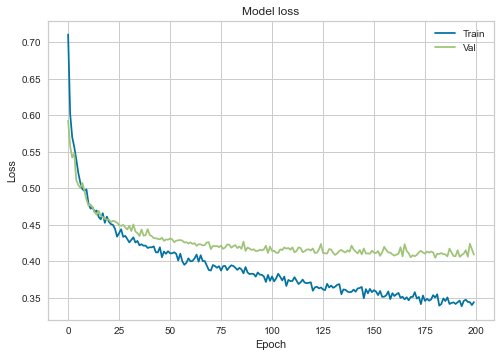

In [308]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


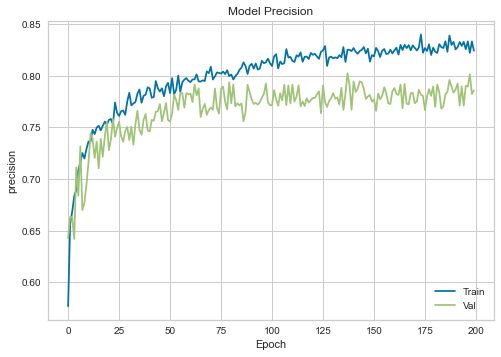

In [309]:

plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [310]:
y_train_pred=NN_90_exp1.predict_classes(train_X_90_nn)

print(round(f1_score(train_y_90_nn,y_train_pred),3))
print(round(precision_score(train_y_90_nn,y_train_pred),3))
print(round(recall_score(train_y_90_nn,y_train_pred),3))

0.86
0.828
0.894


In [311]:
y_test_pred=NN_90_exp1.predict_classes(test_X_90_nn)

print(round(f1_score(test_y_90_nn,y_test_pred),3))
print(round(precision_score(test_y_90_nn,y_test_pred),3))
print(round(recall_score(test_y_90_nn,y_test_pred),3))



0.841
0.797
0.891


In [312]:
#predicting using the NN model on the 00's data 

y_test_00_pred=NN_90_exp1.predict_classes(test_X_00_nn_exp2)

print(round(f1_score(test_y_00_nn_exp2,y_test_00_pred),3))
print(round(precision_score(test_y_00_nn_exp2,y_test_00_pred),3))
print(round(recall_score(test_y_00_nn_exp2,y_test_00_pred),3))


0.813
0.756
0.88


In [485]:
evaluate_model(rf_90_exp1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [486]:
evaluate_model(xgb_90_tuned_exp1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

__The best model in 90s are__
- Random Forest 
- Tuned XGB

The important features as per ___Random forest___ are 
- Instrumentalness
- duration_ms
- acousticness
- danceability

The important features as per ___Tuned XGB___ are 
- Instrumentalness
- duration_ms
- danceability
- acousticness

## 2000s Decade

In [234]:
clf_2000_exp1 = setup(train_00s, target = 'target', session_id=123,test_data=test_00s)

In [235]:
lr_00_exp1=create_model('lr')

In [236]:
predict_model(lr_00_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.112820  0.071429      0.000000     1.0      0   
1               0.75    0.079958  0.047619      0.000000     1.0      1   
2               0.75    0.276118  0.196429      0.000000     1.0      0   
3               0.75    0.205489  0.059524      0.017094     1.0      0   
4               0.75    0.104235  0.077381      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1757            0.75    0.094890  0.059524      0.000000     0.0      1   
1758            0.75    0.327407  0.095238      0.017094     1.0      0   
1759            0.75    0.100292  0.047619      0.000000     0.0      1   
1760            0.75    0.148575  0.053571      0.025641     1.0      1   
1761            0.75    0.170887  0.053571      0.000000     1.0      0   

      Label   Score  
0         0  0.9850  
1         1  0.7532  
2         0  0.9999  
3         0  0.9962  
4         1  0.8553  
...     ...     ...  
1757      1  0.7390  
1758      0  0.9776  
1759      1  0.7447  
1760      1  0.6093  
1761      0  0.7782  

[1762 rows x 19 columns]

In [237]:
lr_00_tuned_exp1_l2=tune_model(lr_00_exp1,optimize='Precision')

In [238]:
predict_model(lr_00_tuned_exp1_l2)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.112820  0.071429      0.000000     1.0      0   
1               0.75    0.079958  0.047619      0.000000     1.0      1   
2               0.75    0.276118  0.196429      0.000000     1.0      0   
3               0.75    0.205489  0.059524      0.017094     1.0      0   
4               0.75    0.104235  0.077381      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1757            0.75    0.094890  0.059524      0.000000     0.0      1   
1758            0.75    0.327407  0.095238      0.017094     1.0      0   
1759            0.75    0.100292  0.047619      0.000000     0.0      1   
1760            0.75    0.148575  0.053571      0.025641     1.0      1   
1761            0.75    0.170887  0.053571      0.000000     1.0      0   

      Label   Score  
0         0  0.9891  
1         1  0.7948  
2         0  1.0000  
3         0  0.9980  
4         1  0.8502  
...     ...     ...  
1757      1  0.7344  
1758      0  0.9870  
1759      1  0.7682  
1760      1  0.6221  
1761      0  0.8186  

[1762 rows x 19 columns]

In [239]:
lr_00_exp1_l1=create_model('lr',penalty='l1',solver='liblinear')

In [240]:
lr_00_tuned_exp1_l1=tune_model(lr_00_exp1_l1,optimize='Precision')

In [241]:
predict_model(lr_00_tuned_exp1_l1)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.112820  0.071429      0.000000     1.0      0   
1               0.75    0.079958  0.047619      0.000000     1.0      1   
2               0.75    0.276118  0.196429      0.000000     1.0      0   
3               0.75    0.205489  0.059524      0.017094     1.0      0   
4               0.75    0.104235  0.077381      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1757            0.75    0.094890  0.059524      0.000000     0.0      1   
1758            0.75    0.327407  0.095238      0.017094     1.0      0   
1759            0.75    0.100292  0.047619      0.000000     0.0      1   
1760            0.75    0.148575  0.053571      0.025641     1.0      1   
1761            0.75    0.170887  0.053571      0.000000     1.0      0   

      Label   Score  
0         0  0.9895  
1         1  0.7812  
2         0  1.0000  
3         0  0.9979  
4         1  0.8503  
...     ...     ...  
1757      1  0.7387  
1758      0  0.9872  
1759      1  0.7578  
1760      1  0.6188  
1761      0  0.8066  

[1762 rows x 19 columns]

In [242]:

#predicting the logistic models for the test data of 10's
temp_10=predict_model(lr_00_exp1,test_10s_exp2)
print("f1_score of logistic regression on 10's data : ",round(f1_score(temp_10['target'],temp_10['Label']),3))
print("precison_score of logistic regression on 10's data : ",round(precision_score(temp_10['target'],temp_10['Label']),3))
print("recall_score of logistic regression on 10's data ",round(recall_score(temp_10['target'],temp_10['Label']),3))
print("\n")
temp_10=predict_model(lr_00_tuned_exp1_l2,test_10s_exp2)
print("f1_score of logistic regression with l2 regularization on 10's data : ",round(f1_score(temp_10['target'],temp_10['Label']),3))
print("precison_score of of logistic regression with l2 regularization on 10's data : ",round(precision_score(temp_10['target'],temp_10['Label']),3))
print("recall_score of of logistic regression with l2 regularization  on 10's data ",round(recall_score(temp_10['target'],temp_10['Label']),3))
print("\n")

temp_10=predict_model(lr_00_tuned_exp1_l1,test_10s_exp2)
print("f1_score of logistic regression with l1 regularization on 10's data : ",round(f1_score(temp_10['target'],temp_10['Label']),3))
print("precison_score of of logistic regression with l1 regularization on 10's data : ",round(precision_score(temp_10['target'],temp_10['Label']),3))
print("recall_score of of logistic regression with l1 regularization  on 10's data ",round(recall_score(temp_10['target'],temp_10['Label']),3))


f1_score of logistic regression on 10's data :  0.817
precison_score of logistic regression on 10's data :  0.744
recall_score of logistic regression on 10's data  0.907


f1_score of logistic regression with l2 regularization on 10's data :  0.821
precison_score of of logistic regression with l2 regularization on 10's data :  0.746
recall_score of of logistic regression with l2 regularization  on 10's data  0.913


f1_score of logistic regression with l1 regularization on 10's data :  0.817
precison_score of of logistic regression with l1 regularization on 10's data :  0.743
recall_score of of logistic regression with l1 regularization  on 10's data  0.907


### SVM - 90s

In [243]:
svm_00_exp1=create_model('svm')

In [244]:
predict_model(svm_00_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  Label  
0               0.75    0.112820  0.071429      0.000000     1.0      0      0  
1               0.75    0.079958  0.047619      0.000000     1.0      1      1  
2               0.75    0.276118  0.196429      0.000000     1.0      0      0  
3               0.75    0.205489  0.059524      0.017094     1.0      0      0  
4               0.75    0.104235  0.077381      0.000000     0.0      0      1  
...              ...         ...       ...           ...     ...    ...    ...  
1757            0.75    0.094890  0.059524      0.000000     0.0      1      1  
1758            0.75    0.327407  0.095238      0.017094     1.0      0      0  
1759            0.75    0.100292  0.047619      0.000000     0.0      1      1  
1760            0.75    0.148575  0.053571      0.025641     1.0      1      0  
1761            0.75    0.170887  0.053571      0.000000     1.0      0      0  

[1762 rows x 18 columns]

In [245]:
svm_00_tuned_exp1=tune_model(svm_00_exp1,optimize='Precision')

In [246]:
predict_model(svm_00_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  Label  
0               0.75    0.112820  0.071429      0.000000     1.0      0      0  
1               0.75    0.079958  0.047619      0.000000     1.0      1      1  
2               0.75    0.276118  0.196429      0.000000     1.0      0      0  
3               0.75    0.205489  0.059524      0.017094     1.0      0      0  
4               0.75    0.104235  0.077381      0.000000     0.0      0      1  
...              ...         ...       ...           ...     ...    ...    ...  
1757            0.75    0.094890  0.059524      0.000000     0.0      1      1  
1758            0.75    0.327407  0.095238      0.017094     1.0      0      0  
1759            0.75    0.100292  0.047619      0.000000     0.0      1      1  
1760            0.75    0.148575  0.053571      0.025641     1.0      1      1  
1761            0.75    0.170887  0.053571      0.000000     1.0      0      0  

[1762 rows x 18 columns]

In [247]:
rbfsvm_00_exp1=create_model('rbfsvm')

In [248]:
predict_model(rbfsvm_00_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.112820  0.071429      0.000000     1.0      0   
1               0.75    0.079958  0.047619      0.000000     1.0      1   
2               0.75    0.276118  0.196429      0.000000     1.0      0   
3               0.75    0.205489  0.059524      0.017094     1.0      0   
4               0.75    0.104235  0.077381      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1757            0.75    0.094890  0.059524      0.000000     0.0      1   
1758            0.75    0.327407  0.095238      0.017094     1.0      0   
1759            0.75    0.100292  0.047619      0.000000     0.0      1   
1760            0.75    0.148575  0.053571      0.025641     1.0      1   
1761            0.75    0.170887  0.053571      0.000000     1.0      0   

      Label   Score  
0         0  0.9506  
1         1  0.7912  
2         0  0.9305  
3         0  0.9394  
4         0  0.8434  
...     ...     ...  
1757      1  0.7273  
1758      0  0.9924  
1759      1  0.7971  
1760      1  0.6344  
1761      0  0.8716  

[1762 rows x 19 columns]

In [249]:
rbfsvm_00_tuned_exp1=tune_model(rbfsvm_00_exp1,optimize='Precision')

In [250]:
predict_model(rbfsvm_00_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.112820  0.071429      0.000000     1.0      0   
1               0.75    0.079958  0.047619      0.000000     1.0      1   
2               0.75    0.276118  0.196429      0.000000     1.0      0   
3               0.75    0.205489  0.059524      0.017094     1.0      0   
4               0.75    0.104235  0.077381      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1757            0.75    0.094890  0.059524      0.000000     0.0      1   
1758            0.75    0.327407  0.095238      0.017094     1.0      0   
1759            0.75    0.100292  0.047619      0.000000     0.0      1   
1760            0.75    0.148575  0.053571      0.025641     1.0      1   
1761            0.75    0.170887  0.053571      0.000000     1.0      0   

      Label   Score  
0         0  0.9741  
1         1  0.8312  
2         0  0.9840  
3         0  0.9306  
4         0  0.8520  
...     ...     ...  
1757      1  0.7129  
1758      0  0.9998  
1759      1  0.8154  
1760      1  0.6750  
1761      0  0.9342  

[1762 rows x 19 columns]

In [251]:
#predicting the SVM for the test data of 10's
temp_10=predict_model(svm_00_exp1,test_10s_exp2)
print("f1_score of SVMn on 10's data : ",round(f1_score(temp_10['target'],temp_10['Label']),3))
print("precison_score of SVM on 10's data : ",round(precision_score(temp_10['target'],temp_10['Label']),3))
print("recall_score of SVM on 10's data ",round(recall_score(temp_10['target'],temp_10['Label']),3))
print("\n")
temp_10=predict_model(svm_00_tuned_exp1,test_10s_exp2)
print("f1_score of tuned SVM on 10's data : ",round(f1_score(temp_10['target'],temp_10['Label']),3))
print("precison_score of tuned SVM on 10's data : ",round(precision_score(temp_10['target'],temp_10['Label']),3))
print("recall_score of tuned SVM  on 10's data ",round(recall_score(temp_10['target'],temp_10['Label']),3))
print("\n")

temp_10=predict_model(rbfsvm_00_exp1,test_10s_exp2)
print("f1_score of RBF SVM on 10's data : ",round(f1_score(temp_10['target'],temp_10['Label']),3))
print("precison_score of  RBF SVM on 10's data : ",round(precision_score(temp_10['target'],temp_10['Label']),3))
print("recall_score of  RBF SVM on 10's data ",round(recall_score(temp_10['target'],temp_10['Label']),3))

print("\n")

temp_10=predict_model(rbfsvm_00_tuned_exp1,test_10s)
print("f1_score of tuned RBF SVM on 10's data : ",round(f1_score(temp_10['target'],temp_10['Label']),3))
print("precison_score of tuned RBF SVM on 10's data : ",round(precision_score(temp_10['target'],temp_10['Label']),3))
print("recall_score of tuned  RBF SVM on 10's data ",round(recall_score(temp_10['target'],temp_10['Label']),3))


f1_score of SVMn on 10's data :  0.789
precison_score of SVM on 10's data :  0.777
recall_score of SVM on 10's data  0.802


f1_score of tuned SVM on 10's data :  0.797
precison_score of tuned SVM on 10's data :  0.671
recall_score of tuned SVM  on 10's data  0.981


f1_score of RBF SVM on 10's data :  0.816
precison_score of  RBF SVM on 10's data :  0.741
recall_score of  RBF SVM on 10's data  0.909


f1_score of tuned RBF SVM on 10's data :  0.823
precison_score of tuned RBF SVM on 10's data :  0.777
recall_score of tuned  RBF SVM on 10's data  0.875


### Random Forest - 2000s 

In [252]:
rf_00_exp1=create_model('rf')

In [253]:
predict_model(rf_00_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.112820  0.071429      0.000000     1.0      0   
1               0.75    0.079958  0.047619      0.000000     1.0      1   
2               0.75    0.276118  0.196429      0.000000     1.0      0   
3               0.75    0.205489  0.059524      0.017094     1.0      0   
4               0.75    0.104235  0.077381      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1757            0.75    0.094890  0.059524      0.000000     0.0      1   
1758            0.75    0.327407  0.095238      0.017094     1.0      0   
1759            0.75    0.100292  0.047619      0.000000     0.0      1   
1760            0.75    0.148575  0.053571      0.025641     1.0      1   
1761            0.75    0.170887  0.053571      0.000000     1.0      0   

      Label   Score  
0         0  0.9300  
1         1  0.8700  
2         0  1.0000  
3         0  1.0000  
4         0  0.7900  
...     ...     ...  
1757      1  0.8400  
1758      0  0.9700  
1759      1  0.7900  
1760      0  0.5333  
1761      0  0.9400  

[1762 rows x 19 columns]

In [254]:
rf_00_tuned_exp1= tune_model(rf_00_exp1,optimize='Precision',search_library='optuna')

In [255]:
predict_model(rf_00_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.112820  0.071429      0.000000     1.0      0   
1               0.75    0.079958  0.047619      0.000000     1.0      1   
2               0.75    0.276118  0.196429      0.000000     1.0      0   
3               0.75    0.205489  0.059524      0.017094     1.0      0   
4               0.75    0.104235  0.077381      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1757            0.75    0.094890  0.059524      0.000000     0.0      1   
1758            0.75    0.327407  0.095238      0.017094     1.0      0   
1759            0.75    0.100292  0.047619      0.000000     0.0      1   
1760            0.75    0.148575  0.053571      0.025641     1.0      1   
1761            0.75    0.170887  0.053571      0.000000     1.0      0   

      Label   Score  
0         0  0.9362  
1         1  0.8905  
2         0  1.0000  
3         0  0.9838  
4         0  0.7496  
...     ...     ...  
1757      1  0.7356  
1758      0  0.9764  
1759      1  0.8400  
1760      1  0.5422  
1761      0  0.9512  

[1762 rows x 19 columns]

In [256]:
#predicting the RF for the test data of 10's
temp_10=predict_model(rf_00_exp1,test_10s_exp2)
print("f1_score of RF on 10's data : ",round(f1_score(temp_10['target'],temp_10['Label']),3))
print("precison_score of RF on 10's data : ",round(precision_score(temp_10['target'],temp_10['Label']),3))
print("recall_score of RF on 10's data ",round(recall_score(temp_10['target'],temp_10['Label']),3))
print("\n")
temp_10=predict_model(rf_00_tuned_exp1,test_10s_exp2)
print("f1_score of tuned RF on 10's data : ",round(f1_score(temp_10['target'],temp_10['Label']),3))
print("precison_score of tuned RF on 10's data : ",round(precision_score(temp_10['target'],temp_10['Label']),3))
print("recall_score of tuned RF  on 10's data ",round(recall_score(temp_10['target'],temp_10['Label']),3))
print("\n")

f1_score of RF on 10's data :  0.842
precison_score of RF on 10's data :  0.801
recall_score of RF on 10's data  0.887


f1_score of tuned RF on 10's data :  0.837
precison_score of tuned RF on 10's data :  0.787
recall_score of tuned RF  on 10's data  0.893




### XGboost - 2000s

In [257]:
xgb_00_exp1= create_model('xgboost')

In [258]:
predict_model(xgb_00_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.112820  0.071429      0.000000     1.0      0   
1               0.75    0.079958  0.047619      0.000000     1.0      1   
2               0.75    0.276118  0.196429      0.000000     1.0      0   
3               0.75    0.205489  0.059524      0.017094     1.0      0   
4               0.75    0.104235  0.077381      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1757            0.75    0.094890  0.059524      0.000000     0.0      1   
1758            0.75    0.327407  0.095238      0.017094     1.0      0   
1759            0.75    0.100292  0.047619      0.000000     0.0      1   
1760            0.75    0.148575  0.053571      0.025641     1.0      1   
1761            0.75    0.170887  0.053571      0.000000     1.0      0   

      Label   Score  
0         0  0.9986  
1         1  0.9774  
2         0  1.0000  
3         0  0.9992  
4         0  0.9389  
...     ...     ...  
1757      1  0.9683  
1758      0  0.9862  
1759      1  0.9194  
1760      1  0.6874  
1761      0  0.9802  

[1762 rows x 19 columns]

In [259]:
xgb_00_tuned_exp1=tune_model(xgb_00_exp1,optimize='Precision')

In [260]:
xgb_00_tuned_exp1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.323, max_delta_step=0, max_depth=11,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0.4,
              reg_lambda=0.3, scale_pos_weight=1.9, subsample=0.7,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)

In [261]:
predict_model(xgb_00_tuned_exp1)

danceability  energy       key  loudness  speechiness  acousticness  \
0           0.3410   0.333  1.000000   -12.761       0.0282      0.251000   
1           0.6940   0.709  0.636364    -6.205       0.1030      0.096600   
2           0.1280   0.045  1.000000   -17.723       0.0385      0.942000   
3           0.5520   0.171  0.181818   -13.660       0.0544      0.955000   
4           0.4490   0.955  0.636364    -0.296       0.0465      0.004830   
...            ...     ...       ...       ...          ...           ...   
1757        0.5730   0.934  0.454545    -3.377       0.0372      0.010500   
1758        0.0744   0.974  0.090909    -3.172       0.0969      0.000018   
1759        0.6020   0.894  0.363636    -3.975       0.0320      0.001540   
1760        0.6030   0.774  0.272727    -6.066       0.0428      0.028800   
1761        0.4550   0.985  0.090909    -4.599       0.1050      0.004200   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0             0.526000    0.0962   0.0357  0.288345     0.057110   
1             0.000000    0.2670   0.5660  0.415662     0.039755   
2             0.894000    0.1150   0.0395  0.238583     0.160096   
3             0.877000    0.1220   0.1520  0.339088     0.053371   
4             0.004590    0.1360   0.3080  0.263397     0.067726   
...                ...       ...      ...       ...          ...   
1757          0.000073    0.3180   0.5440  0.438861     0.054503   
1758          0.304000    0.4520   0.0609  0.130724     0.074934   
1759          0.000000    0.4330   0.6430  0.482828     0.038019   
1760          0.051000    0.0533   0.4800  0.476771     0.051876   
1761          0.093200    0.3440   0.1960  0.346157     0.060325   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.75    0.112820  0.071429      0.000000     1.0      0   
1               0.75    0.079958  0.047619      0.000000     1.0      1   
2               0.75    0.276118  0.196429      0.000000     1.0      0   
3               0.75    0.205489  0.059524      0.017094     1.0      0   
4               0.75    0.104235  0.077381      0.000000     0.0      0   
...              ...         ...       ...           ...     ...    ...   
1757            0.75    0.094890  0.059524      0.000000     0.0      1   
1758            0.75    0.327407  0.095238      0.017094     1.0      0   
1759            0.75    0.100292  0.047619      0.000000     0.0      1   
1760            0.75    0.148575  0.053571      0.025641     1.0      1   
1761            0.75    0.170887  0.053571      0.000000     1.0      0   

      Label   Score  
0         0  0.9980  
1         1  0.9988  
2         0  0.9998  
3         0  0.9969  
4         0  0.7457  
...     ...     ...  
1757      1  0.9877  
1758      0  0.9922  
1759      1  0.9956  
1760      1  0.9718  
1761      0  0.9985  

[1762 rows x 19 columns]

In [262]:
#predicting the XGB for the test data of 10's
temp_10=predict_model(xgb_00_exp1,test_10s_exp2)
print("f1_score of XGB on 10's data : ",round(f1_score(temp_10['target'],temp_10['Label']),3))
print("precison_score of XGB on 10's data : ",round(precision_score(temp_10['target'],temp_10['Label']),3))
print("recall_score of XGB on 10's data ",round(recall_score(temp_10['target'],temp_10['Label']),3))
print("\n")
temp_10=predict_model(xgb_00_tuned_exp1,test_10s_exp2)
print("f1_score of tuned XGB on 10's data : ",round(f1_score(temp_10['target'],temp_10['Label']),3))
print("precison_score of tuned XGB on 10's data : ",round(precision_score(temp_10['target'],temp_10['Label']),3))
print("recall_score of tuned XGB  on 10's data ",round(recall_score(temp_10['target'],temp_10['Label']),3))
print("\n")

f1_score of XGB on 10's data :  0.837
precison_score of XGB on 10's data :  0.784
recall_score of XGB on 10's data  0.899


f1_score of tuned XGB on 10's data :  0.84
precison_score of tuned XGB on 10's data :  0.779
recall_score of tuned XGB  on 10's data  0.912




### Neural networks - 2000s

In [313]:

tf.random.set_seed(1234)

In [314]:
NN_00_exp1 = Sequential(
    [
        Dense(32, activation='relu', input_shape=(16,), kernel_initializer='he_uniform'), 
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid'),
    ]
)

In [315]:
NN_00_exp1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [316]:
#nitializing earlystopping callback and training the model
#from keras import callbacks 
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
#                                        mode ="min", patience = 7,  
#                                        restore_best_weights = True) 

In [317]:
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_00_exp1.compile(optimizer=opt,loss='binary_crossentropy',metrics=['Precision'])

hist = NN_00_exp1.fit(train_X_00_nn, train_y_00_nn, epochs=200,validation_split=0.3)

Epoch 1/200
90/90 [==============================] - 2s 10ms/step - loss: 0.7119 - precision: 0.5501 - val_loss: 0.5591 - val_precision: 0.6413
Epoch 2/200
90/90 [==============================] - 0s 2ms/step - loss: 0.5704 - precision: 0.6727 - val_loss: 0.5188 - val_precision: 0.6551
Epoch 3/200
90/90 [==============================] - 0s 2ms/step - loss: 0.5300 - precision: 0.7004 - val_loss: 0.5013 - val_precision: 0.6897
Epoch 4/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4930 - precision: 0.7352 - val_loss: 0.4896 - val_precision: 0.7009
Epoch 5/200
90/90 [==============================] - 0s 2ms/step - loss: 0.4719 - precision: 0.7551 - val_loss: 0.4841 - val_precision: 0.6964
Epoch 6/200
90/90 [==============================] - 0s 3ms/step - loss: 0.4732 - precision: 0.7413 - val_loss: 0.4761 - val_precision: 0.7097
Epoch 7/200
90/90 [==============================] - 0s 3ms/step - loss: 0.4510 - precision: 0.7570 - val_loss: 0.4752 - val_precision: 0.694

Epoch 58/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3534 - precision: 0.8236 - val_loss: 0.4075 - val_precision: 0.8066
Epoch 59/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3678 - precision: 0.8052 - val_loss: 0.4128 - val_precision: 0.7824
Epoch 60/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3717 - precision: 0.8110 - val_loss: 0.4078 - val_precision: 0.8122
Epoch 61/200
90/90 [==============================] - 0s 2ms/step - loss: 0.3589 - precision: 0.8155 - val_loss: 0.4168 - val_precision: 0.7755
Epoch 62/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3700 - precision: 0.8075 - val_loss: 0.4250 - val_precision: 0.7604
Epoch 63/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3619 - precision: 0.8125 - val_loss: 0.4158 - val_precision: 0.7586
Epoch 64/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3501 - precision: 0.8223 - val_loss: 0.4125 - val_precision:

Epoch 115/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3371 - precision: 0.8217 - val_loss: 0.4091 - val_precision: 0.7892
Epoch 116/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3649 - precision: 0.8145 - val_loss: 0.4143 - val_precision: 0.7751
Epoch 117/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3472 - precision: 0.8214 - val_loss: 0.4046 - val_precision: 0.7926
Epoch 118/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3471 - precision: 0.8198 - val_loss: 0.4212 - val_precision: 0.7504
Epoch 119/200
90/90 [==============================] - 0s 2ms/step - loss: 0.3474 - precision: 0.8265 - val_loss: 0.4061 - val_precision: 0.7932
Epoch 120/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3423 - precision: 0.8295 - val_loss: 0.4071 - val_precision: 0.7926
Epoch 121/200
90/90 [==============================] - 0s 3ms/step - loss: 0.3364 - precision: 0.8273 - val_loss: 0.4155 - val_pre

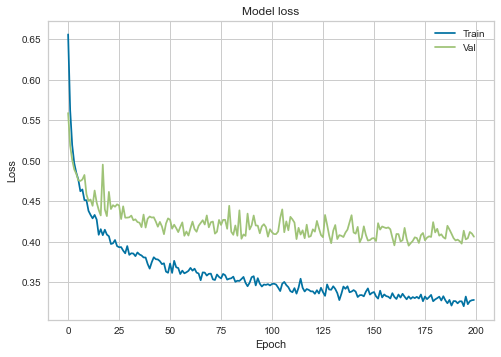

In [318]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


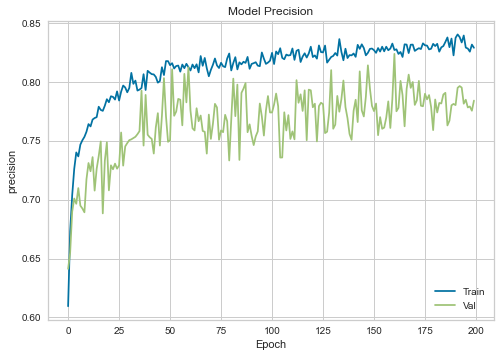

In [319]:

plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [320]:
y_train_pred=NN_00_exp1.predict_classes(train_X_00_nn)

print(round(f1_score(train_y_00_nn,y_train_pred),3))
print(round(precision_score(train_y_00_nn,y_train_pred),3))
print(round(recall_score(train_y_00_nn,y_train_pred),3))

0.864
0.81
0.927


In [321]:
y_test_pred=NN_00_exp1.predict_classes(test_X_00_nn)

print(round(f1_score(test_y_00_nn,y_test_pred),3))
print(round(precision_score(test_y_00_nn,y_test_pred),3))
print(round(recall_score(test_y_00_nn,y_test_pred),3))



0.849
0.801
0.903


In [322]:
#predicting using the NN model on the 10's data 

y_test_10_pred=NN_00_exp1.predict_classes(test_X_10_nn_exp2)

print(round(f1_score(test_y_10_nn_exp2,y_test_10_pred),3))
print(round(precision_score(test_y_10_nn_exp2,y_test_10_pred),3))
print(round(recall_score(test_y_10_nn_exp2,y_test_10_pred),3))


0.823
0.74
0.926


In [267]:
evaluate_model(rf_00_exp1)

Parameters
bootstrap                      True
ccp_alpha                       0.0
class_weight                   None
criterion                      gini
max_depth                      None
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease           0.0
min_impurity_split             None
min_samples_leaf                  1
min_samples_split                 2
min_weight_fraction_leaf        0.0
n_estimators                    100
n_jobs                           -1
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

In [264]:
evaluate_model(xgb_00_tuned_exp1)

Parameters
objective                binary:logistic
use_label_encoder                   True
base_score                           0.5
booster                           gbtree
colsample_bylevel                      1
colsample_bynode                       1
colsample_bytree                       1
gamma                                  0
gpu_id                                -1
importance_type                     gain
interaction_constraints                 
learning_rate                      0.323
max_delta_step                         0
max_depth                             11
min_child_weight                       4
missing                              nan
monotone_constraints                  ()
n_estimators                         100
n_jobs                                -1
num_parallel_tree                      1
random_state                         123
reg_alpha                            0.4
reg_lambda                           0.3
scale_pos_weight                     1.9
subsample                            0.7
tree_method                         auto
validate_parameters                    1
verbosity                              0

__The best model in the 2000s are__
- Random Forest 
- Tuned XGB

The important features in ___Random forest___ are 
- Instrunentalness
- duration_ms
- acousticness 
- danceability


The imporatant features in ___tuned XGB___ are 
- Instrunentalness
- duration_ms
- danceability
- acousticness

## 2010s Decade

### Logistic Regression - 2010s

In [549]:
clf_10_exp1 = setup(train_10s, target = 'target', session_id=123,test_data=test_10s, log_experiment=True, experiment_name='Exp-1_2010')

In [552]:
lr_10_exp1=create_model('lr')

In [554]:
predict_model(lr_10_exp1)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.50    0.211282  0.127907      0.022059     1.0      0   
1               0.75    0.215239  0.127907      0.007353     1.0      0   
2               0.75    0.104126  0.139535      0.000000     0.0      1   
3               0.75    0.286104  0.116279      0.000000     0.0      0   
4               0.75    0.167294  0.104651      0.000000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     1.0      1   
1916            0.00    0.153836  0.081395      0.000000     1.0      1   
1917            0.75    0.274219  0.069767      0.051471     1.0      1   
1918            0.75    0.147800  0.081395      0.000000     1.0      0   
1919            0.75    0.116484  0.069767      0.000000     1.0      0   

      Label   Score  
0         0  0.9992  
1         0  0.5848  
2         1  0.6819  
3         1  0.8755  
4         1  0.5974  
...     ...     ...  
1915      1  0.7484  
1916      0  0.7991  
1917      1  0.8669  
1918      0  0.9906  
1919      0  0.8481  

[1920 rows x 19 columns]

In [555]:
lr_10_tuned_exp1_l2=tune_model(lr_10_exp1,optimize='Precision')

In [556]:
predict_model(lr_10_tuned_exp1_l2)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.50    0.211282  0.127907      0.022059     1.0      0   
1               0.75    0.215239  0.127907      0.007353     1.0      0   
2               0.75    0.104126  0.139535      0.000000     0.0      1   
3               0.75    0.286104  0.116279      0.000000     0.0      0   
4               0.75    0.167294  0.104651      0.000000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     1.0      1   
1916            0.00    0.153836  0.081395      0.000000     1.0      1   
1917            0.75    0.274219  0.069767      0.051471     1.0      1   
1918            0.75    0.147800  0.081395      0.000000     1.0      0   
1919            0.75    0.116484  0.069767      0.000000     1.0      0   

      Label   Score  
0         0  0.9996  
1         0  0.6302  
2         1  0.6759  
3         1  0.8743  
4         1  0.5926  
...     ...     ...  
1915      1  0.7456  
1916      0  0.8495  
1917      1  0.9126  
1918      0  0.9972  
1919      0  0.9130  

[1920 rows x 19 columns]

In [557]:
lr_10_exp1_l1=create_model('lr',penalty='l1',solver='liblinear')

In [558]:
lr_10_tuned_exp1_l1=tune_model(lr_10_exp1_l1,optimize='Precision')

In [559]:
predict_model(lr_10_tuned_exp1_l1
             )

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.50    0.211282  0.127907      0.022059     1.0      0   
1               0.75    0.215239  0.127907      0.007353     1.0      0   
2               0.75    0.104126  0.139535      0.000000     0.0      1   
3               0.75    0.286104  0.116279      0.000000     0.0      0   
4               0.75    0.167294  0.104651      0.000000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     1.0      1   
1916            0.00    0.153836  0.081395      0.000000     1.0      1   
1917            0.75    0.274219  0.069767      0.051471     1.0      1   
1918            0.75    0.147800  0.081395      0.000000     1.0      0   
1919            0.75    0.116484  0.069767      0.000000     1.0      0   

      Label   Score  
0         0  0.9995  
1         0  0.6139  
2         1  0.6772  
3         1  0.8780  
4         1  0.5936  
...     ...     ...  
1915      1  0.7482  
1916      0  0.8486  
1917      1  0.9014  
1918      0  0.9963  
1919      0  0.8960  

[1920 rows x 19 columns]

### SVM -2010s

In [560]:
svm_10_exp1= create_model('svm')

In [562]:
predict_model(svm_10_exp1)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  Label  
0               0.50    0.211282  0.127907      0.022059     1.0      0      0  
1               0.75    0.215239  0.127907      0.007353     1.0      0      0  
2               0.75    0.104126  0.139535      0.000000     0.0      1      0  
3               0.75    0.286104  0.116279      0.000000     0.0      0      1  
4               0.75    0.167294  0.104651      0.000000     0.0      1      0  
...              ...         ...       ...           ...     ...    ...    ...  
1915            0.75    0.118651  0.081395      0.000000     1.0      1      1  
1916            0.00    0.153836  0.081395      0.000000     1.0      1      0  
1917            0.75    0.274219  0.069767      0.051471     1.0      1      1  
1918            0.75    0.147800  0.081395      0.000000     1.0      0      0  
1919            0.75    0.116484  0.069767      0.000000     1.0      0      0  

[1920 rows x 18 columns]

In [563]:
svm_10_tuned_exp1=tune_model(svm_10_exp1,optimize='precision')

In [564]:
predict_model(svm_10_tuned_exp1)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  Label  
0               0.50    0.211282  0.127907      0.022059     1.0      0      0  
1               0.75    0.215239  0.127907      0.007353     1.0      0      0  
2               0.75    0.104126  0.139535      0.000000     0.0      1      1  
3               0.75    0.286104  0.116279      0.000000     0.0      0      1  
4               0.75    0.167294  0.104651      0.000000     0.0      1      1  
...              ...         ...       ...           ...     ...    ...    ...  
1915            0.75    0.118651  0.081395      0.000000     1.0      1      1  
1916            0.00    0.153836  0.081395      0.000000     1.0      1      0  
1917            0.75    0.274219  0.069767      0.051471     1.0      1      1  
1918            0.75    0.147800  0.081395      0.000000     1.0      0      0  
1919            0.75    0.116484  0.069767      0.000000     1.0      0      0  

[1920 rows x 18 columns]

In [565]:
rbfsvm_10_exp1= create_model('rbfsvm')

In [566]:
predict_model(rbfsvm_10_exp1)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.50    0.211282  0.127907      0.022059     1.0      0   
1               0.75    0.215239  0.127907      0.007353     1.0      0   
2               0.75    0.104126  0.139535      0.000000     0.0      1   
3               0.75    0.286104  0.116279      0.000000     0.0      0   
4               0.75    0.167294  0.104651      0.000000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     1.0      1   
1916            0.00    0.153836  0.081395      0.000000     1.0      1   
1917            0.75    0.274219  0.069767      0.051471     1.0      1   
1918            0.75    0.147800  0.081395      0.000000     1.0      0   
1919            0.75    0.116484  0.069767      0.000000     1.0      0   

      Label   Score  
0         0  0.9699  
1         0  0.7119  
2         1  0.7787  
3         1  0.9236  
4         0  0.7944  
...     ...     ...  
1915      1  0.7967  
1916      0  0.8138  
1917      1  0.5656  
1918      0  0.9877  
1919      0  0.8259  

[1920 rows x 19 columns]

In [567]:
rbfsvm_10_tuned_exp1=tune_model(rbfsvm_10_exp1,optimize='Precision')

In [568]:
predict_model(rbfsvm_10_tuned_exp1)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.50    0.211282  0.127907      0.022059     1.0      0   
1               0.75    0.215239  0.127907      0.007353     1.0      0   
2               0.75    0.104126  0.139535      0.000000     0.0      1   
3               0.75    0.286104  0.116279      0.000000     0.0      0   
4               0.75    0.167294  0.104651      0.000000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     1.0      1   
1916            0.00    0.153836  0.081395      0.000000     1.0      1   
1917            0.75    0.274219  0.069767      0.051471     1.0      1   
1918            0.75    0.147800  0.081395      0.000000     1.0      0   
1919            0.75    0.116484  0.069767      0.000000     1.0      0   

      Label   Score  
0         0  1.0000  
1         0  0.8652  
2         1  0.7921  
3         1  0.7953  
4         0  0.7219  
...     ...     ...  
1915      1  0.8939  
1916      1  0.6554  
1917      1  0.7916  
1918      0  0.9990  
1919      0  0.9189  

[1920 rows x 19 columns]

### Random Forest - 2010s

In [569]:
rf_10_exp1=create_model('rf')

In [570]:
predict_model(rf_10_exp1)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.50    0.211282  0.127907      0.022059     1.0      0   
1               0.75    0.215239  0.127907      0.007353     1.0      0   
2               0.75    0.104126  0.139535      0.000000     0.0      1   
3               0.75    0.286104  0.116279      0.000000     0.0      0   
4               0.75    0.167294  0.104651      0.000000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     1.0      1   
1916            0.00    0.153836  0.081395      0.000000     1.0      1   
1917            0.75    0.274219  0.069767      0.051471     1.0      1   
1918            0.75    0.147800  0.081395      0.000000     1.0      0   
1919            0.75    0.116484  0.069767      0.000000     1.0      0   

      Label  Score  
0         0   0.97  
1         0   0.76  
2         1   0.85  
3         0   0.60  
4         0   0.62  
...     ...    ...  
1915      1   0.92  
1916      1   0.70  
1917      1   0.95  
1918      0   0.95  
1919      0   0.88  

[1920 rows x 19 columns]

In [574]:
rf_10_tuned_exp1=tune_model(rf_10_exp1,optimize='Precision',search_library='optuna')

In [575]:
predict_model(rf_10_tuned_exp1)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.50    0.211282  0.127907      0.022059     1.0      0   
1               0.75    0.215239  0.127907      0.007353     1.0      0   
2               0.75    0.104126  0.139535      0.000000     0.0      1   
3               0.75    0.286104  0.116279      0.000000     0.0      0   
4               0.75    0.167294  0.104651      0.000000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     1.0      1   
1916            0.00    0.153836  0.081395      0.000000     1.0      1   
1917            0.75    0.274219  0.069767      0.051471     1.0      1   
1918            0.75    0.147800  0.081395      0.000000     1.0      0   
1919            0.75    0.116484  0.069767      0.000000     1.0      0   

      Label   Score  
0         0  0.9483  
1         0  0.7703  
2         1  0.8459  
3         1  0.6516  
4         0  0.7291  
...     ...     ...  
1915      1  0.8739  
1916      1  0.8984  
1917      1  0.9899  
1918      0  0.9706  
1919      0  0.7600  

[1920 rows x 19 columns]

### XGboost -2010s

In [577]:
xgb_10_exp1=create_model('xgboost')

In [578]:
predict_model(xgb_10_exp1)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.50    0.211282  0.127907      0.022059     1.0      0   
1               0.75    0.215239  0.127907      0.007353     1.0      0   
2               0.75    0.104126  0.139535      0.000000     0.0      1   
3               0.75    0.286104  0.116279      0.000000     0.0      0   
4               0.75    0.167294  0.104651      0.000000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     1.0      1   
1916            0.00    0.153836  0.081395      0.000000     1.0      1   
1917            0.75    0.274219  0.069767      0.051471     1.0      1   
1918            0.75    0.147800  0.081395      0.000000     1.0      0   
1919            0.75    0.116484  0.069767      0.000000     1.0      0   

      Label   Score  
0         0  0.9973  
1         0  0.9537  
2         1  0.8389  
3         0  0.5782  
4         0  0.9048  
...     ...     ...  
1915      1  0.9889  
1916      1  0.9108  
1917      1  0.9673  
1918      0  0.9990  
1919      0  0.8849  

[1920 rows x 19 columns]

In [582]:
xgb_10_tuned_exp1=tune_model(xgb_10_exp1,optimize='Precision')

In [583]:
predict_model(xgb_10_tuned_exp1)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_0 target  \
0               0.50    0.211282  0.127907      0.022059     1.0      0   
1               0.75    0.215239  0.127907      0.007353     1.0      0   
2               0.75    0.104126  0.139535      0.000000     0.0      1   
3               0.75    0.286104  0.116279      0.000000     0.0      0   
4               0.75    0.167294  0.104651      0.000000     0.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     1.0      1   
1916            0.00    0.153836  0.081395      0.000000     1.0      1   
1917            0.75    0.274219  0.069767      0.051471     1.0      1   
1918            0.75    0.147800  0.081395      0.000000     1.0      0   
1919            0.75    0.116484  0.069767      0.000000     1.0      0   

      Label   Score  
0         0  0.9977  
1         0  0.9309  
2         1  0.9834  
3         0  0.5720  
4         0  0.9570  
...     ...     ...  
1915      1  0.9957  
1916      1  0.8164  
1917      1  0.9812  
1918      0  0.9971  
1919      0  0.8612  

[1920 rows x 19 columns]

### Neural Networks 2010s

In [602]:

tf.random.set_seed(1234)

In [603]:
NN_10_exp1 = Sequential(
    [
        Dense(32, activation='relu', input_shape=(16,), kernel_initializer='he_uniform'), 
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid'),
    ]
)

In [604]:
NN_10_exp1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_20 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 33        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [605]:
#nitializing earlystopping callback and training the model
#from keras import callbacks 
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
#                                        mode ="min", patience = 7,  
#                                        restore_best_weights = True) 

In [606]:
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_10_exp1.compile(optimizer=opt,loss='binary_crossentropy',metrics=['Precision'])

hist = NN_10_exp1.fit(train_X_10_nn, train_y_10_nn, epochs=200,validation_split=0.3)

Epoch 1/200
98/98 [==============================] - 2s 8ms/step - loss: 0.7228 - precision: 0.5527 - val_loss: 0.5759 - val_precision: 0.6729
Epoch 2/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5857 - precision: 0.6586 - val_loss: 0.5224 - val_precision: 0.6981
Epoch 3/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5477 - precision: 0.6687 - val_loss: 0.5273 - val_precision: 0.6543
Epoch 4/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5346 - precision: 0.6954 - val_loss: 0.4917 - val_precision: 0.6966
Epoch 5/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5284 - precision: 0.6934 - val_loss: 0.4894 - val_precision: 0.6857
Epoch 6/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5223 - precision: 0.7024 - val_loss: 0.4965 - val_precision: 0.6728
Epoch 7/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5182 - precision: 0.6905 - val_loss: 0.4593 - val_precision: 0.7128

Epoch 58/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3917 - precision: 0.7732 - val_loss: 0.3867 - val_precision: 0.7753
Epoch 59/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3951 - precision: 0.7850 - val_loss: 0.3847 - val_precision: 0.7793
Epoch 60/200
98/98 [==============================] - 0s 4ms/step - loss: 0.4133 - precision: 0.7692 - val_loss: 0.3907 - val_precision: 0.7671
Epoch 61/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3828 - precision: 0.7737 - val_loss: 0.3840 - val_precision: 0.7974
Epoch 62/200
98/98 [==============================] - 0s 5ms/step - loss: 0.4005 - precision: 0.7799 - val_loss: 0.3861 - val_precision: 0.7742
Epoch 63/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3804 - precision: 0.7987 - val_loss: 0.3844 - val_precision: 0.7771
Epoch 64/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3647 - precision: 0.7885 - val_loss: 0.3839 - val_precision:

Epoch 115/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3638 - precision: 0.7947 - val_loss: 0.3715 - val_precision: 0.7880
Epoch 116/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3711 - precision: 0.7905 - val_loss: 0.3816 - val_precision: 0.7736
Epoch 117/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3624 - precision: 0.7957 - val_loss: 0.3713 - val_precision: 0.7890
Epoch 118/200
98/98 [==============================] - 0s 5ms/step - loss: 0.3769 - precision: 0.7921 - val_loss: 0.3698 - val_precision: 0.7900
Epoch 119/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3615 - precision: 0.7989 - val_loss: 0.3726 - val_precision: 0.7865
Epoch 120/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3685 - precision: 0.7994 - val_loss: 0.3695 - val_precision: 0.7885
Epoch 121/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3577 - precision: 0.8204 - val_loss: 0.3725 - val_pre

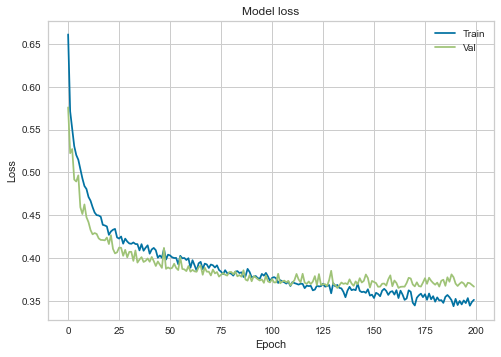

In [607]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


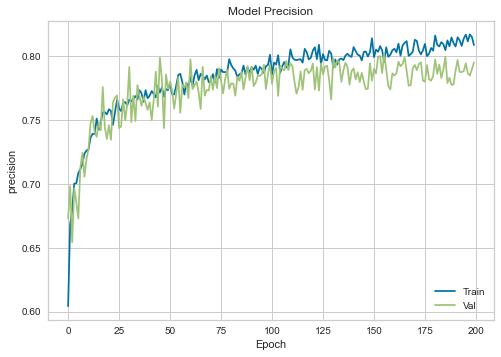

In [608]:

plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [609]:
y_train_pred=NN_10_exp1.predict_classes(train_X_10_nn)

print(round(f1_score(train_y_10_nn,y_train_pred),3))
print(round(precision_score(train_y_10_nn,y_train_pred),3))
print(round(recall_score(train_y_10_nn,y_train_pred),3))

0.863
0.81
0.924


In [610]:
y_test_pred=NN_10_exp1.predict_classes(test_X_10_nn)

print(round(f1_score(test_y_10_nn,y_test_pred),3))
print(round(precision_score(test_y_10_nn,y_test_pred),3))
print(round(recall_score(test_y_10_nn,y_test_pred),3))



0.847
0.8
0.899


In [ ]:
#Lets try to add more layers to the network and see the chnages in metrics 

In [602]:

tf.random.set_seed(1234)

In [614]:
NN_10_exp1_test1 = Sequential(
    [
        Dense(16, activation='relu', input_shape=(16,), kernel_initializer='he_uniform'), 
        Dropout(0.3),
        Dense(16,activation='relu'),
        Dense(16,activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ]
)

In [616]:
NN_10_exp1_test1.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_65 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_66 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 17        
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
___________________________________________________

In [605]:
#nitializing earlystopping callback and training the model
#from keras import callbacks 
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
#                                        mode ="min", patience = 7,  
#                                        restore_best_weights = True) 

In [617]:
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_10_exp1_test1.compile(optimizer=opt,loss='binary_crossentropy',metrics=['Precision'])

hist = NN_10_exp1_test1.fit(train_X_10_nn, train_y_10_nn, epochs=200,validation_split=0.3)

Epoch 1/200
98/98 [==============================] - 2s 6ms/step - loss: 0.6815 - precision: 0.4738 - val_loss: 0.6382 - val_precision: 0.6284
Epoch 2/200
98/98 [==============================] - 0s 3ms/step - loss: 0.6472 - precision: 0.6135 - val_loss: 0.6245 - val_precision: 0.5976
Epoch 3/200
98/98 [==============================] - 0s 2ms/step - loss: 0.6120 - precision: 0.6080 - val_loss: 0.6216 - val_precision: 0.5852
Epoch 4/200
98/98 [==============================] - 0s 3ms/step - loss: 0.6091 - precision: 0.6194 - val_loss: 0.5965 - val_precision: 0.6026
Epoch 5/200
98/98 [==============================] - 0s 2ms/step - loss: 0.5852 - precision: 0.6405 - val_loss: 0.5662 - val_precision: 0.6328
Epoch 6/200
98/98 [==============================] - 0s 2ms/step - loss: 0.5509 - precision: 0.6783 - val_loss: 0.5601 - val_precision: 0.6302
Epoch 7/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5349 - precision: 0.6768 - val_loss: 0.5017 - val_precision: 0.6667

Epoch 58/200
98/98 [==============================] - 0s 3ms/step - loss: 0.4071 - precision: 0.7785 - val_loss: 0.4080 - val_precision: 0.7497
Epoch 59/200
98/98 [==============================] - 0s 3ms/step - loss: 0.4041 - precision: 0.7910 - val_loss: 0.4066 - val_precision: 0.7559
Epoch 60/200
98/98 [==============================] - ETA: 0s - loss: 0.4315 - precision: 0.766 - 0s 3ms/step - loss: 0.4301 - precision: 0.7673 - val_loss: 0.4216 - val_precision: 0.7389
Epoch 61/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3933 - precision: 0.7801 - val_loss: 0.4145 - val_precision: 0.7436
Epoch 62/200
98/98 [==============================] - 0s 3ms/step - loss: 0.4085 - precision: 0.7778 - val_loss: 0.4094 - val_precision: 0.7512
Epoch 63/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3829 - precision: 0.7878 - val_loss: 0.4201 - val_precision: 0.7408
Epoch 64/200
98/98 [==============================] - 0s 2ms/step - loss: 0.3940 - precision

98/98 [==============================] - 0s 3ms/step - loss: 0.3849 - precision: 0.7894 - val_loss: 0.4172 - val_precision: 0.7451
Epoch 171/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3689 - precision: 0.8142 - val_loss: 0.3964 - val_precision: 0.7611
Epoch 172/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3686 - precision: 0.8030 - val_loss: 0.4151 - val_precision: 0.7515
Epoch 173/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3595 - precision: 0.8088 - val_loss: 0.4039 - val_precision: 0.7541
Epoch 174/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3619 - precision: 0.7935 - val_loss: 0.3982 - val_precision: 0.7595
Epoch 175/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3567 - precision: 0.8083 - val_loss: 0.4189 - val_precision: 0.7434
Epoch 176/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3757 - precision: 0.7857 - val_loss: 0.4301 - val_precision: 0.7440

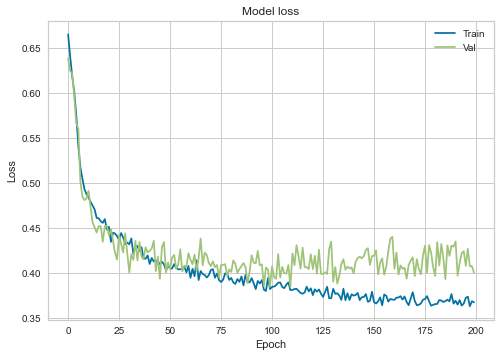

In [618]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


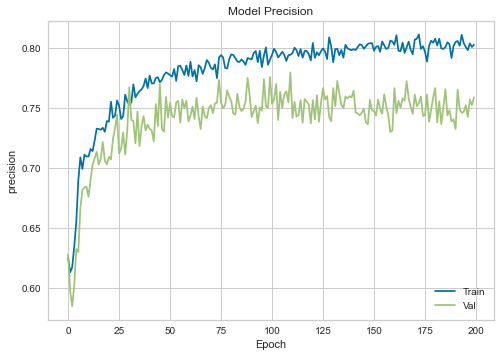

In [619]:

plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [622]:
y_train_pred=NN_10_exp1_test1.predict_classes(train_X_10_nn)

print(round(f1_score(train_y_10_nn,y_train_pred),3))
print(round(precision_score(train_y_10_nn,y_train_pred),3))
print(round(recall_score(train_y_10_nn,y_train_pred),3))

0.85
0.762
0.962


In [623]:
y_test_pred=NN_10_exp1_test1.predict_classes(test_X_10_nn)

print(round(f1_score(test_y_10_nn,y_test_pred),3))
print(round(precision_score(test_y_10_nn,y_test_pred),3))
print(round(recall_score(test_y_10_nn,y_test_pred),3))



0.84
0.754
0.95


___Addition of extra layer keeping the number of neurons same has decreased the values of precision but the values of recall has increased. The value of F1-score has decreased too.___

___Addition of extra layers is not improving the metrics___

__Lets try to add more layers to existing setup, resulting in more neurons in the network__

In [602]:

tf.random.set_seed(1234)

In [624]:
#Adding more layers and increased neurons
NN_10_exp1_test2 = Sequential(
    [
        Dense(32, activation='relu', input_shape=(16,), kernel_initializer='he_uniform'), 
        Dropout(0.3),
        Dense(32,activation='relu'),
        Dense(32,activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid'),
    ]
)

In [625]:
NN_10_exp1_test2.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_71 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 33        
Total params: 3,745
Trainable params: 3,745
Non-trainable params: 0
___________________________________________________

In [605]:
#nitializing earlystopping callback and training the model
#from keras import callbacks 
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
#                                        mode ="min", patience = 7,  
#                                        restore_best_weights = True) 

In [626]:
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_10_exp1_test2.compile(optimizer=opt,loss='binary_crossentropy',metrics=['Precision'])

hist = NN_10_exp1_test2.fit(train_X_10_nn, train_y_10_nn, epochs=200,validation_split=0.3)

Epoch 1/200
98/98 [==============================] - 2s 7ms/step - loss: 0.7017 - precision: 0.5645 - val_loss: 0.6201 - val_precision: 0.6781
Epoch 2/200
98/98 [==============================] - 0s 3ms/step - loss: 0.6243 - precision: 0.6384 - val_loss: 0.5614 - val_precision: 0.6887
Epoch 3/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5762 - precision: 0.6573 - val_loss: 0.5070 - val_precision: 0.6848
Epoch 4/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5444 - precision: 0.6835 - val_loss: 0.4855 - val_precision: 0.6929
Epoch 5/200
98/98 [==============================] - 0s 4ms/step - loss: 0.5285 - precision: 0.6864 - val_loss: 0.5055 - val_precision: 0.6630
Epoch 6/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5100 - precision: 0.7069 - val_loss: 0.5112 - val_precision: 0.6581
Epoch 7/200
98/98 [==============================] - 0s 3ms/step - loss: 0.5153 - precision: 0.6873 - val_loss: 0.4521 - val_precision: 0.7204

Epoch 114/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3609 - precision: 0.8134 - val_loss: 0.4208 - val_precision: 0.7474
Epoch 115/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3464 - precision: 0.8199 - val_loss: 0.3907 - val_precision: 0.7715
Epoch 116/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3537 - precision: 0.8146 - val_loss: 0.4322 - val_precision: 0.7454
Epoch 117/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3640 - precision: 0.7967 - val_loss: 0.3842 - val_precision: 0.7821
Epoch 118/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3697 - precision: 0.8116 - val_loss: 0.4026 - val_precision: 0.7624
Epoch 119/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3420 - precision: 0.8133 - val_loss: 0.4021 - val_precision: 0.7592
Epoch 120/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3721 - precision: 0.8074 - val_loss: 0.3913 - val_pre

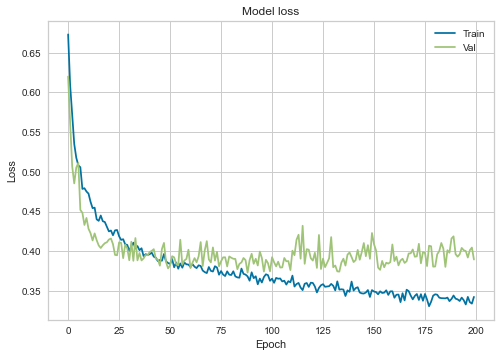

In [627]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


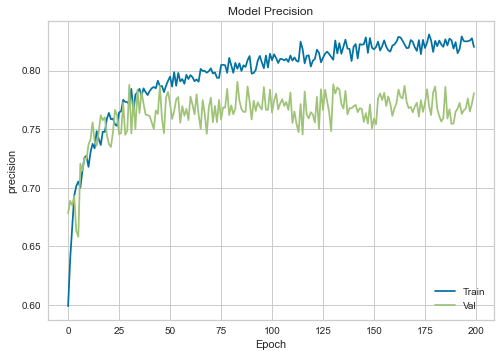

In [628]:

plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [629]:
y_train_pred=NN_10_exp1_test2.predict_classes(train_X_10_nn)

print(round(f1_score(train_y_10_nn,y_train_pred),3))
print(round(precision_score(train_y_10_nn,y_train_pred),3))
print(round(recall_score(train_y_10_nn,y_train_pred),3))

0.869
0.807
0.94


In [630]:
y_test_pred=NN_10_exp1_test2.predict_classes(test_X_10_nn)

print(round(f1_score(test_y_10_nn,y_test_pred),3))
print(round(precision_score(test_y_10_nn,y_test_pred),3))
print(round(recall_score(test_y_10_nn,y_test_pred),3))



0.843
0.787
0.908


___Adding more layers with additional neurons too havent affected the results significantly. The Precision and F1-score has decreased where the recall has increased.___

In [611]:
evaluate_model(rf_10_exp1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [612]:
evaluate_model(xgb_10_exp1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

__The best models of 2010s are__
- Random Forest 
- XGboost 

The important features in ___Random Forest___ are 
- Instrumentalness
- Acousticness 
- Loudness 
- Energy

The important features in ___XGB___ are 
- Instrumentalness
- Artist_score
- Energy
- Acousticness

# Experiment 3

### We will concatenate training data of all the decade and prepare a single train data and predict the result on the test data of 2010 decade.

In [323]:
print(train_60s.shape)
print(train_70s.shape)
print(train_80s.shape)
print(train_90s.shape)
print(train_00s.shape)
print(train_10s.shape)

(6049, 17)
(5436, 17)
(4835, 17)
(3864, 17)
(4110, 17)
(4478, 17)


In [325]:
master_train = pd.concat([train_60s,train_70s,train_80s,train_90s,train_00s,train_10s],ignore_index=True)

In [326]:
master_train.shape

(28772, 17)

In [327]:
#lets create and experiment 
clf_exp3 = setup(master_train, target = 'target', session_id=123,test_data=test_10s)

In [665]:
lr_exp3=create_model('lr')

In [666]:
predict_model(lr_exp3)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0               0.50    0.211282  0.127907      0.022059     0.0      0   
1               0.75    0.215239  0.127907      0.007353     0.0      0   
2               0.75    0.104126  0.139535      0.000000     1.0      1   
3               0.75    0.286104  0.116279      0.000000     1.0      0   
4               0.75    0.167294  0.104651      0.000000     1.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     0.0      1   
1916            0.00    0.153836  0.081395      0.000000     0.0      1   
1917            0.75    0.274219  0.069767      0.051471     0.0      1   
1918            0.75    0.147800  0.081395      0.000000     0.0      0   
1919            0.75    0.116484  0.069767      0.000000     0.0      0   

      Label   Score  
0         0  0.9812  
1         1  0.7695  
2         1  0.7192  
3         1  0.8569  
4         1  0.5125  
...     ...     ...  
1915      1  0.7604  
1916      0  0.7921  
1917      1  0.5920  
1918      0  0.9305  
1919      0  0.7636  

[1920 rows x 19 columns]

In [668]:
lr_tuned_exp3_l2=tune_model(lr_exp3,optimize='Precision')

In [669]:
predict_model(lr_tuned_exp3_l2)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0               0.50    0.211282  0.127907      0.022059     0.0      0   
1               0.75    0.215239  0.127907      0.007353     0.0      0   
2               0.75    0.104126  0.139535      0.000000     1.0      1   
3               0.75    0.286104  0.116279      0.000000     1.0      0   
4               0.75    0.167294  0.104651      0.000000     1.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     0.0      1   
1916            0.00    0.153836  0.081395      0.000000     0.0      1   
1917            0.75    0.274219  0.069767      0.051471     0.0      1   
1918            0.75    0.147800  0.081395      0.000000     0.0      0   
1919            0.75    0.116484  0.069767      0.000000     0.0      0   

      Label   Score  
0         0  0.9824  
1         1  0.7664  
2         1  0.7169  
3         1  0.8519  
4         1  0.5004  
...     ...     ...  
1915      1  0.7484  
1916      0  0.8053  
1917      1  0.5925  
1918      0  0.9303  
1919      0  0.7905  

[1920 rows x 19 columns]

In [670]:
lr_exp3_l1=create_model('lr',penalty='l1',solver='liblinear')

In [671]:
lr_tuned_exp3_l1=tune_model(lr_exp3_l1,optimize='Precision')

In [672]:
predict_model(lr_tuned_exp3_l1)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0               0.50    0.211282  0.127907      0.022059     0.0      0   
1               0.75    0.215239  0.127907      0.007353     0.0      0   
2               0.75    0.104126  0.139535      0.000000     1.0      1   
3               0.75    0.286104  0.116279      0.000000     1.0      0   
4               0.75    0.167294  0.104651      0.000000     1.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     0.0      1   
1916            0.00    0.153836  0.081395      0.000000     0.0      1   
1917            0.75    0.274219  0.069767      0.051471     0.0      1   
1918            0.75    0.147800  0.081395      0.000000     0.0      0   
1919            0.75    0.116484  0.069767      0.000000     0.0      0   

      Label   Score  
0         0  0.9821  
1         1  0.7670  
2         1  0.7175  
3         1  0.8528  
4         1  0.5034  
...     ...     ...  
1915      1  0.7514  
1916      0  0.8018  
1917      1  0.5922  
1918      0  0.9301  
1919      0  0.7840  

[1920 rows x 19 columns]

### SVM - Master train - exp3

In [673]:
svm_exp3= create_model('svm')

In [674]:
predict_model(svm_exp3)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  Label  
0               0.50    0.211282  0.127907      0.022059     0.0      0      0  
1               0.75    0.215239  0.127907      0.007353     0.0      0      1  
2               0.75    0.104126  0.139535      0.000000     1.0      1      1  
3               0.75    0.286104  0.116279      0.000000     1.0      0      1  
4               0.75    0.167294  0.104651      0.000000     1.0      1      1  
...              ...         ...       ...           ...     ...    ...    ...  
1915            0.75    0.118651  0.081395      0.000000     0.0      1      1  
1916            0.00    0.153836  0.081395      0.000000     0.0      1      0  
1917            0.75    0.274219  0.069767      0.051471     0.0      1      1  
1918            0.75    0.147800  0.081395      0.000000     0.0      0      0  
1919            0.75    0.116484  0.069767      0.000000     0.0      0      0  

[1920 rows x 18 columns]

In [675]:
svm_tuned_exp3=tune_model(svm_exp3,optimize='Precision')

In [676]:
predict_model(svm_tuned_exp3)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  Label  
0               0.50    0.211282  0.127907      0.022059     0.0      0      0  
1               0.75    0.215239  0.127907      0.007353     0.0      0      1  
2               0.75    0.104126  0.139535      0.000000     1.0      1      1  
3               0.75    0.286104  0.116279      0.000000     1.0      0      1  
4               0.75    0.167294  0.104651      0.000000     1.0      1      0  
...              ...         ...       ...           ...     ...    ...    ...  
1915            0.75    0.118651  0.081395      0.000000     0.0      1      1  
1916            0.00    0.153836  0.081395      0.000000     0.0      1      0  
1917            0.75    0.274219  0.069767      0.051471     0.0      1      1  
1918            0.75    0.147800  0.081395      0.000000     0.0      0      0  
1919            0.75    0.116484  0.069767      0.000000     0.0      0      0  

[1920 rows x 18 columns]

In [678]:
rbfsvm_exp3=create_model('rbfsvm')

In [680]:
predict_model(rbfsvm_exp3)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0               0.50    0.211282  0.127907      0.022059     0.0      0   
1               0.75    0.215239  0.127907      0.007353     0.0      0   
2               0.75    0.104126  0.139535      0.000000     1.0      1   
3               0.75    0.286104  0.116279      0.000000     1.0      0   
4               0.75    0.167294  0.104651      0.000000     1.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     0.0      1   
1916            0.00    0.153836  0.081395      0.000000     0.0      1   
1917            0.75    0.274219  0.069767      0.051471     0.0      1   
1918            0.75    0.147800  0.081395      0.000000     0.0      0   
1919            0.75    0.116484  0.069767      0.000000     0.0      0   

      Label   Score  
0         0  0.9057  
1         1  0.7848  
2         1  0.7620  
3         1  0.9006  
4         1  0.5781  
...     ...     ...  
1915      1  0.7825  
1916      0  0.8069  
1917      1  0.6354  
1918      0  0.9746  
1919      0  0.7573  

[1920 rows x 19 columns]

### Random forest - Exp 3

In [681]:
rf_exp3=create_model('rf')

In [682]:
predict_model(rf_exp3)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0               0.50    0.211282  0.127907      0.022059     0.0      0   
1               0.75    0.215239  0.127907      0.007353     0.0      0   
2               0.75    0.104126  0.139535      0.000000     1.0      1   
3               0.75    0.286104  0.116279      0.000000     1.0      0   
4               0.75    0.167294  0.104651      0.000000     1.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     0.0      1   
1916            0.00    0.153836  0.081395      0.000000     0.0      1   
1917            0.75    0.274219  0.069767      0.051471     0.0      1   
1918            0.75    0.147800  0.081395      0.000000     0.0      0   
1919            0.75    0.116484  0.069767      0.000000     0.0      0   

      Label  Score  
0         0   1.00  
1         1   0.75  
2         1   0.91  
3         1   0.68  
4         0   0.60  
...     ...    ...  
1915      1   0.85  
1916      1   0.62  
1917      1   0.93  
1918      0   0.95  
1919      0   0.78  

[1920 rows x 19 columns]

In [683]:
rf_tuned_exp3=tune_model(rf_exp3,optimize='precision')

In [684]:
predict_model(rf_tuned_exp3)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0               0.50    0.211282  0.127907      0.022059     0.0      0   
1               0.75    0.215239  0.127907      0.007353     0.0      0   
2               0.75    0.104126  0.139535      0.000000     1.0      1   
3               0.75    0.286104  0.116279      0.000000     1.0      0   
4               0.75    0.167294  0.104651      0.000000     1.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     0.0      1   
1916            0.00    0.153836  0.081395      0.000000     0.0      1   
1917            0.75    0.274219  0.069767      0.051471     0.0      1   
1918            0.75    0.147800  0.081395      0.000000     0.0      0   
1919            0.75    0.116484  0.069767      0.000000     0.0      0   

      Label   Score  
0         0  0.9183  
1         1  0.7326  
2         1  0.7207  
3         1  0.7050  
4         0  0.6501  
...     ...     ...  
1915      1  0.7239  
1916      1  0.6605  
1917      1  0.8077  
1918      0  0.8659  
1919      0  0.7736  

[1920 rows x 19 columns]

### XGboost - Exp3 

In [685]:
xgb_exp3=create_model('xgboost')

In [686]:
predict_model(xgb_exp3)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0               0.50    0.211282  0.127907      0.022059     0.0      0   
1               0.75    0.215239  0.127907      0.007353     0.0      0   
2               0.75    0.104126  0.139535      0.000000     1.0      1   
3               0.75    0.286104  0.116279      0.000000     1.0      0   
4               0.75    0.167294  0.104651      0.000000     1.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     0.0      1   
1916            0.00    0.153836  0.081395      0.000000     0.0      1   
1917            0.75    0.274219  0.069767      0.051471     0.0      1   
1918            0.75    0.147800  0.081395      0.000000     0.0      0   
1919            0.75    0.116484  0.069767      0.000000     0.0      0   

      Label   Score  
0         0  0.9979  
1         1  0.7950  
2         1  0.8817  
3         1  0.8911  
4         0  0.6978  
...     ...     ...  
1915      1  0.9360  
1916      1  0.7265  
1917      1  0.9951  
1918      0  0.9825  
1919      0  0.9435  

[1920 rows x 19 columns]

In [687]:
xgb_tuned_exp3=tune_model(xgb_exp3,optimize='Precision')

In [688]:
predict_model(xgb_tuned_exp3)

danceability   energy       key  loudness  speechiness  acousticness  \
0            0.175  0.00966  1.000000   -28.513       0.0394        0.9830   
1            0.788  0.86200  0.909091    -7.714       0.0439        0.0313   
2            0.513  0.66200  0.727273    -6.058       0.0293        0.1950   
3            0.936  0.71100  1.000000    -5.435       0.2890        0.0871   
4            0.468  0.19000  0.363636   -11.138       0.0373        0.9190   
...            ...      ...       ...       ...          ...           ...   
1915         0.613  0.80700  1.000000    -2.739       0.0382        0.0671   
1916         0.567  0.51500  0.545455   -10.265       0.2470        0.3540   
1917         0.683  0.77600  0.090909    -3.251       0.3410        0.1500   
1918         0.391  0.97900  0.090909    -3.377       0.0651        0.0125   
1919         0.518  0.57000  0.454545    -8.188       0.0296        0.8180   

      instrumentalness  liveness  valence     tempo  duration_ms  \
0              0.15000    0.0889   0.0288  0.193557     0.125457   
1              0.00682    0.1240   0.7590  0.527965     0.145639   
2              0.00000    0.1010   0.2610  0.552183     0.137671   
3              0.00464    0.1040   0.5640  0.493287     0.164182   
4              0.00000    0.1070   0.3260  0.500851     0.111294   
...                ...       ...      ...       ...          ...   
1915           0.00000    0.3220   0.8130  0.545744     0.113248   
1916           0.00000    0.0780   0.3210  0.470438     0.113913   
1917           0.00000    0.2270   0.2230  0.784503     0.093244   
1918           0.74700    0.2390   0.2850  0.499540     0.073303   
1919           0.19100    0.1170   0.5480  0.573406     0.140850   

      time_signature  chorus_hit  sections  artist_score  mode_1 target  \
0               0.50    0.211282  0.127907      0.022059     0.0      0   
1               0.75    0.215239  0.127907      0.007353     0.0      0   
2               0.75    0.104126  0.139535      0.000000     1.0      1   
3               0.75    0.286104  0.116279      0.000000     1.0      0   
4               0.75    0.167294  0.104651      0.000000     1.0      1   
...              ...         ...       ...           ...     ...    ...   
1915            0.75    0.118651  0.081395      0.000000     0.0      1   
1916            0.00    0.153836  0.081395      0.000000     0.0      1   
1917            0.75    0.274219  0.069767      0.051471     0.0      1   
1918            0.75    0.147800  0.081395      0.000000     0.0      0   
1919            0.75    0.116484  0.069767      0.000000     0.0      0   

      Label   Score  
0         0  0.9998  
1         1  0.9320  
2         1  0.9461  
3         1  0.5619  
4         1  0.7736  
...     ...     ...  
1915      1  0.9785  
1916      1  0.7776  
1917      1  0.9959  
1918      0  0.9879  
1919      0  0.9883  

[1920 rows x 19 columns]

In [700]:

tf.random.set_seed(1234)

In [701]:
#Adding more layers and increased neurons
NN_exp3 = Sequential(
    [
        Dense(32, activation='relu', input_shape=(16,), kernel_initializer='he_uniform'), 
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid'),
    ]
)

In [702]:
NN_exp3.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_24 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 33        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [605]:
#nitializing earlystopping callback and training the model
#from keras import callbacks 
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
#                                        mode ="min", patience = 7,  
#                                        restore_best_weights = True) 

In [692]:
#creating the dataset with X and y for NN
train_y_nn=master_train['target']
train_X_nn=master_train.copy()
train_X_nn.drop(['target'],1,inplace=True)


In [703]:
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_exp3.compile(optimizer=opt,loss='binary_crossentropy',metrics=['Precision'])

hist = NN_10_exp1_test2.fit(train_X_nn, train_y_nn, epochs=50,validation_split=0.3)

Epoch 1/50
630/630 [==============================] - 2s 3ms/step - loss: 0.4748 - precision: 0.7394 - val_loss: 0.5395 - val_precision: 0.7037
Epoch 2/50
630/630 [==============================] - 2s 2ms/step - loss: 0.4736 - precision: 0.7376 - val_loss: 0.5201 - val_precision: 0.7075
Epoch 3/50
630/630 [==============================] - 2s 3ms/step - loss: 0.4708 - precision: 0.7410 - val_loss: 0.5281 - val_precision: 0.7190
Epoch 4/50
630/630 [==============================] - 2s 2ms/step - loss: 0.4746 - precision: 0.7392 - val_loss: 0.5330 - val_precision: 0.7126
Epoch 5/50
630/630 [==============================] - 2s 2ms/step - loss: 0.4725 - precision: 0.7371 - val_loss: 0.5025 - val_precision: 0.7167
Epoch 6/50
630/630 [==============================] - 2s 3ms/step - loss: 0.4719 - precision: 0.7395 - val_loss: 0.5290 - val_precision: 0.7095
Epoch 7/50
630/630 [==============================] - 2s 2ms/step - loss: 0.4751 - precision: 0.7363 - val_loss: 0.5256 - val_precision:

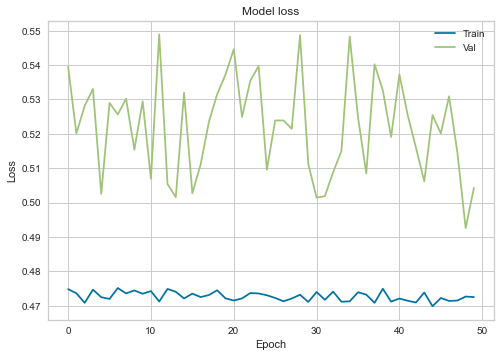

In [704]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


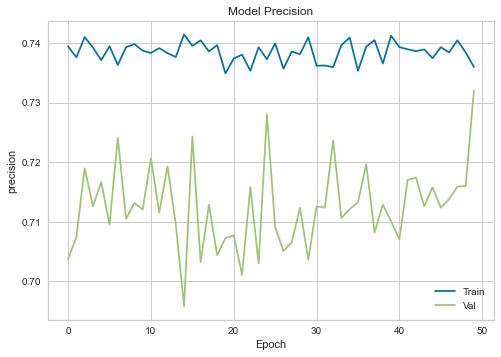

In [705]:

plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [706]:
y_train_pred=NN_exp3.predict_classes(train_X_10_nn)

print(round(f1_score(train_y_10_nn,y_train_pred),3))
print(round(precision_score(train_y_10_nn,y_train_pred),3))
print(round(recall_score(train_y_10_nn,y_train_pred),3))

0.668
0.504
0.993


In [707]:
y_test_pred=NN_10_exp1_test2.predict_classes(test_X_10_nn)

print(round(f1_score(test_y_10_nn,y_test_pred),3))
print(round(precision_score(test_y_10_nn,y_test_pred),3))
print(round(recall_score(test_y_10_nn,y_test_pred),3))



0.807
0.7
0.953
